In [1]:
from Model.GeoGans import GAN2D_MPS, WGAN2D_MPS, AlphaGAN_MPS, CycleGAN_MPS
from Model.Utils import PlotHistory, Save_Model,PlotDataAE
from Model.Utils import load_numpy, convert_to_tfrecords, MPS_Generator, model_plot
from keras.optimizers import RMSprop,Adam
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True 
create_tfrecords = False

path_tfr = 'DataSet/MPS60'
path_npy = '/share/GeoFacies/ModelosDeFacies/ModelMPS60/DataSet/DataSet.npy'
batch_size = 32

In [3]:
if load_tfrecords:    
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr,x_train,x_test)
        gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 14000)
        
    else:
        try:
            gen_train = MPS_Generator(os.path.join(path_tfr, 'train.tfrecords'), 14000)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
    x_train = gen_train.get_numpy_batch().astype('float32')
else:
    x_train, _ = load_numpy(path_npy,random_state=0,split_data=0.30)
x_train = x_train*2 -1

# Training GAN models 

In [4]:
_, n_rows, n_cols, n_chns = x_train.shape
path_weights = os.path.join(path_tfr, 'w60_GAN.hdf5')
num_epochs = 25

## 1. GAN2D Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_g_input (InputLayer)     (None, 500)               0         
_________________________________________________________________
gan_g_dense (Dense)          (None, 16384)             8208384   
_________________________________________________________________
gan_g_reshape (Reshape)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_bn_dense (BatchNormali (None, 8, 8, 256)         1024      
_________________________________________________________________
gan_g_relu (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_1_deconv2D (Conv2DTran (None, 16, 16, 128)       524416    
_________________________________________________________________
gan_g_1_bn (BatchNormalizati (None, 16, 16, 128)       512       
__________

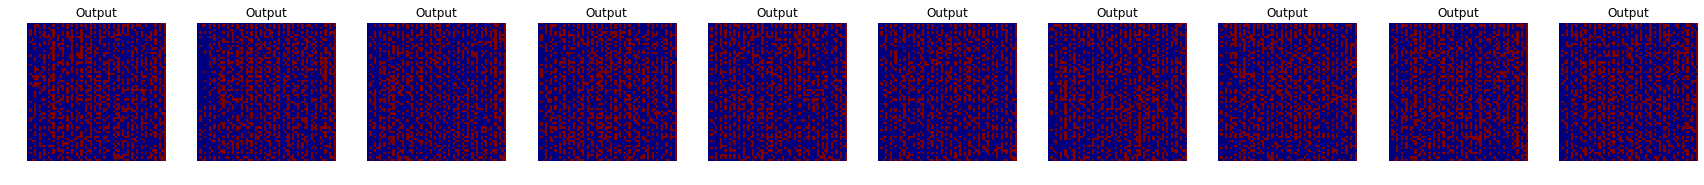

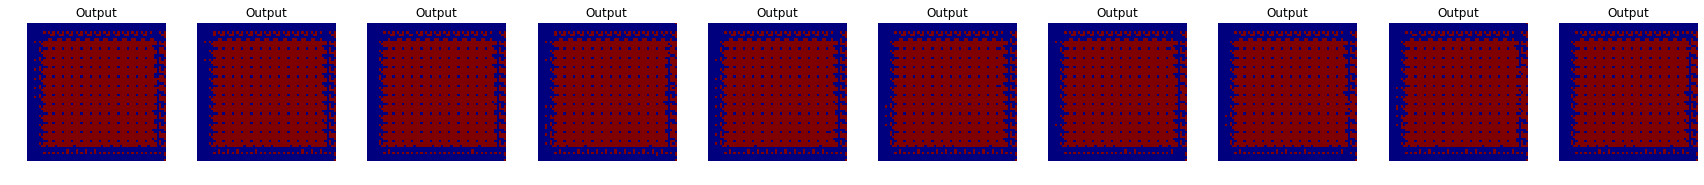

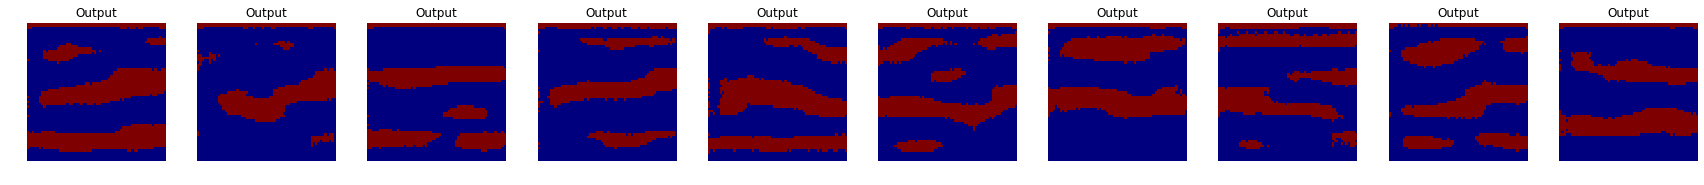

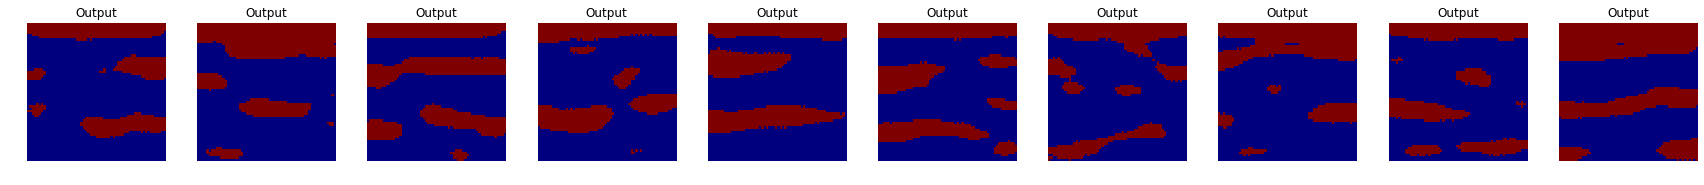

Epoch -> 1 D loss ->  1.1876018 G loss ->  0.75334775


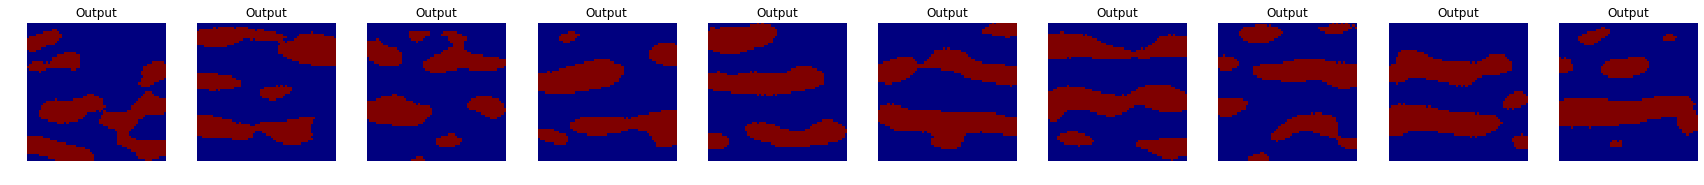



D loss -> 0.71046174 G loss -> 6.1884212 reconstruction acc -> 0.97768664
Saving check point ...
Epoch -> 2 D loss ->  1.2366778 G loss ->  0.8724368


D loss -> 0.5329219 G loss -> 13.0713825 reconstruction acc -> 0.94964844
Saving check point ...
Epoch -> 3 D loss ->  1.2932583 G loss ->  0.7516607


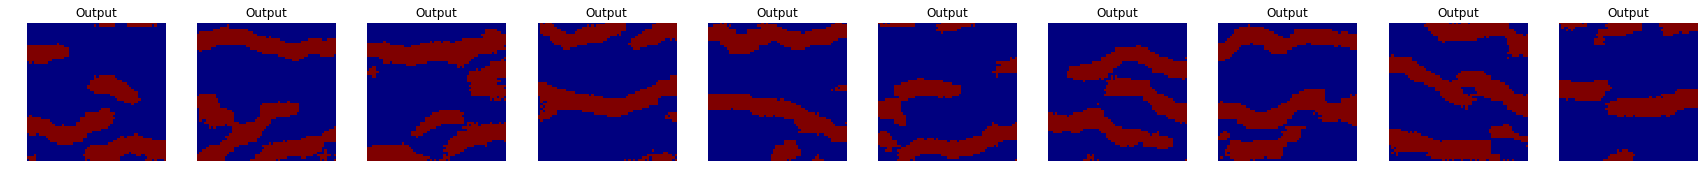



D loss -> 0.63337874 G loss -> 13.864902 reconstruction acc -> 0.94638026
Saving check point ...
Epoch -> 4 D loss ->  1.3335047 G loss ->  0.74113923


D loss -> 0.92733866 G loss -> 11.377871 reconstruction acc -> 0.9599089
Saving check point ...
Epoch -> 5 D loss ->  1.2900922 G loss ->  0.77549464


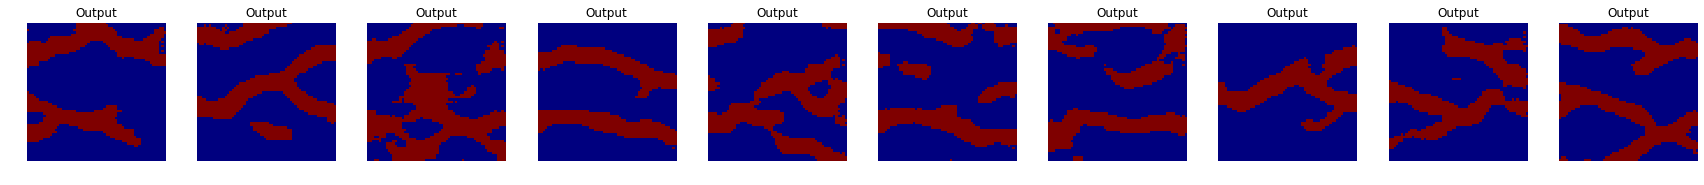



D loss -> 0.95610857 G loss -> 14.133043 reconstruction acc -> 0.95891494
Saving check point ...
Epoch -> 6 D loss ->  1.2806712 G loss ->  0.7839836


D loss -> 1.1988423 G loss -> 13.536784 reconstruction acc -> 0.9590495
Saving check point ...
Epoch -> 7 D loss ->  1.2805471 G loss ->  0.7981889


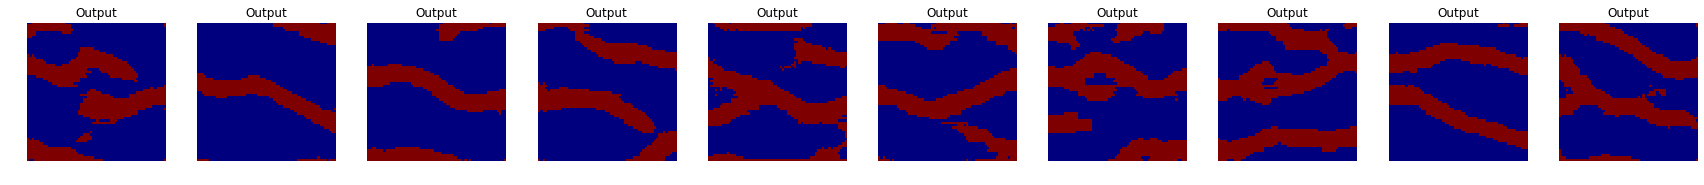



D loss -> 2.0027618 G loss -> 20.390955 reconstruction acc -> 0.9420877
Epoch -> 8 D loss ->  1.2840914 G loss ->  0.7902312


D loss -> 1.5953634 G loss -> 19.648506 reconstruction acc -> 0.9519054
Epoch -> 9 D loss ->  1.2649459 G loss ->  0.7988259


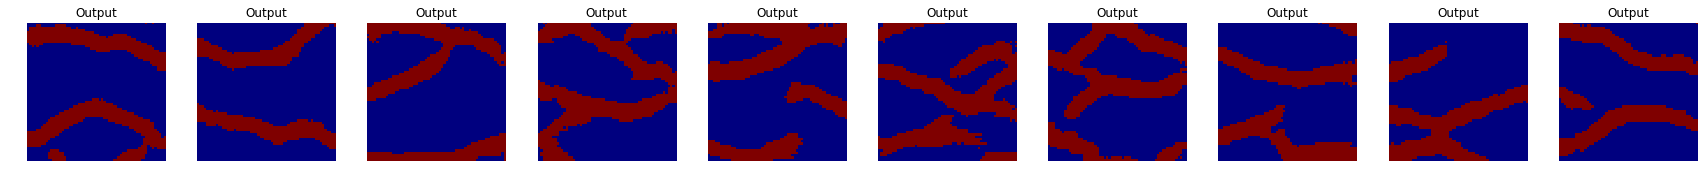



D loss -> 1.5088999 G loss -> 21.44916 reconstruction acc -> 0.9520269
Epoch -> 10 D loss ->  1.2690563 G loss ->  0.7995116


D loss -> 0.8101404 G loss -> 29.656067 reconstruction acc -> 0.9402561
Epoch -> 11 D loss ->  1.2698479 G loss ->  0.79625005


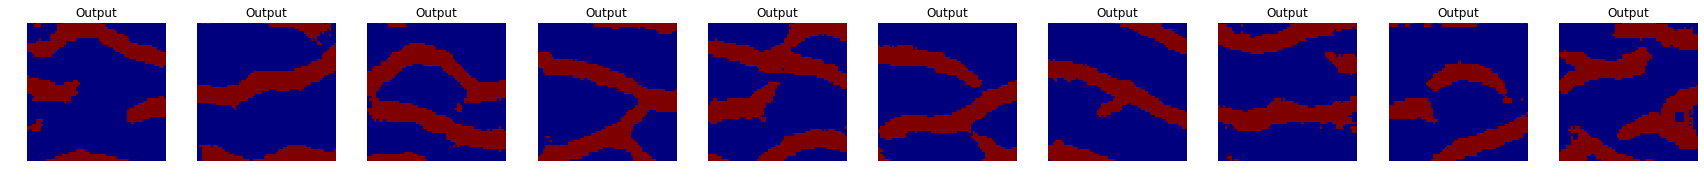



D loss -> 0.6467734 G loss -> 40.55836 reconstruction acc -> 0.9384202
Epoch -> 12 D loss ->  1.2635095 G loss ->  0.810538


D loss -> 0.98540556 G loss -> 35.8194 reconstruction acc -> 0.95132816
Epoch -> 13 D loss ->  1.2540275 G loss ->  0.81169


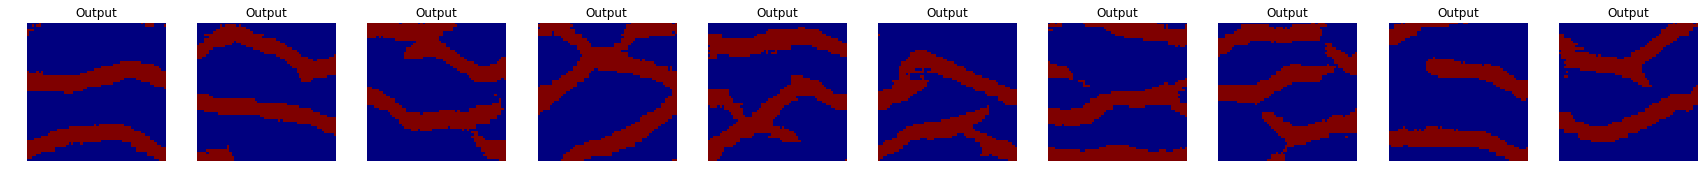



D loss -> 1.4476595 G loss -> 34.01511 reconstruction acc -> 0.944757
Epoch -> 14 D loss ->  1.2300138 G loss ->  0.8216585


D loss -> 1.0067931 G loss -> 41.260895 reconstruction acc -> 0.9507075
Epoch -> 15 D loss ->  1.2404752 G loss ->  0.8396813


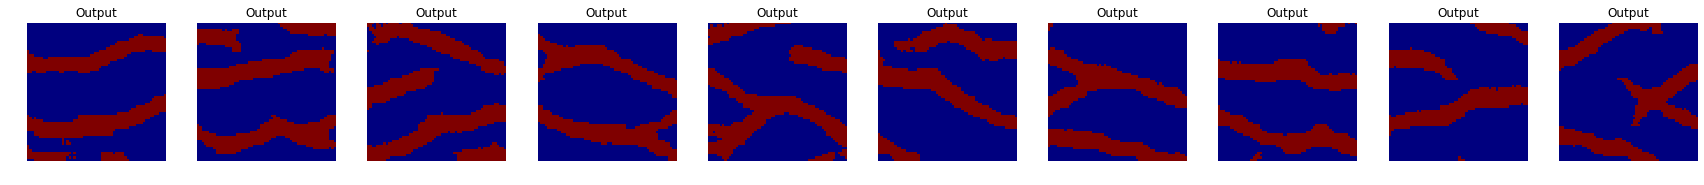



D loss -> 1.0550532 G loss -> 39.929916 reconstruction acc -> 0.9512283
Epoch -> 16 D loss ->  1.2245529 G loss ->  0.8347263


D loss -> 1.0807616 G loss -> 33.76102 reconstruction acc -> 0.9543403
Epoch -> 17 D loss ->  1.2101092 G loss ->  0.83038455


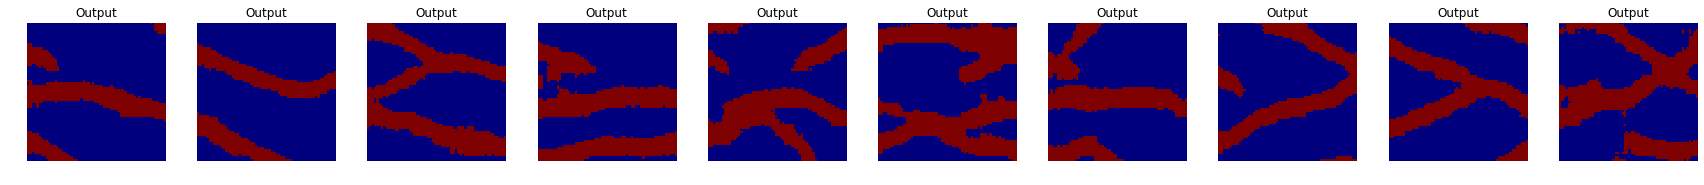



D loss -> 0.55528677 G loss -> 55.055313 reconstruction acc -> 0.9481858
Epoch -> 18 D loss ->  1.207404 G loss ->  0.845463


D loss -> 0.7730196 G loss -> 58.656693 reconstruction acc -> 0.9451346
Epoch -> 19 D loss ->  1.1857911 G loss ->  0.8622419


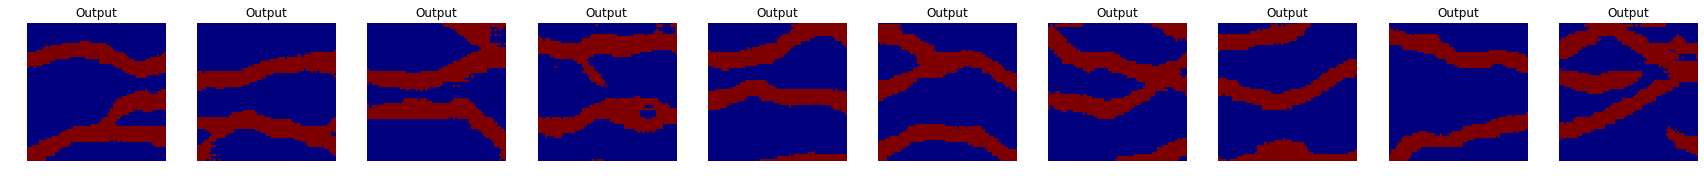



D loss -> 0.2993641 G loss -> 45.737286 reconstruction acc -> 0.95887154
Saving check point ...
Epoch -> 20 D loss ->  1.1723833 G loss ->  0.86571014


D loss -> 0.7122616 G loss -> 49.52752 reconstruction acc -> 0.95558596
Epoch -> 21 D loss ->  1.1437016 G loss ->  0.8955971


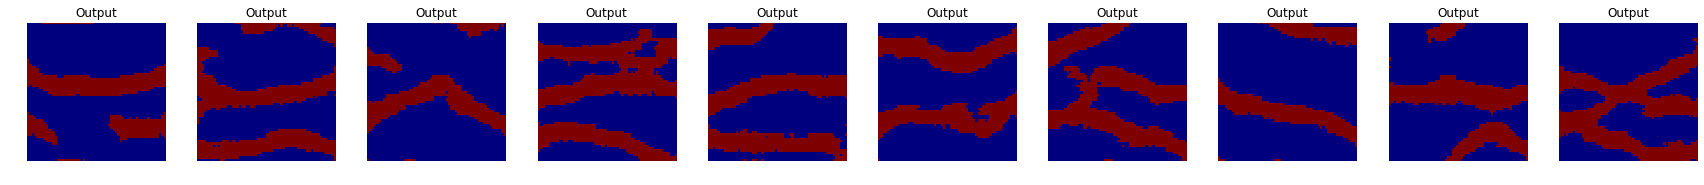



D loss -> 0.74492455 G loss -> 46.863705 reconstruction acc -> 0.9594401
Epoch -> 22 D loss ->  1.1357064 G loss ->  0.89813626


D loss -> 0.5513263 G loss -> 50.48617 reconstruction acc -> 0.96029514
Epoch -> 23 D loss ->  1.1461936 G loss ->  0.9033665


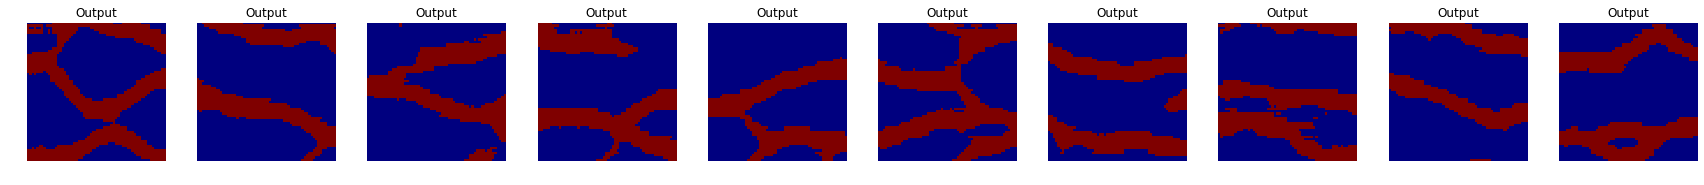



D loss -> 0.47416186 G loss -> 46.227295 reconstruction acc -> 0.9619705
Saving check point ...
Epoch -> 24 D loss ->  1.1181806 G loss ->  0.9096468


D loss -> 0.7792962 G loss -> 54.01566 reconstruction acc -> 0.957283
Epoch -> 25 D loss ->  1.0723903 G loss ->  0.9603415


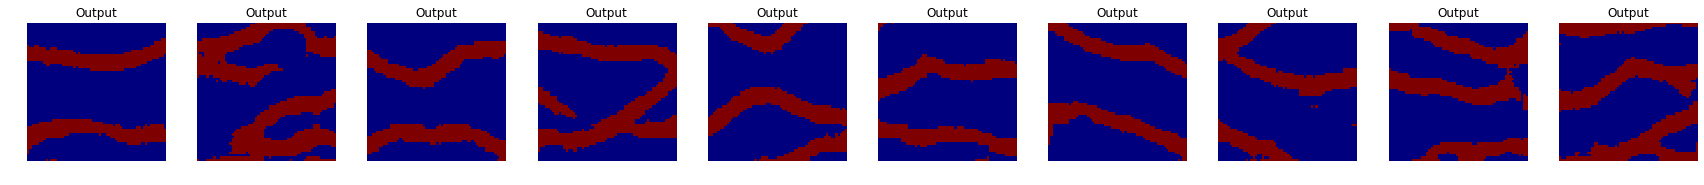



D loss -> 0.3576986 G loss -> 58.028835 reconstruction acc -> 0.95574653
Restauring best Discriminator and Generator Models ...
Initializing encoder variables ...
Starting Encoder training ...
Saving best model ...
epoch 1 D loss -> 0.49349064 E loss -> 119.122314 Acc -> 0.91554826
Saving best model ...


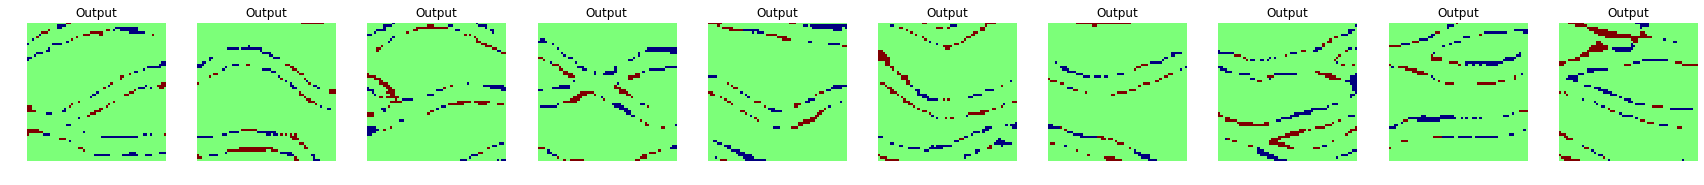

epoch 2 D loss -> 0.4753033 E loss -> 101.0481 Acc -> 0.9272198
Saving best model ...
epoch 3 D loss -> 0.46268216 E loss -> 92.68919 Acc -> 0.932389
Saving best model ...


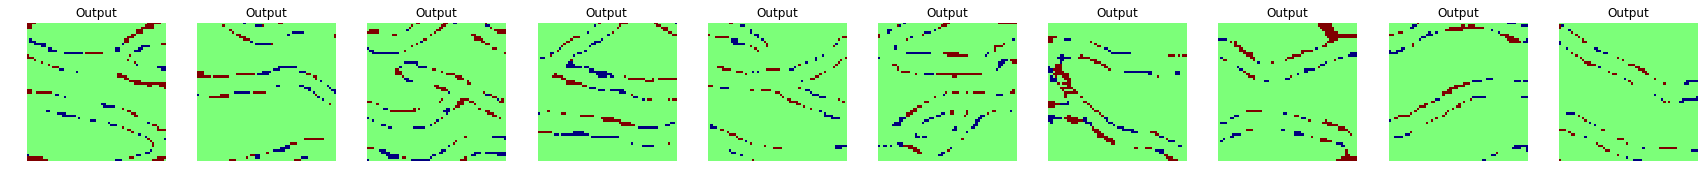

epoch 4 D loss -> 0.4565583 E loss -> 87.77492 Acc -> 0.9355007
Saving best model ...
epoch 5 D loss -> 0.47364318 E loss -> 87.12632 Acc -> 0.9358172
Saving best model ...


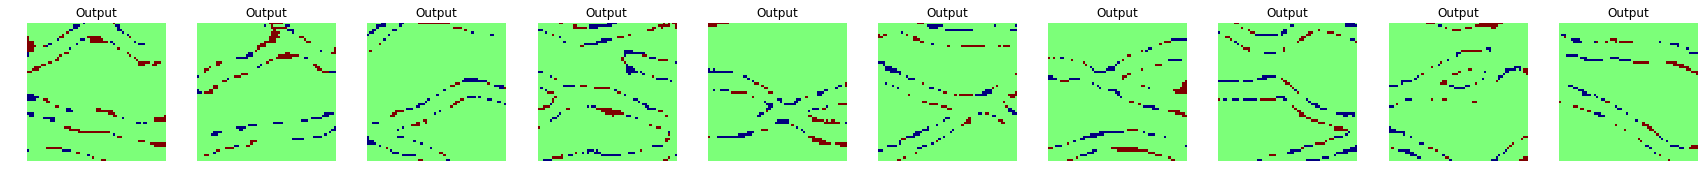

epoch 6 D loss -> 0.4570956 E loss -> 84.47039 Acc -> 0.93767774
Saving best model ...
epoch 7 D loss -> 0.4632611 E loss -> 83.722336 Acc -> 0.93798006
Saving best model ...


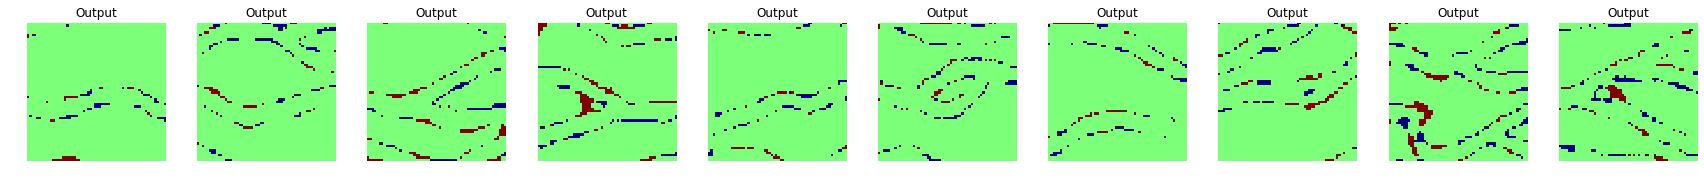

epoch 8 D loss -> 0.46194208 E loss -> 79.42313 Acc -> 0.94061726
Saving best model ...
epoch 9 D loss -> 0.4641076 E loss -> 77.84963 Acc -> 0.9414309
Saving best model ...


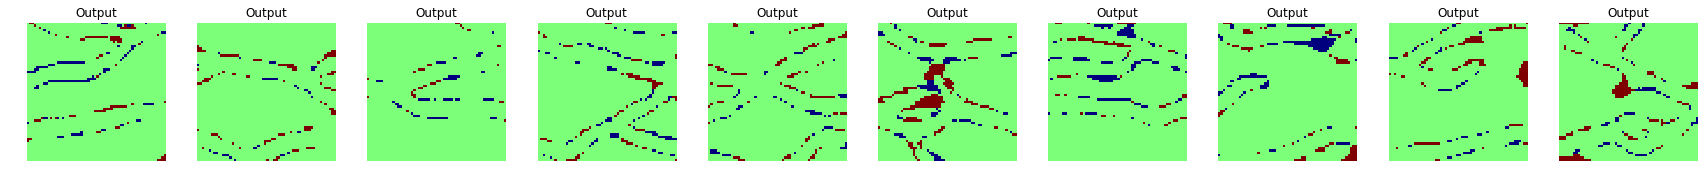

epoch 10 D loss -> 0.45986354 E loss -> 75.6536 Acc -> 0.94311225
epoch 11 D loss -> 0.46631604 E loss -> 76.24865 Acc -> 0.94262564
Saving best model ...


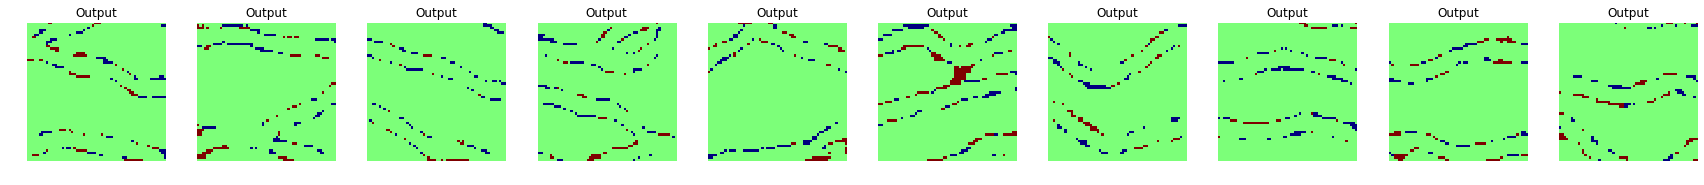

epoch 12 D loss -> 0.4609391 E loss -> 73.83679 Acc -> 0.9441519
epoch 13 D loss -> 0.46035948 E loss -> 74.6668 Acc -> 0.9437268
Saving best model ...


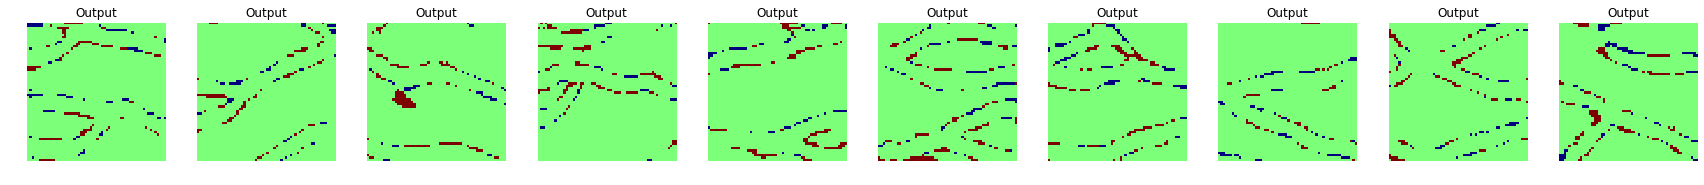

epoch 14 D loss -> 0.4638754 E loss -> 73.643135 Acc -> 0.94432265
epoch 15 D loss -> 0.46840522 E loss -> 73.50984 Acc -> 0.94429314
Saving best model ...


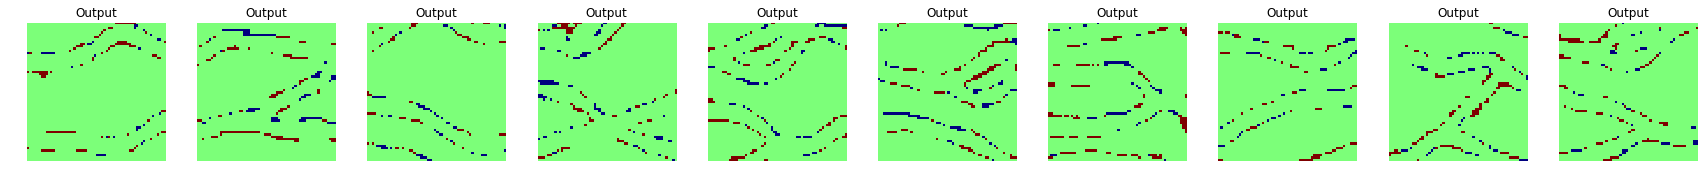

epoch 16 D loss -> 0.46287104 E loss -> 71.35316 Acc -> 0.9457168
epoch 17 D loss -> 0.46240675 E loss -> 71.56652 Acc -> 0.9456852
Saving best model ...


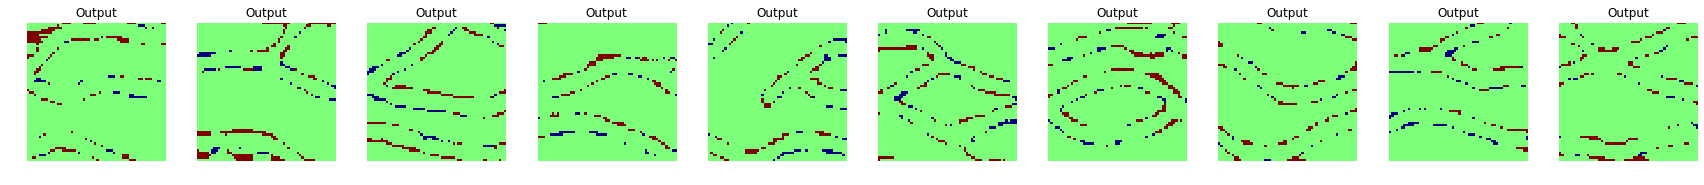

epoch 18 D loss -> 0.46002647 E loss -> 69.74686 Acc -> 0.94669265
epoch 19 D loss -> 0.46329063 E loss -> 70.066414 Acc -> 0.9465244
Saving best model ...


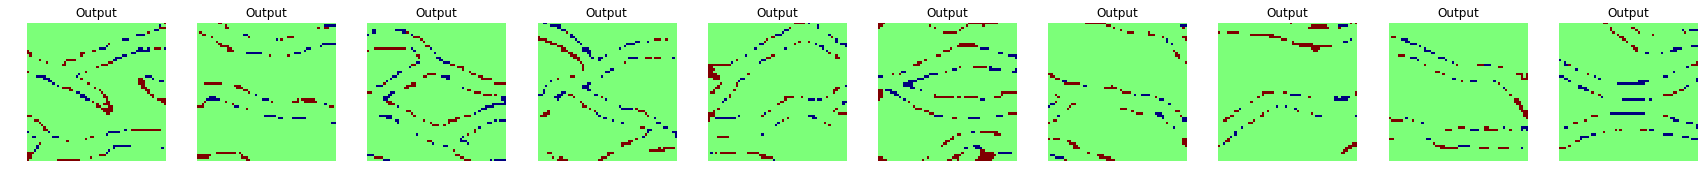

epoch 20 D loss -> 0.4612312 E loss -> 69.12877 Acc -> 0.9471675
Saving best model ...
epoch 21 D loss -> 0.4640097 E loss -> 68.030716 Acc -> 0.9477955
Saving best model ...


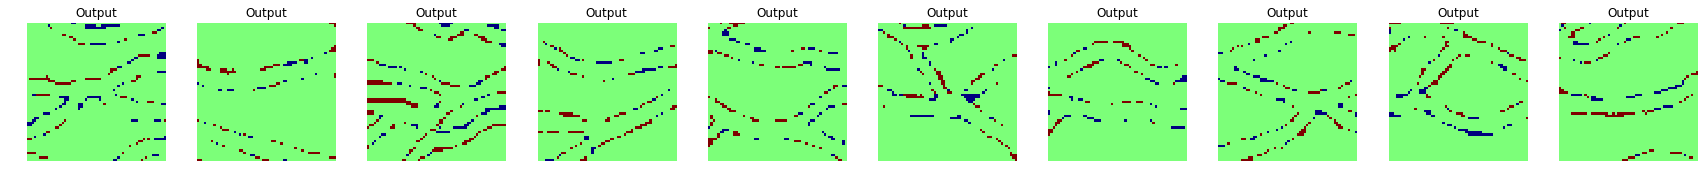

epoch 22 D loss -> 0.46349886 E loss -> 67.84588 Acc -> 0.9479853
epoch 23 D loss -> 0.46949327 E loss -> 68.80966 Acc -> 0.9472442
Saving best model ...


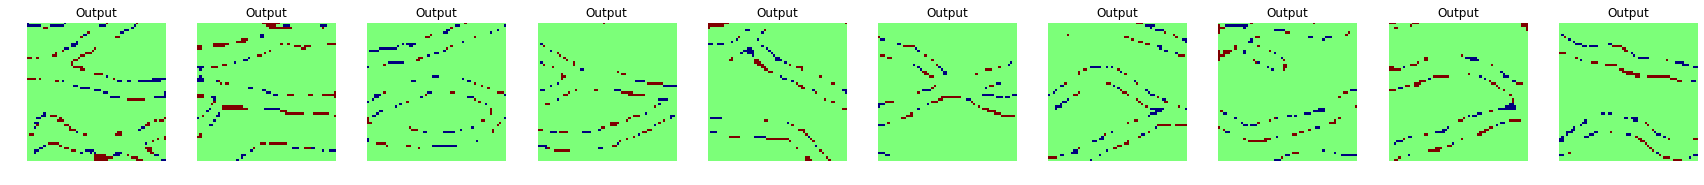

epoch 24 D loss -> 0.46392092 E loss -> 66.89825 Acc -> 0.9484178
epoch 25 D loss -> 0.46625996 E loss -> 68.1589 Acc -> 0.94760454
Saving best model ...


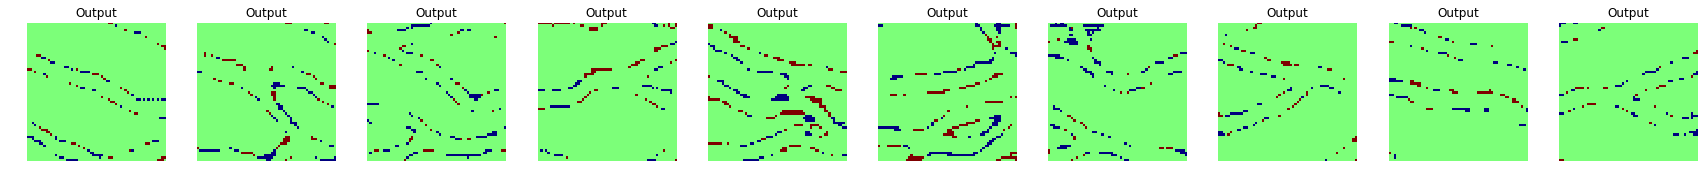

epoch 26 D loss -> 0.46295413 E loss -> 65.224396 Acc -> 0.9495379
epoch 27 D loss -> 0.46731478 E loss -> 65.48569 Acc -> 0.9493519
Saving best model ...


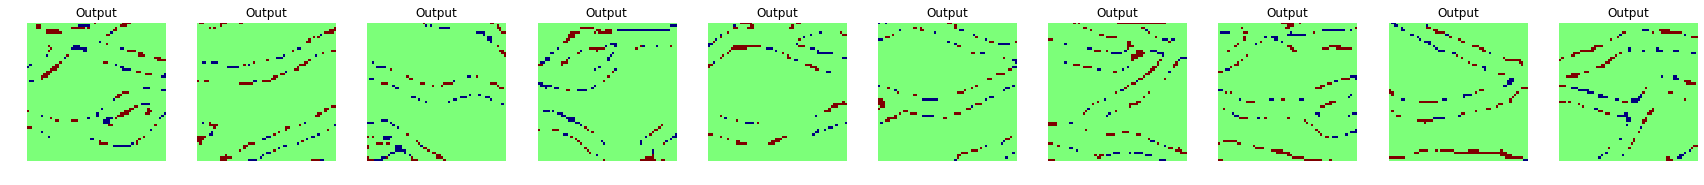

epoch 28 D loss -> 0.46750882 E loss -> 64.413925 Acc -> 0.9500703
epoch 29 D loss -> 0.4623977 E loss -> 64.675804 Acc -> 0.94997466


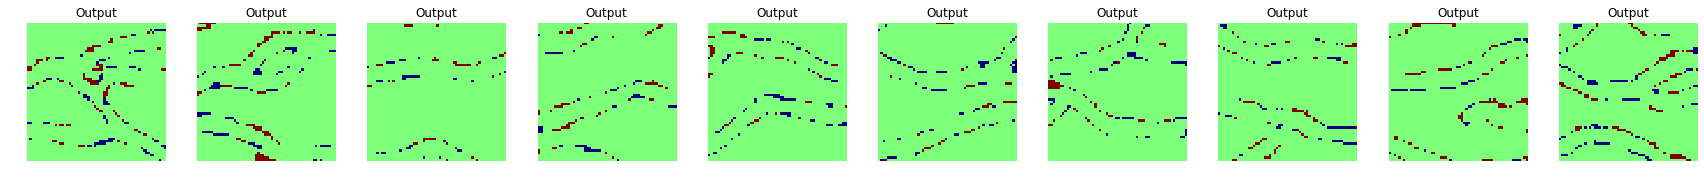

epoch 30 D loss -> 0.466358 E loss -> 65.6082 Acc -> 0.94925994
Saving best model ...
epoch 31 D loss -> 0.46392405 E loss -> 63.34713 Acc -> 0.9507967


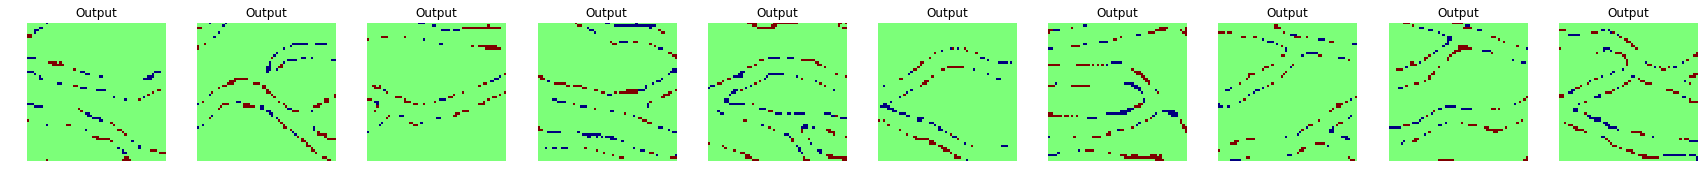

epoch 32 D loss -> 0.4625676 E loss -> 63.892204 Acc -> 0.9503689
Saving best model ...
epoch 33 D loss -> 0.46821648 E loss -> 62.82377 Acc -> 0.95110214


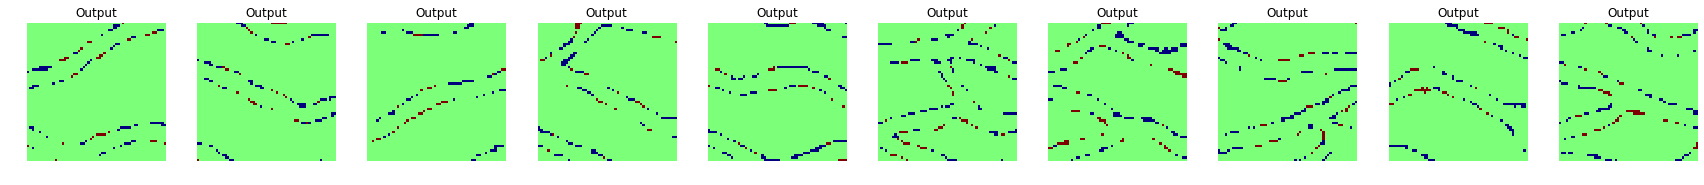

epoch 34 D loss -> 0.4683442 E loss -> 63.031185 Acc -> 0.95105994
epoch 35 D loss -> 0.4643933 E loss -> 63.11129 Acc -> 0.9508585


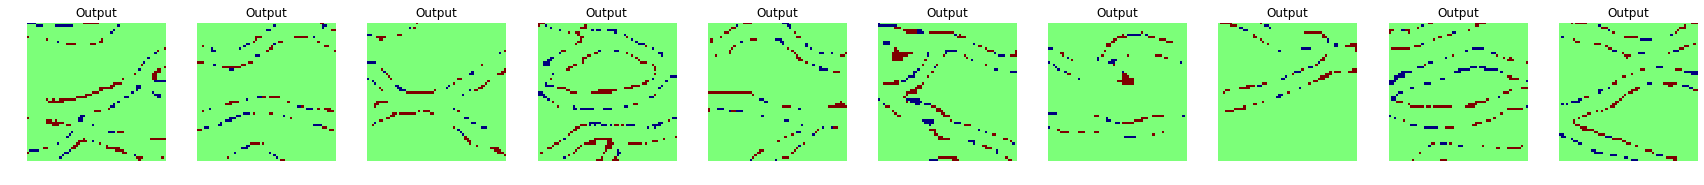

epoch 36 D loss -> 0.46805382 E loss -> 62.669136 Acc -> 0.9510956
Saving best model ...
epoch 37 D loss -> 0.46355566 E loss -> 62.562607 Acc -> 0.9512141


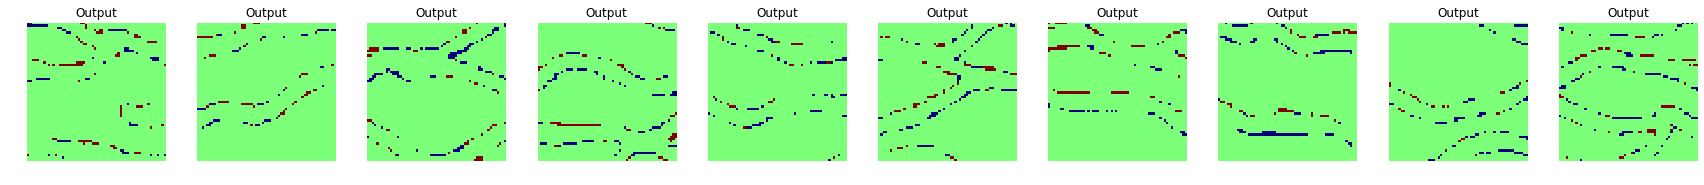

epoch 38 D loss -> 0.4670382 E loss -> 63.051266 Acc -> 0.95091635
Saving best model ...
epoch 39 D loss -> 0.46909454 E loss -> 61.715225 Acc -> 0.95176184


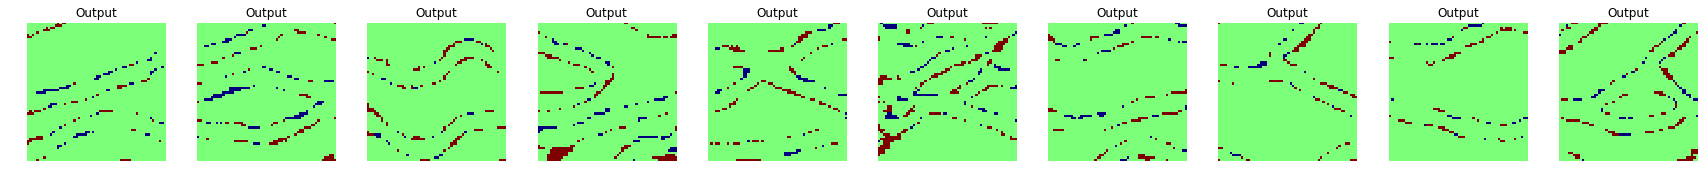

epoch 40 D loss -> 0.46635512 E loss -> 64.89931 Acc -> 0.94972014
epoch 41 D loss -> 0.46681565 E loss -> 62.23726 Acc -> 0.9512784
Saving best model ...


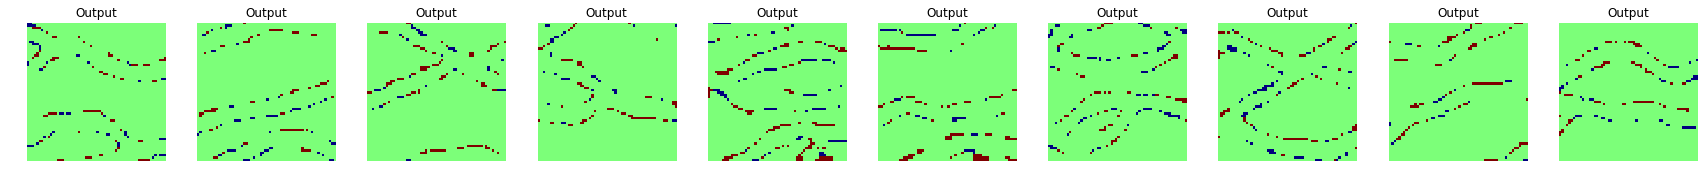

epoch 42 D loss -> 0.46938506 E loss -> 60.745796 Acc -> 0.9524375
epoch 43 D loss -> 0.46970937 E loss -> 61.119755 Acc -> 0.95215976


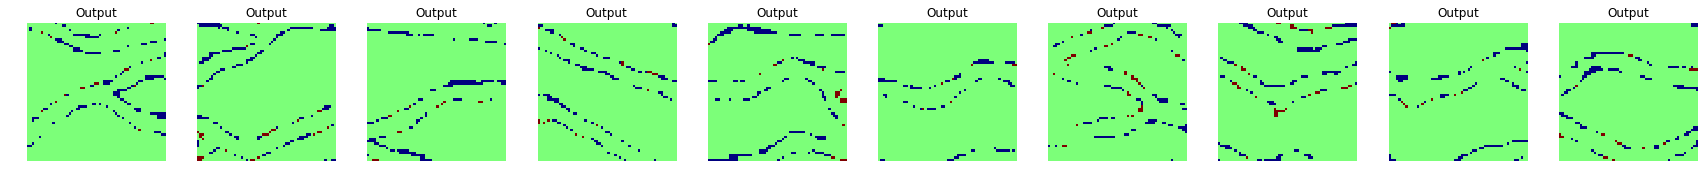

epoch 44 D loss -> 0.4649657 E loss -> 61.11851 Acc -> 0.95222175
epoch 45 D loss -> 0.47143382 E loss -> 61.215206 Acc -> 0.9519653
Saving best model ...


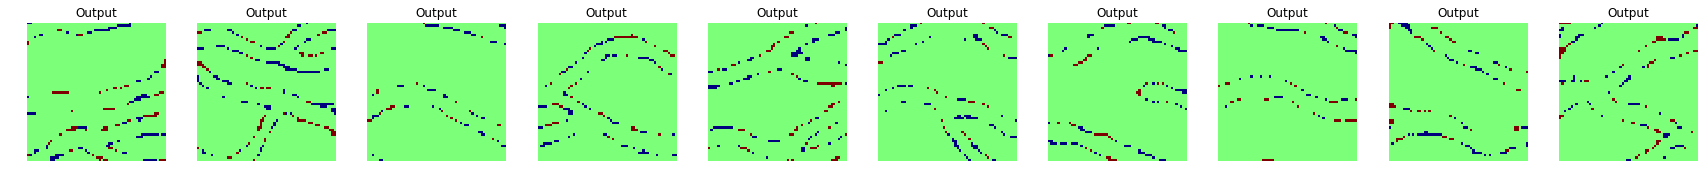

epoch 46 D loss -> 0.47207582 E loss -> 60.106255 Acc -> 0.9527594
epoch 47 D loss -> 0.4738644 E loss -> 60.93054 Acc -> 0.9520553


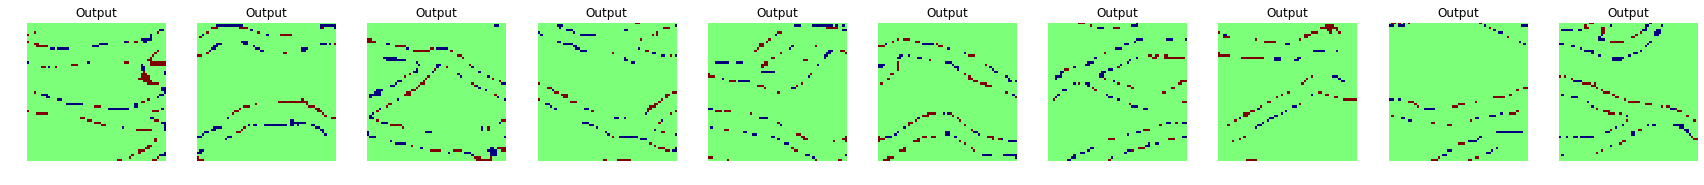

epoch 48 D loss -> 0.46542197 E loss -> 61.28777 Acc -> 0.951889
Saving best model ...
epoch 49 D loss -> 0.46321547 E loss -> 59.3678 Acc -> 0.9533007


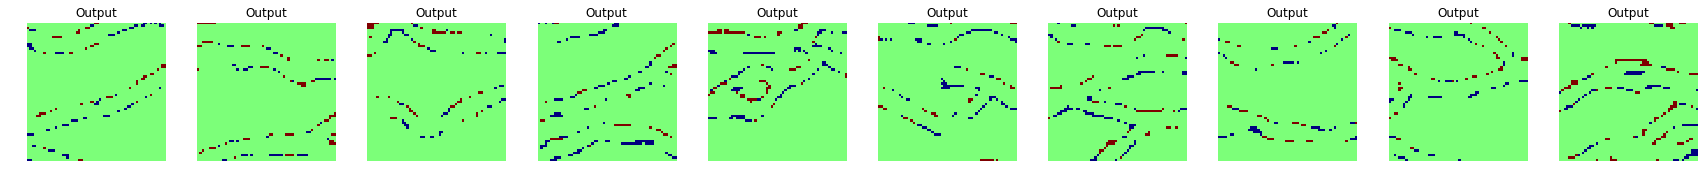

epoch 50 D loss -> 0.47315416 E loss -> 59.580566 Acc -> 0.95318335
epoch 51 D loss -> 0.46781588 E loss -> 59.405674 Acc -> 0.9531068


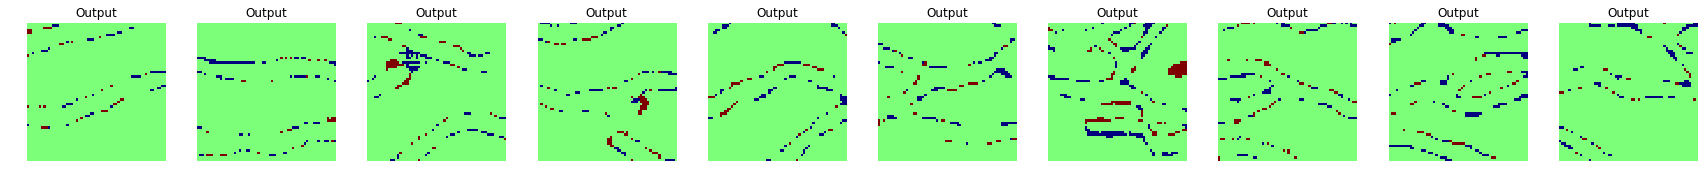

epoch 52 D loss -> 0.4693013 E loss -> 59.2249 Acc -> 0.95329577
Saving best model ...
epoch 53 D loss -> 0.47001055 E loss -> 58.737587 Acc -> 0.9534561


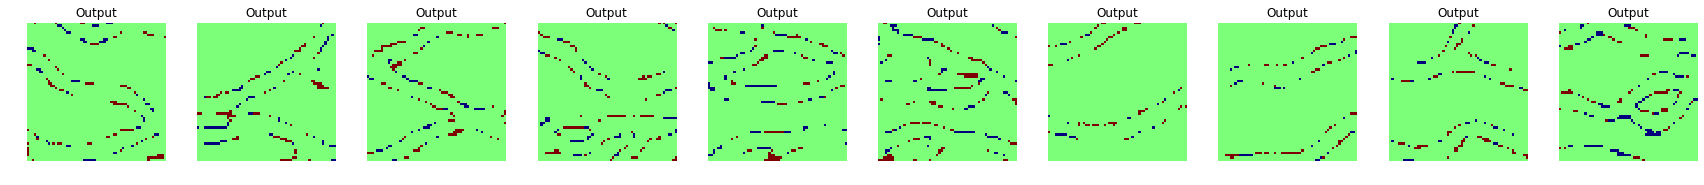

epoch 54 D loss -> 0.4671943 E loss -> 59.0913 Acc -> 0.95322484
Saving best model ...
epoch 55 D loss -> 0.4670766 E loss -> 58.9927 Acc -> 0.9534571
Saving best model ...


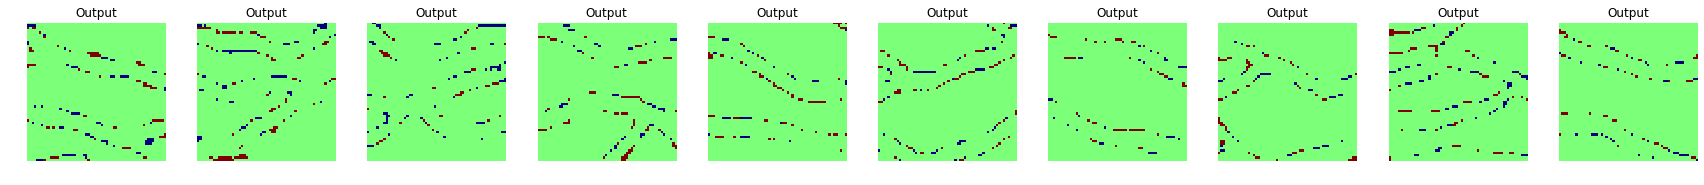

epoch 56 D loss -> 0.47330338 E loss -> 58.956287 Acc -> 0.95346135
epoch 57 D loss -> 0.46575212 E loss -> 59.347725 Acc -> 0.9530955
Saving best model ...


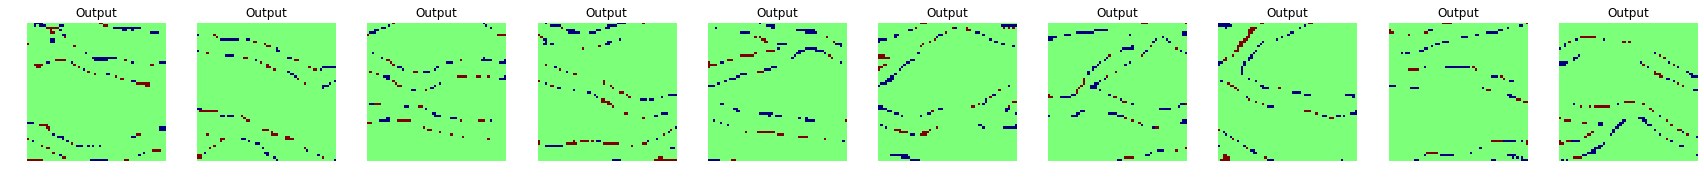

epoch 58 D loss -> 0.4719408 E loss -> 58.596176 Acc -> 0.9536754
epoch 59 D loss -> 0.47129476 E loss -> 58.7416 Acc -> 0.9534662
Saving best model ...


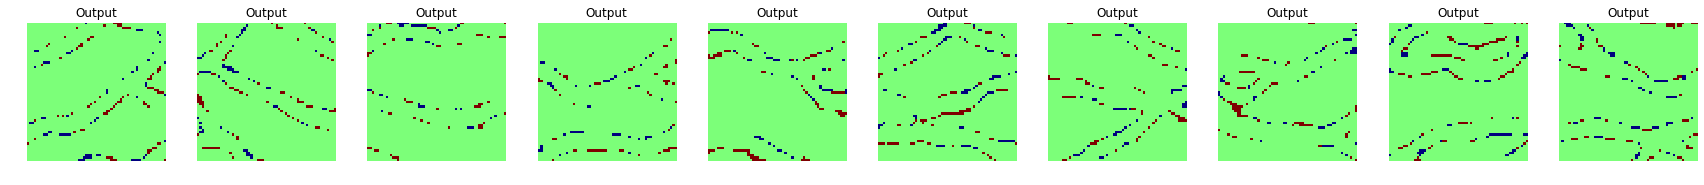

epoch 60 D loss -> 0.4672263 E loss -> 57.75786 Acc -> 0.9541392
epoch 61 D loss -> 0.47189093 E loss -> 57.83899 Acc -> 0.9540984


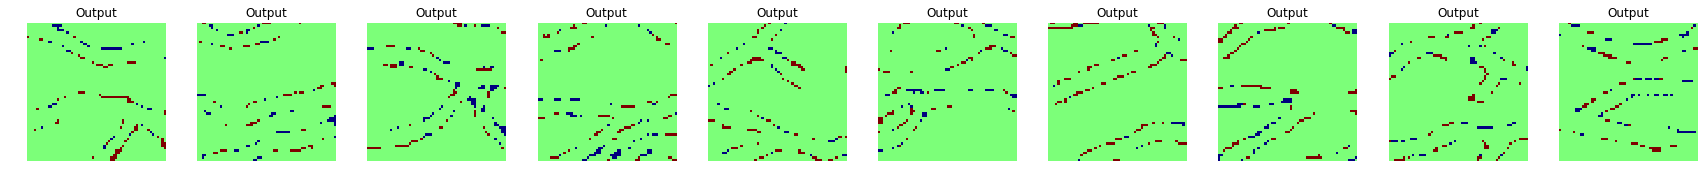

epoch 62 D loss -> 0.46872005 E loss -> 58.166023 Acc -> 0.95385593
epoch 63 D loss -> 0.46501154 E loss -> 58.36705 Acc -> 0.9537503


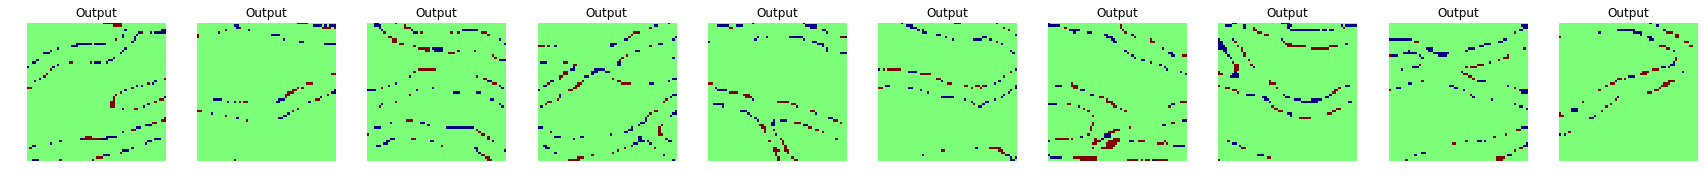

epoch 64 D loss -> 0.47302282 E loss -> 57.791805 Acc -> 0.95408714
Saving best model ...
epoch 65 D loss -> 0.47062147 E loss -> 57.589787 Acc -> 0.95422655


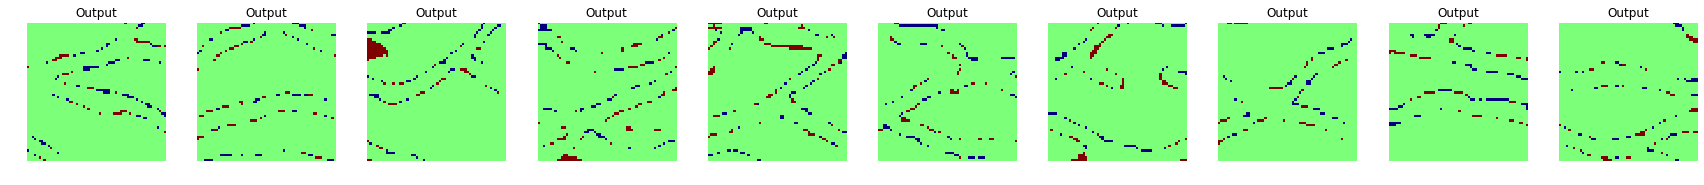

epoch 66 D loss -> 0.46792188 E loss -> 58.077038 Acc -> 0.9539216
epoch 67 D loss -> 0.47174308 E loss -> 58.42133 Acc -> 0.9537761


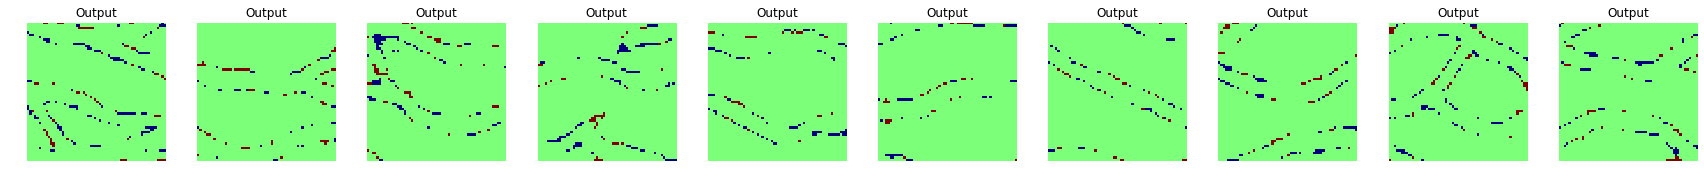

epoch 68 D loss -> 0.47483099 E loss -> 58.249084 Acc -> 0.9538663
epoch 69 D loss -> 0.46896607 E loss -> 57.807125 Acc -> 0.95417887
Saving best model ...


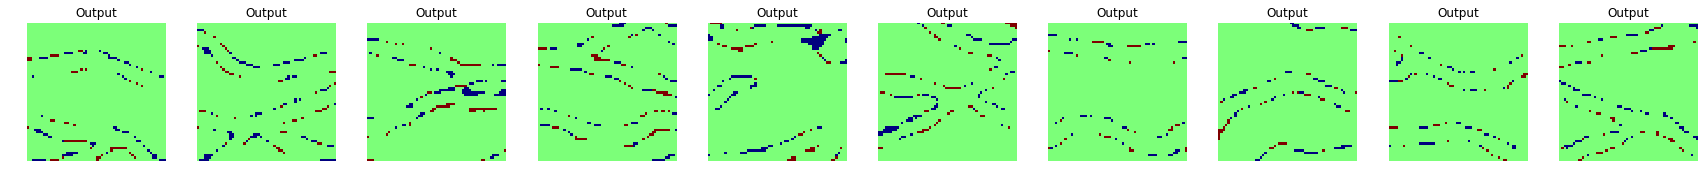

epoch 70 D loss -> 0.47246456 E loss -> 57.04995 Acc -> 0.95459235
Saving best model ...
epoch 71 D loss -> 0.46874413 E loss -> 57.137157 Acc -> 0.95468897


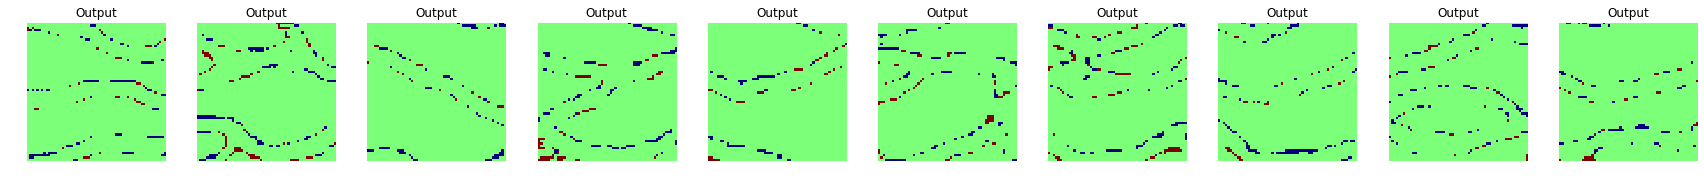

epoch 72 D loss -> 0.468709 E loss -> 57.100777 Acc -> 0.95458734
Saving best model ...
epoch 73 D loss -> 0.47608915 E loss -> 56.776367 Acc -> 0.9547113
Saving best model ...


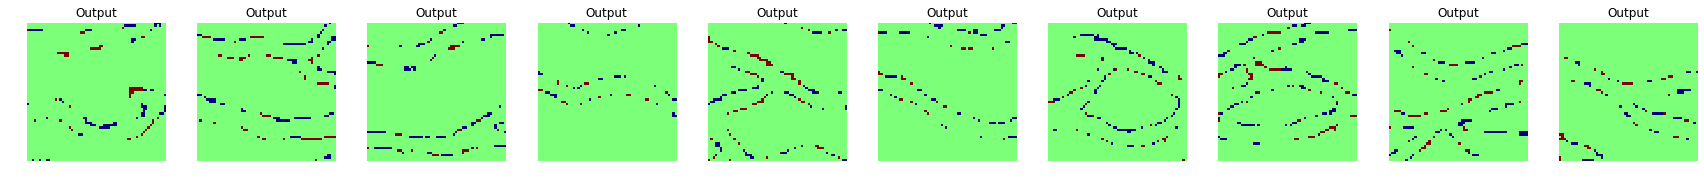

epoch 74 D loss -> 0.46905172 E loss -> 56.669064 Acc -> 0.95497537
epoch 75 D loss -> 0.47137517 E loss -> 57.239468 Acc -> 0.95448214


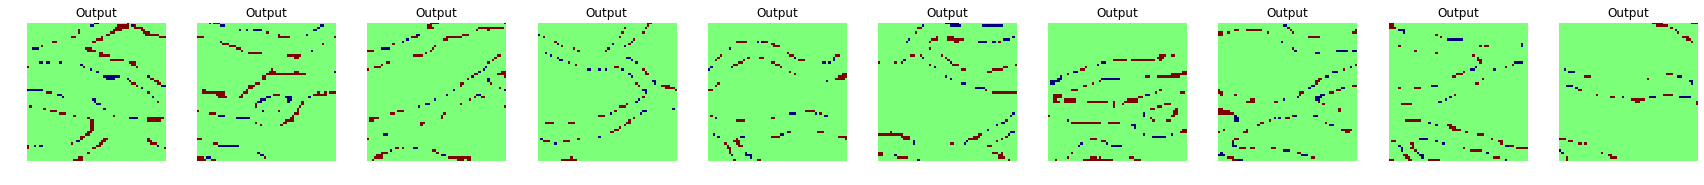

epoch 76 D loss -> 0.47055593 E loss -> 57.5119 Acc -> 0.95437557
epoch 77 D loss -> 0.47445863 E loss -> 57.294907 Acc -> 0.95447797
Saving best model ...


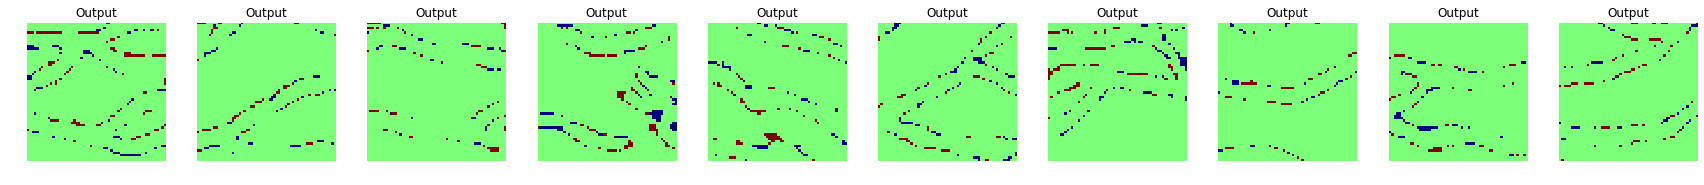

epoch 78 D loss -> 0.46888003 E loss -> 56.178486 Acc -> 0.9551851
epoch 79 D loss -> 0.47044814 E loss -> 56.677773 Acc -> 0.9548391
Saving best model ...


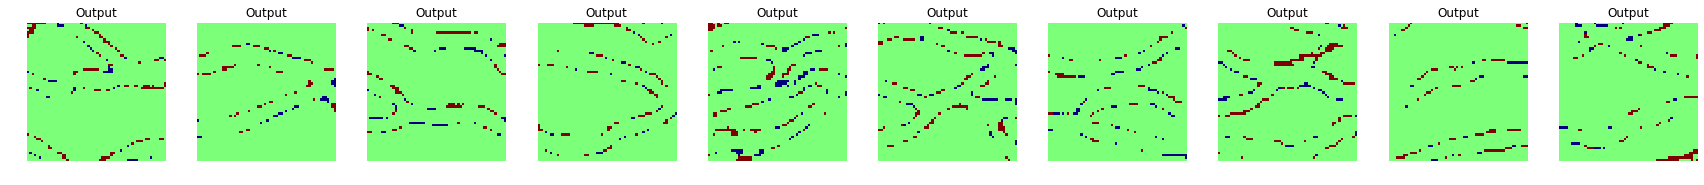

epoch 80 D loss -> 0.47317666 E loss -> 55.905933 Acc -> 0.9554604
epoch 81 D loss -> 0.46790707 E loss -> 56.64834 Acc -> 0.9549511


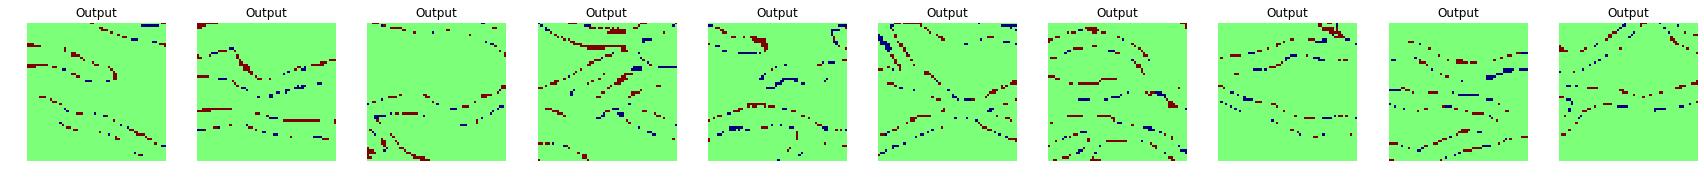

epoch 82 D loss -> 0.47069147 E loss -> 56.955624 Acc -> 0.9545695
epoch 83 D loss -> 0.47610465 E loss -> 57.578953 Acc -> 0.9542532


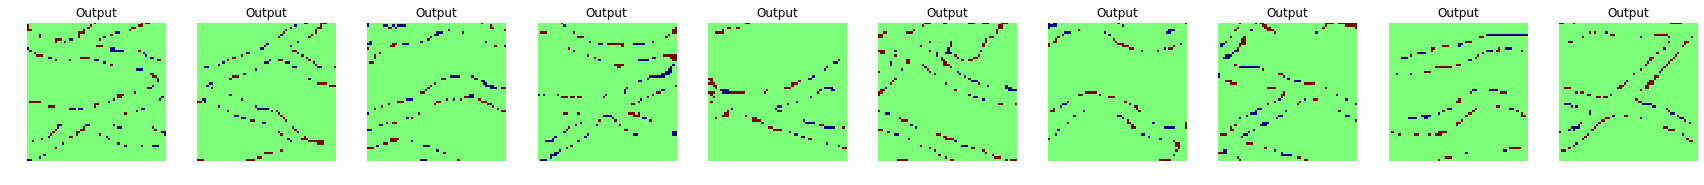

epoch 84 D loss -> 0.47309014 E loss -> 56.592262 Acc -> 0.95492095
epoch 85 D loss -> 0.47121766 E loss -> 58.554886 Acc -> 0.9535799


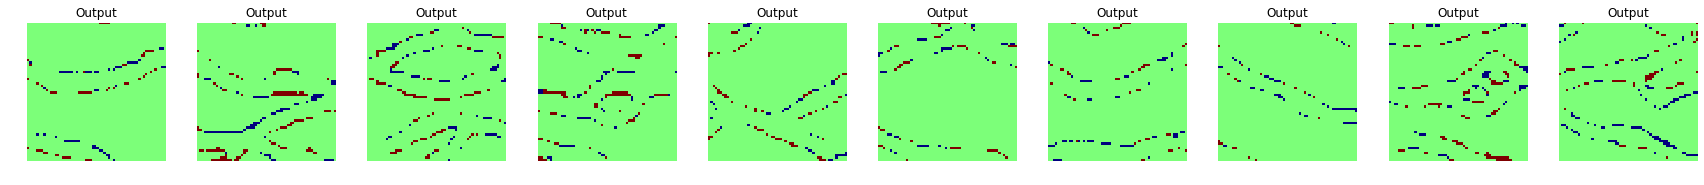

epoch 86 D loss -> 0.4724078 E loss -> 55.811424 Acc -> 0.95545083
epoch 87 D loss -> 0.46440297 E loss -> 56.219345 Acc -> 0.955272


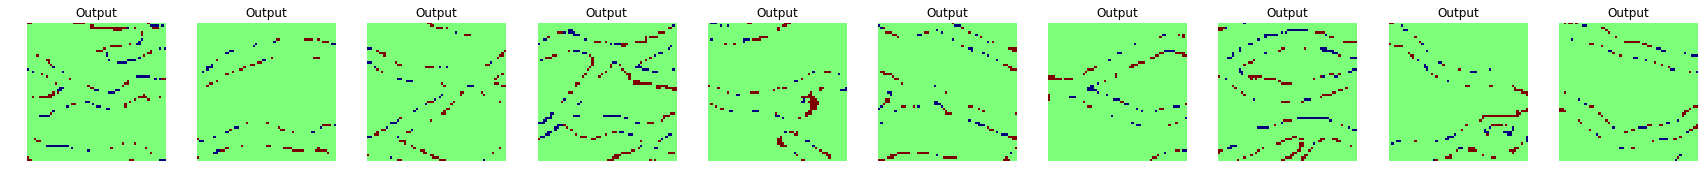

epoch 88 D loss -> 0.47109613 E loss -> 56.33184 Acc -> 0.9552161
Saving best model ...
epoch 89 D loss -> 0.47301498 E loss -> 55.45466 Acc -> 0.9557738


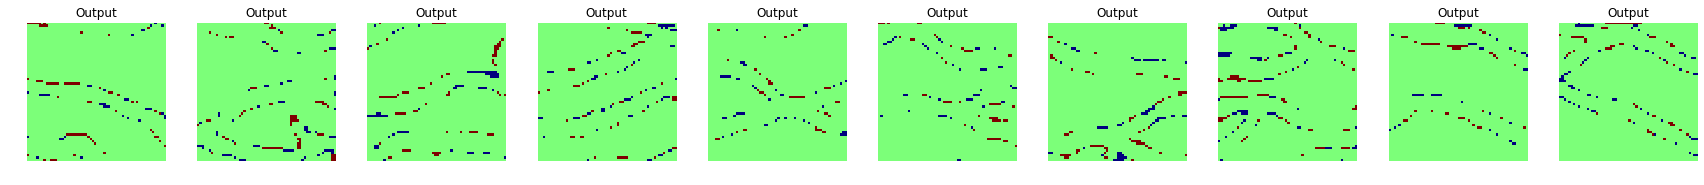

epoch 90 D loss -> 0.4669772 E loss -> 56.6178 Acc -> 0.9548672
epoch 91 D loss -> 0.47370544 E loss -> 55.71172 Acc -> 0.9554826


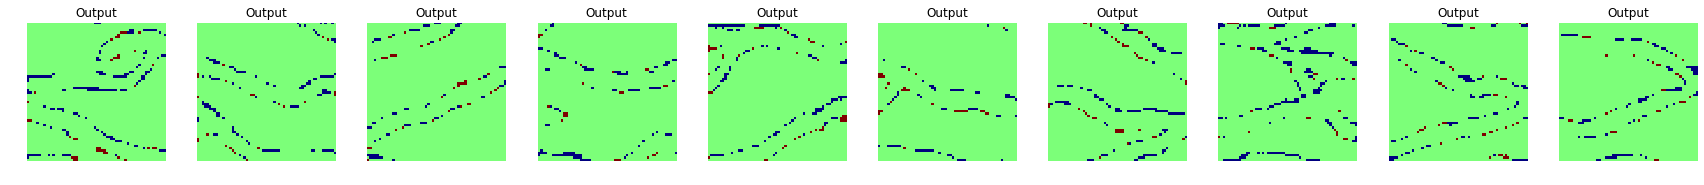

epoch 92 D loss -> 0.47327808 E loss -> 56.237923 Acc -> 0.95517325
epoch 93 D loss -> 0.47546372 E loss -> 56.324978 Acc -> 0.9550095


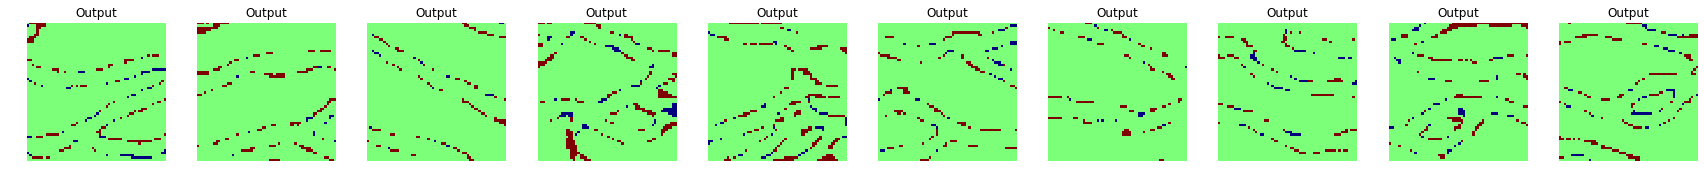

epoch 94 D loss -> 0.47386494 E loss -> 55.61273 Acc -> 0.9556552
epoch 95 D loss -> 0.4722861 E loss -> 55.714348 Acc -> 0.9554425


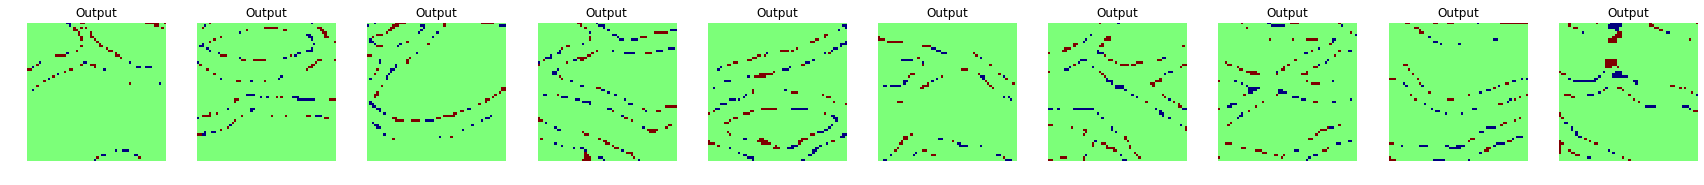

epoch 96 D loss -> 0.47314298 E loss -> 55.750263 Acc -> 0.9554564
epoch 97 D loss -> 0.47369418 E loss -> 55.501125 Acc -> 0.9556456


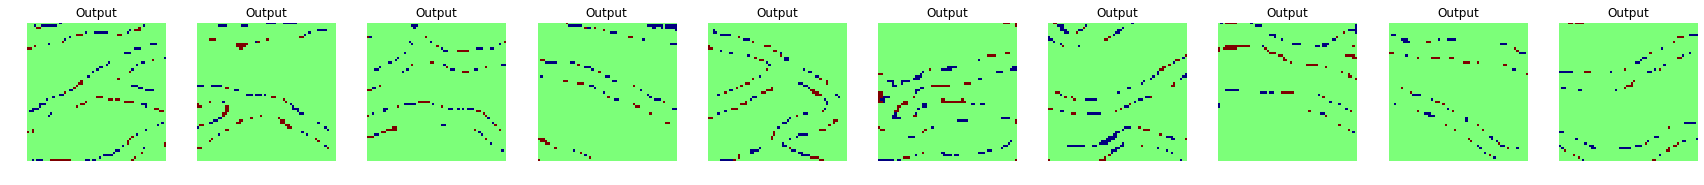

epoch 98 D loss -> 0.4734317 E loss -> 55.843037 Acc -> 0.95534295
epoch 99 D loss -> 0.47321922 E loss -> 55.383778 Acc -> 0.95575434


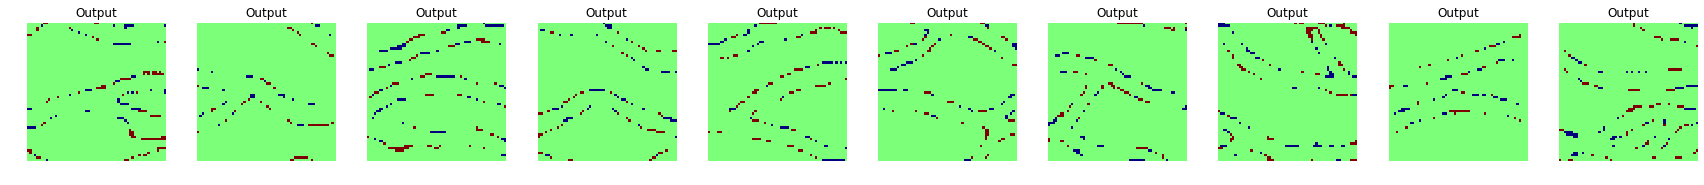

epoch 100 D loss -> 0.4719028 E loss -> 55.753498 Acc -> 0.9554876
epoch 101 D loss -> 0.469749 E loss -> 56.017345 Acc -> 0.955498


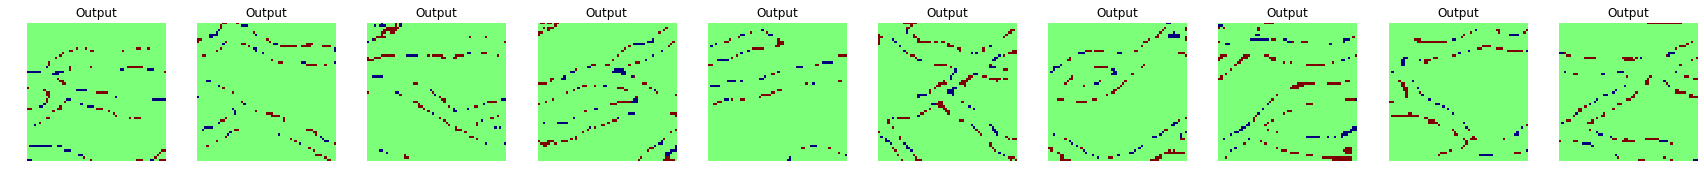

epoch 102 D loss -> 0.4727617 E loss -> 55.701656 Acc -> 0.95540255
epoch 103 D loss -> 0.4730678 E loss -> 55.472786 Acc -> 0.95567244
Saving best model ...


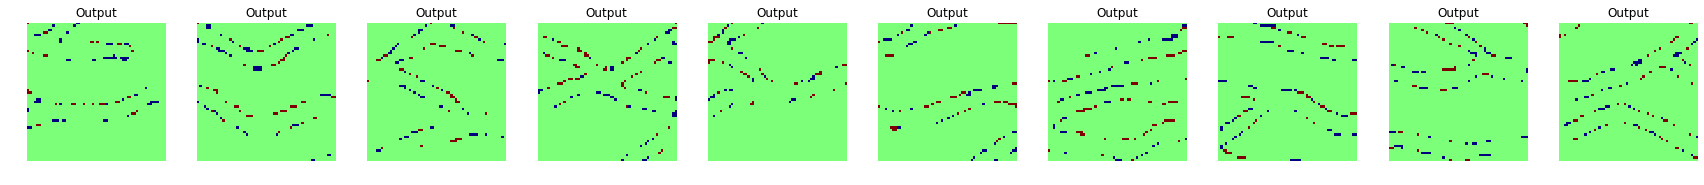

epoch 104 D loss -> 0.4733734 E loss -> 54.794106 Acc -> 0.956175
epoch 105 D loss -> 0.4767412 E loss -> 55.489113 Acc -> 0.9556374


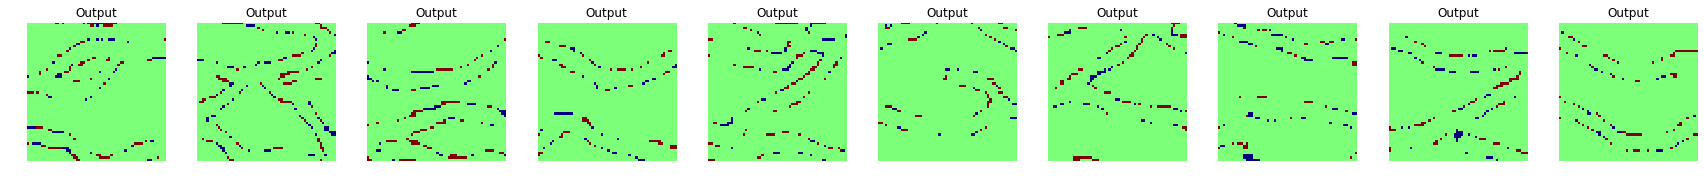

epoch 106 D loss -> 0.47390738 E loss -> 55.97462 Acc -> 0.95529574
epoch 107 D loss -> 0.47616574 E loss -> 56.044895 Acc -> 0.95533127


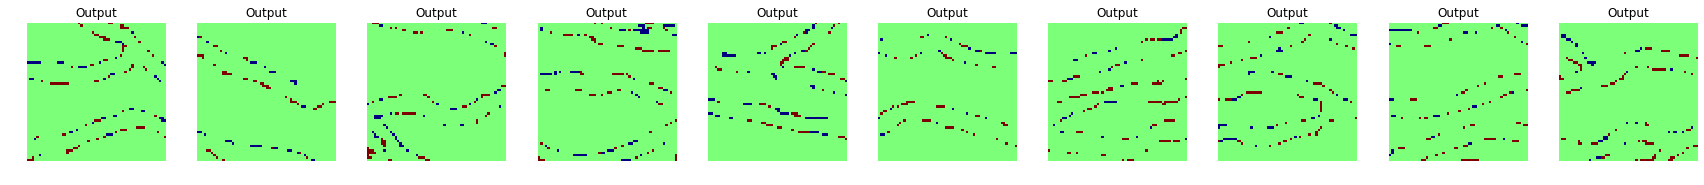

epoch 108 D loss -> 0.47195923 E loss -> 55.304123 Acc -> 0.95575064
epoch 109 D loss -> 0.47145197 E loss -> 54.826607 Acc -> 0.9561719


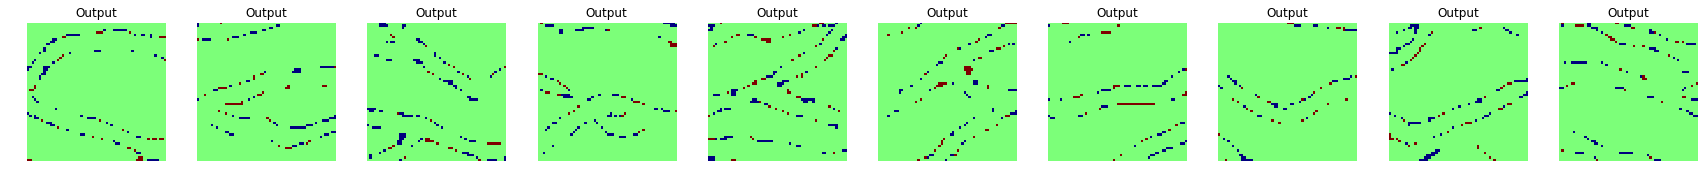

epoch 110 D loss -> 0.47030059 E loss -> 55.462524 Acc -> 0.95567596
epoch 111 D loss -> 0.47590113 E loss -> 54.8616 Acc -> 0.95596987


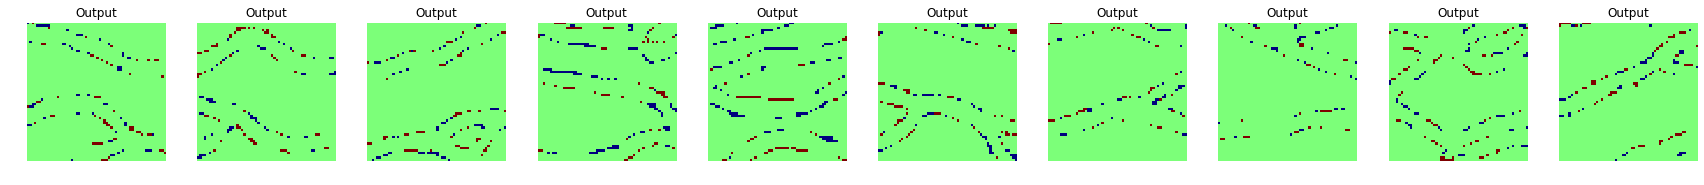

epoch 112 D loss -> 0.47389323 E loss -> 55.976425 Acc -> 0.9553022
epoch 113 D loss -> 0.47486237 E loss -> 54.76353 Acc -> 0.95608115


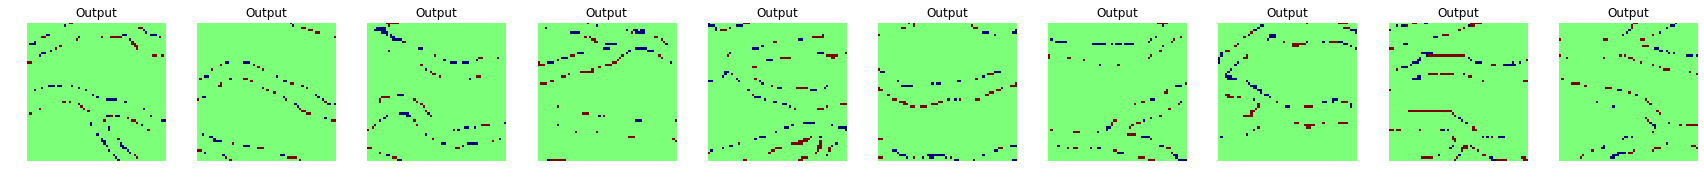

epoch 114 D loss -> 0.47742933 E loss -> 56.04426 Acc -> 0.95521533
epoch 115 D loss -> 0.48169386 E loss -> 55.17145 Acc -> 0.955735


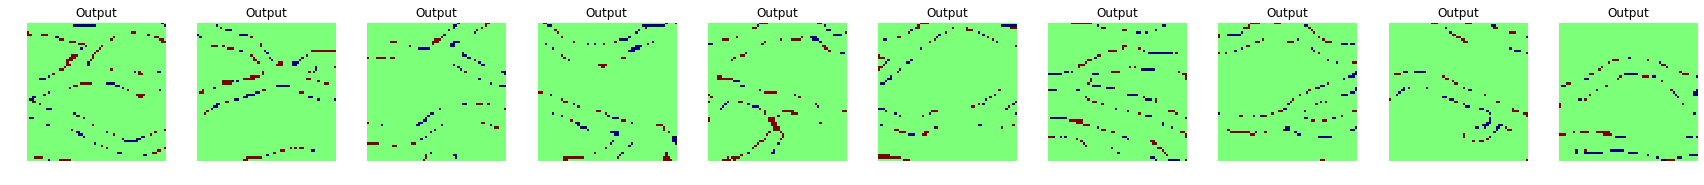

epoch 116 D loss -> 0.47431967 E loss -> 54.85712 Acc -> 0.9560865
epoch 117 D loss -> 0.4741312 E loss -> 55.179 Acc -> 0.9557054


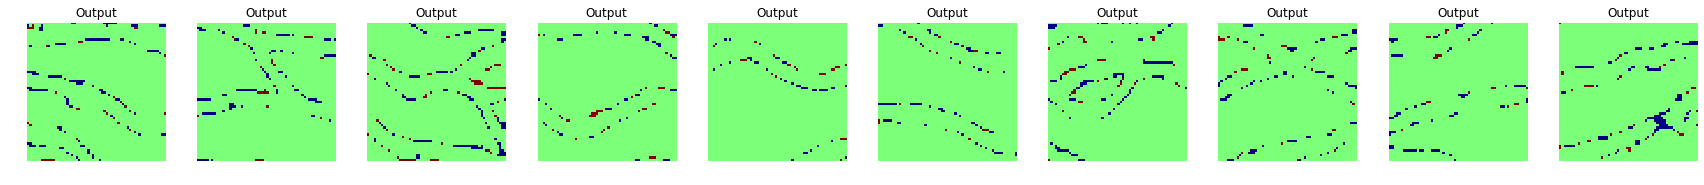

epoch 118 D loss -> 0.47437286 E loss -> 55.009342 Acc -> 0.95587826
epoch 119 D loss -> 0.47557804 E loss -> 54.926277 Acc -> 0.9559375


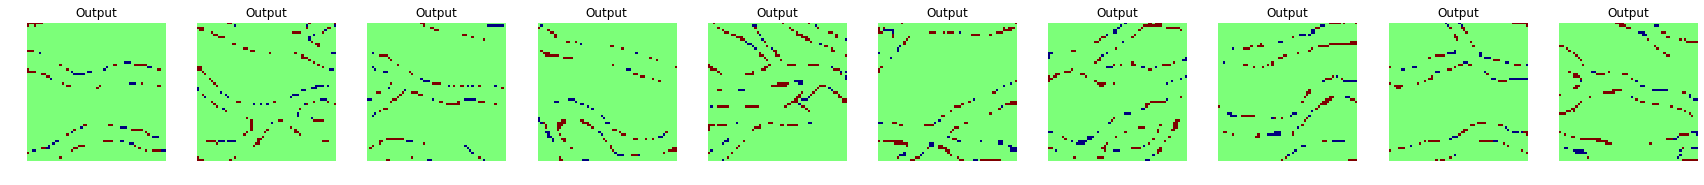

epoch 120 D loss -> 0.4781411 E loss -> 54.97955 Acc -> 0.9559763
Saving best model ...
epoch 121 D loss -> 0.47587696 E loss -> 54.4781 Acc -> 0.95631486


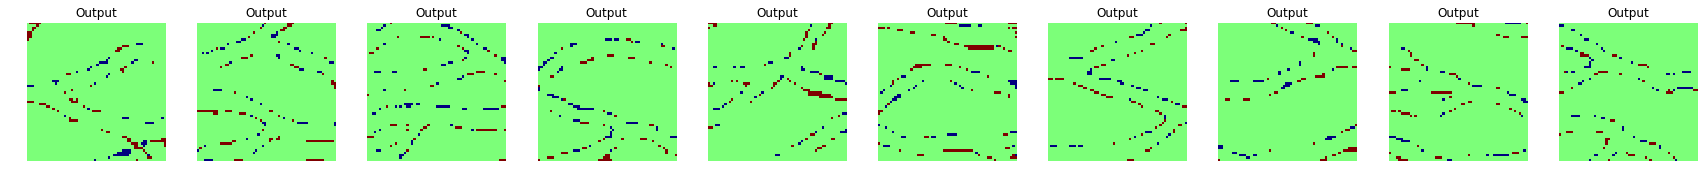

epoch 122 D loss -> 0.47367895 E loss -> 54.973606 Acc -> 0.9559681
Saving best model ...
epoch 123 D loss -> 0.47928604 E loss -> 54.388916 Acc -> 0.9563313


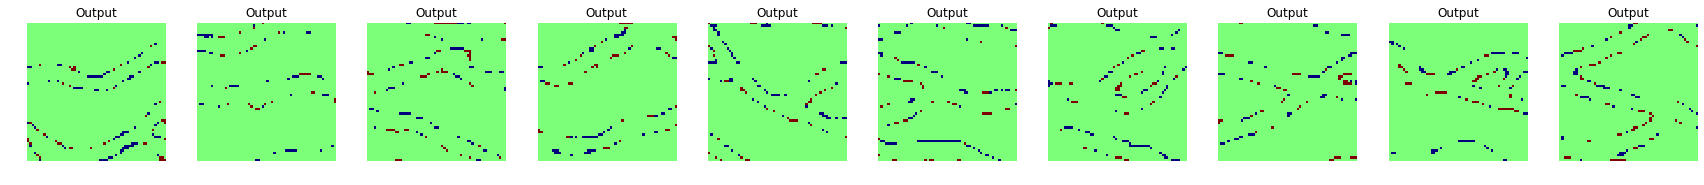

epoch 124 D loss -> 0.4736201 E loss -> 54.57913 Acc -> 0.9561983
epoch 125 D loss -> 0.47555688 E loss -> 54.777855 Acc -> 0.95605785


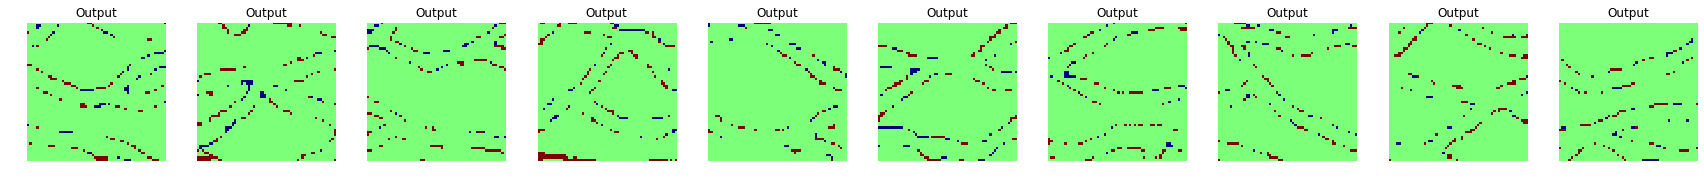

epoch 126 D loss -> 0.47117624 E loss -> 54.77733 Acc -> 0.9560845
epoch 127 D loss -> 0.47211334 E loss -> 54.500137 Acc -> 0.9562705


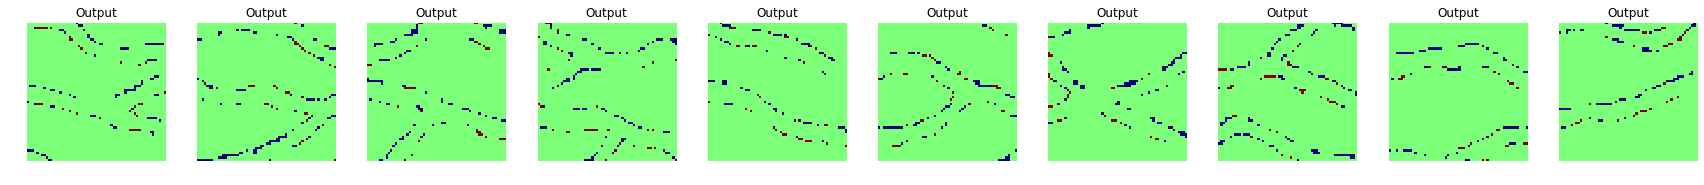

epoch 128 D loss -> 0.4800744 E loss -> 54.81513 Acc -> 0.9559444
Saving best model ...
epoch 129 D loss -> 0.47534895 E loss -> 54.246582 Acc -> 0.9563683


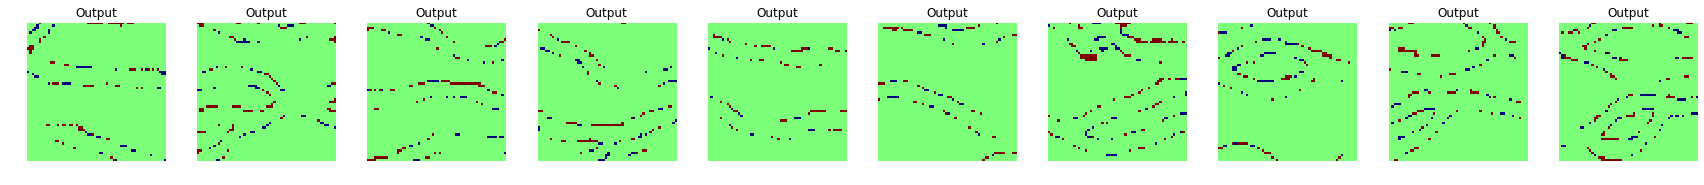

epoch 130 D loss -> 0.47636816 E loss -> 54.516518 Acc -> 0.95619965
epoch 131 D loss -> 0.4736207 E loss -> 55.271114 Acc -> 0.95571065


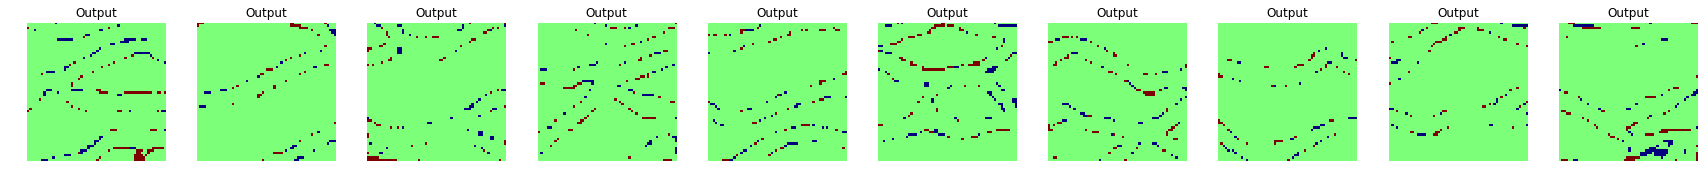

epoch 132 D loss -> 0.4784477 E loss -> 55.72595 Acc -> 0.95539445
Saving best model ...
epoch 133 D loss -> 0.47498456 E loss -> 54.10948 Acc -> 0.9564699


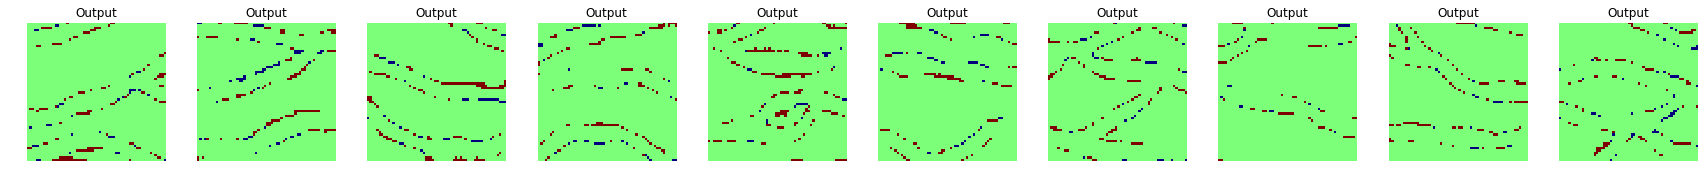

epoch 134 D loss -> 0.4752051 E loss -> 54.93903 Acc -> 0.9559661
epoch 135 D loss -> 0.47456092 E loss -> 54.294025 Acc -> 0.95636255


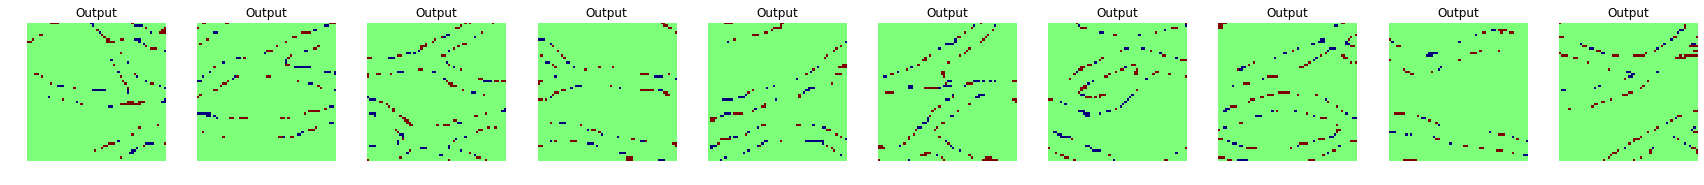

epoch 136 D loss -> 0.47733128 E loss -> 54.36851 Acc -> 0.9562315
epoch 137 D loss -> 0.4784741 E loss -> 54.60579 Acc -> 0.9561871
Saving best model ...


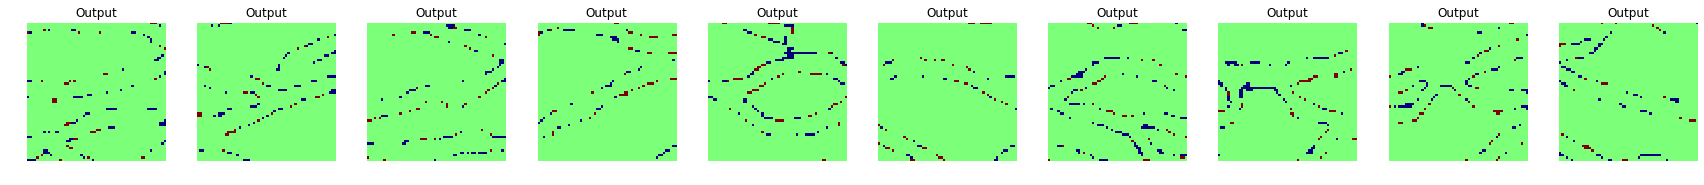

epoch 138 D loss -> 0.4773012 E loss -> 54.115337 Acc -> 0.9565324
epoch 139 D loss -> 0.47679597 E loss -> 54.090298 Acc -> 0.95647734


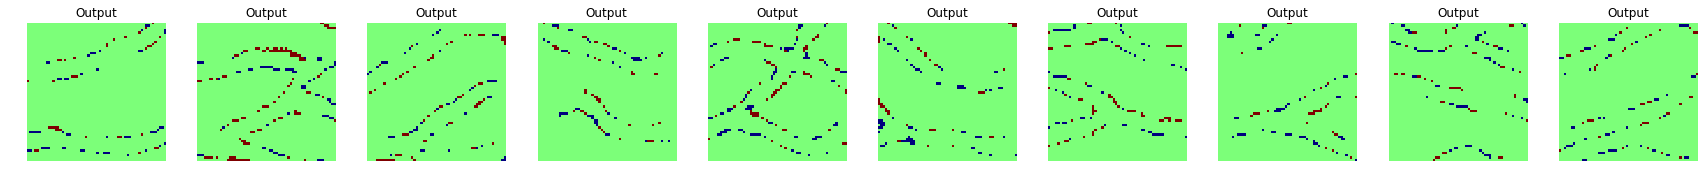

epoch 140 D loss -> 0.47256842 E loss -> 54.897724 Acc -> 0.95594996
Saving best model ...
epoch 141 D loss -> 0.47470686 E loss -> 54.00586 Acc -> 0.9565652


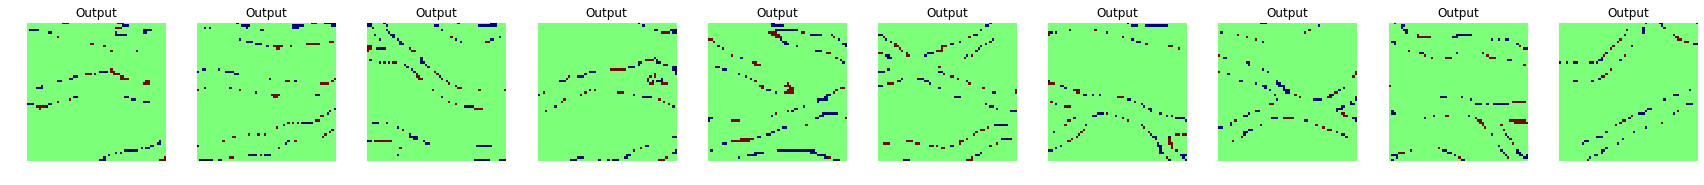

epoch 142 D loss -> 0.4739309 E loss -> 54.733116 Acc -> 0.95598257
epoch 143 D loss -> 0.47953957 E loss -> 56.07469 Acc -> 0.95514905
Saving best model ...


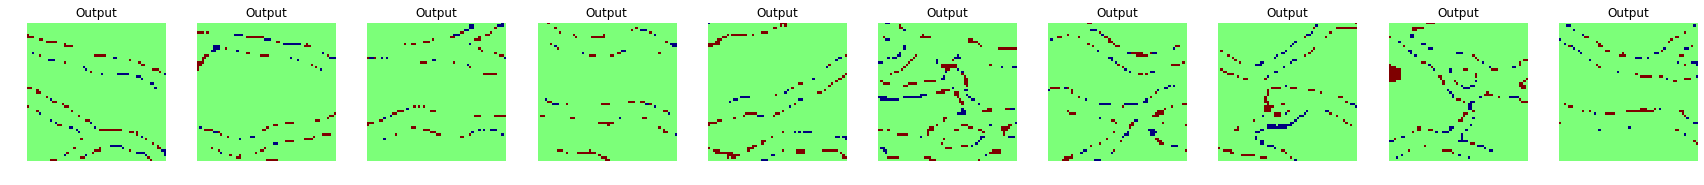

epoch 144 D loss -> 0.47852463 E loss -> 54.01282 Acc -> 0.9566585
epoch 145 D loss -> 0.47852045 E loss -> 55.842205 Acc -> 0.9551789


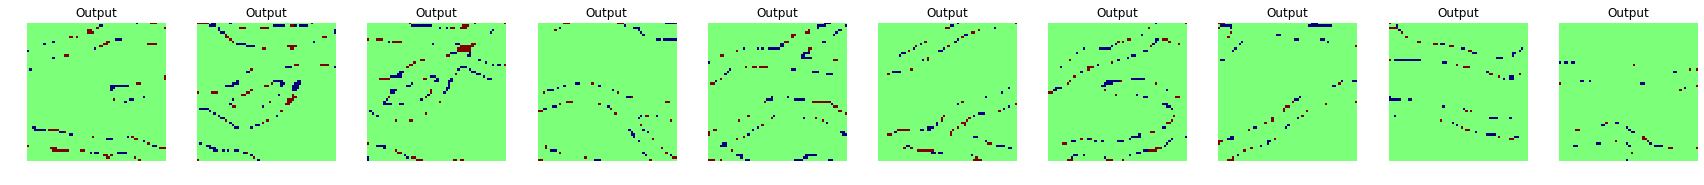

epoch 146 D loss -> 0.48106804 E loss -> 53.98504 Acc -> 0.9566033
epoch 147 D loss -> 0.4780721 E loss -> 54.637756 Acc -> 0.9562148


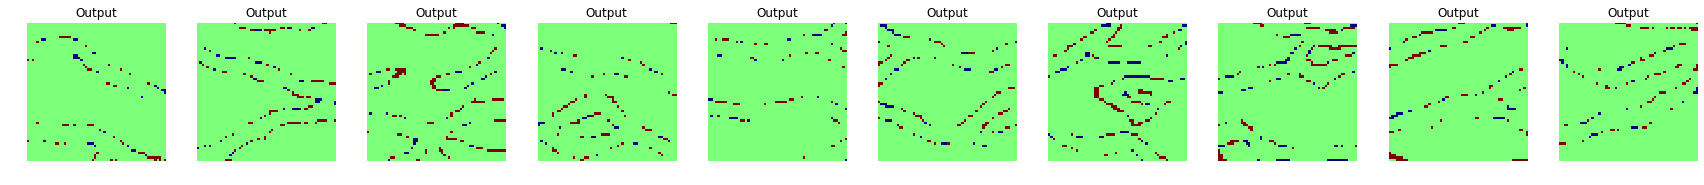

epoch 148 D loss -> 0.47958395 E loss -> 54.56036 Acc -> 0.9562636
epoch 149 D loss -> 0.4757468 E loss -> 54.189457 Acc -> 0.9563857


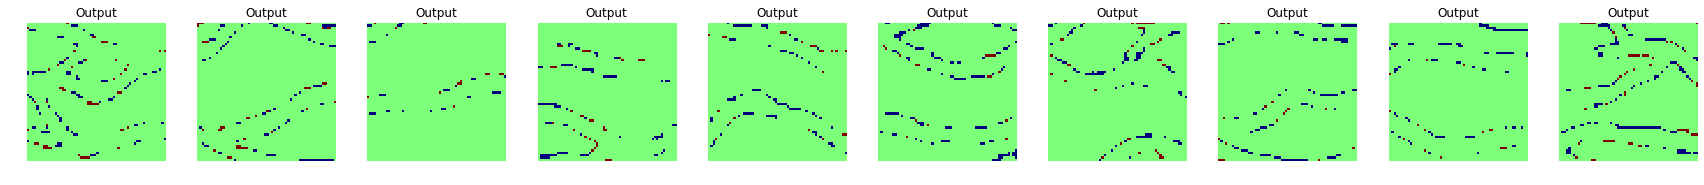

epoch 150 D loss -> 0.47567892 E loss -> 53.996716 Acc -> 0.95657736
Saving best model ...
epoch 151 D loss -> 0.47715083 E loss -> 53.58971 Acc -> 0.9567789


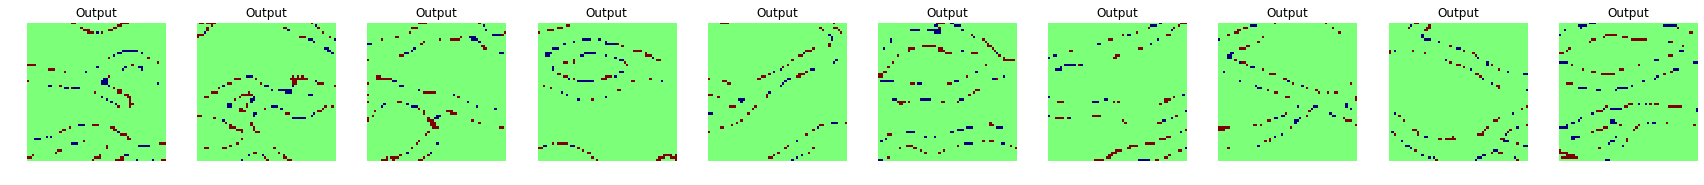

epoch 152 D loss -> 0.47807577 E loss -> 54.395023 Acc -> 0.9563124
epoch 153 D loss -> 0.48115283 E loss -> 54.30085 Acc -> 0.9563475


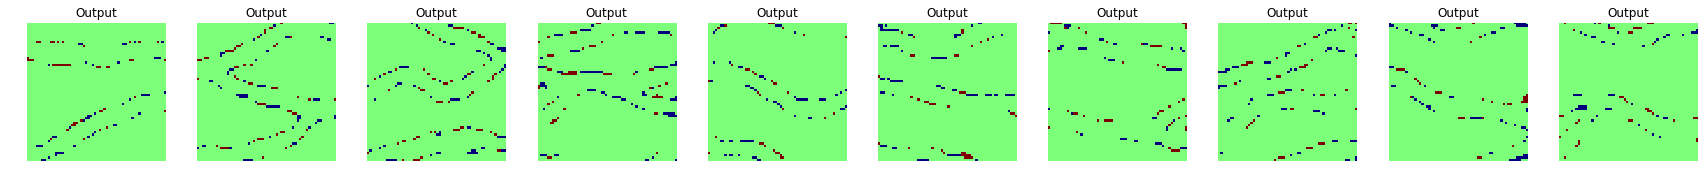

epoch 154 D loss -> 0.47972405 E loss -> 54.215664 Acc -> 0.95639014
epoch 155 D loss -> 0.47810093 E loss -> 54.05138 Acc -> 0.9565616


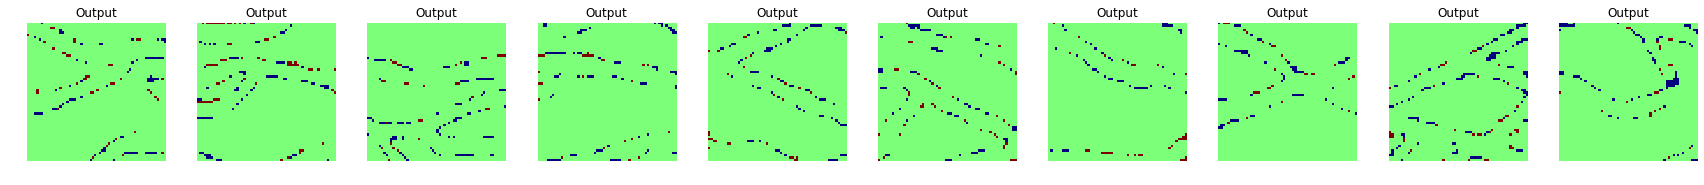

epoch 156 D loss -> 0.48161873 E loss -> 54.70222 Acc -> 0.95599425
epoch 157 D loss -> 0.47793728 E loss -> 53.813305 Acc -> 0.95669013


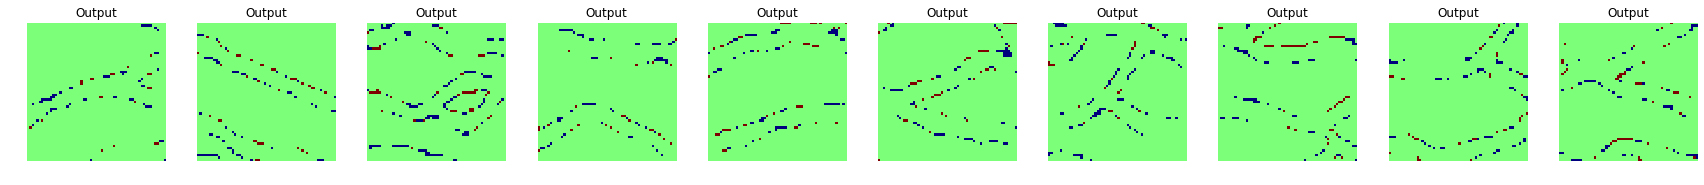

epoch 158 D loss -> 0.4850265 E loss -> 53.887703 Acc -> 0.95653707
epoch 159 D loss -> 0.47552475 E loss -> 54.156254 Acc -> 0.95637214
Saving best model ...


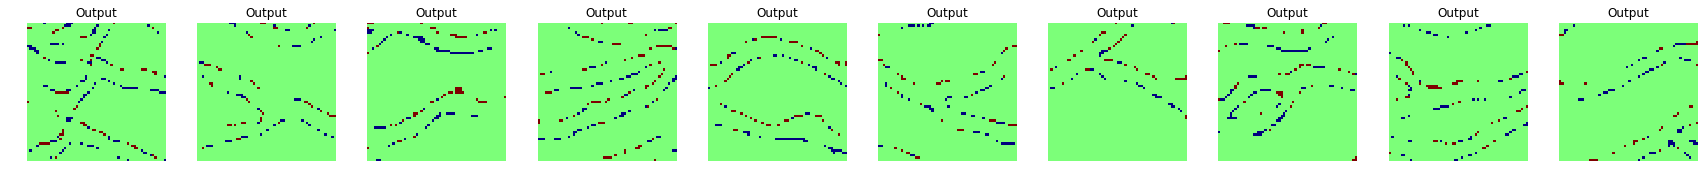

epoch 160 D loss -> 0.47881922 E loss -> 53.527634 Acc -> 0.9568039
epoch 161 D loss -> 0.4791005 E loss -> 53.767807 Acc -> 0.95672596


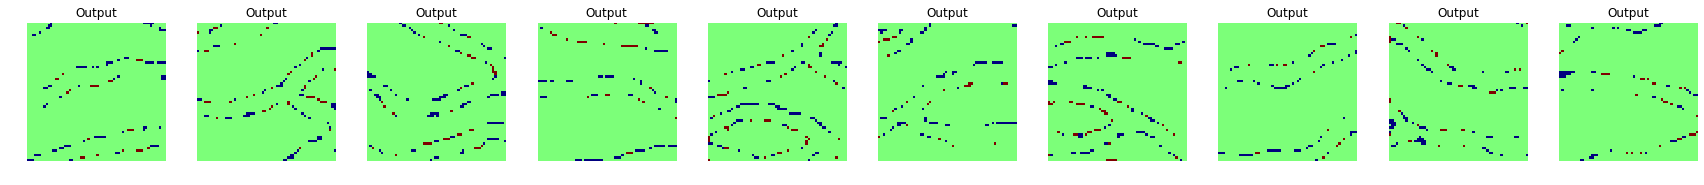

epoch 162 D loss -> 0.4817492 E loss -> 53.86029 Acc -> 0.9566823
epoch 163 D loss -> 0.482193 E loss -> 54.00916 Acc -> 0.956548


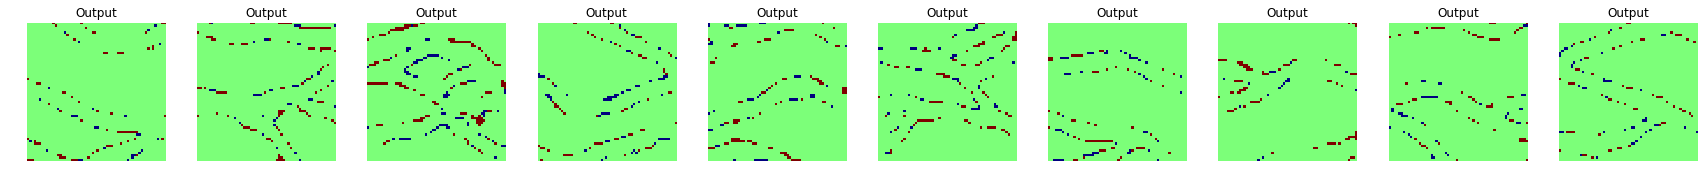

epoch 164 D loss -> 0.47469586 E loss -> 54.013203 Acc -> 0.9565289
epoch 165 D loss -> 0.47888586 E loss -> 53.51862 Acc -> 0.95676446


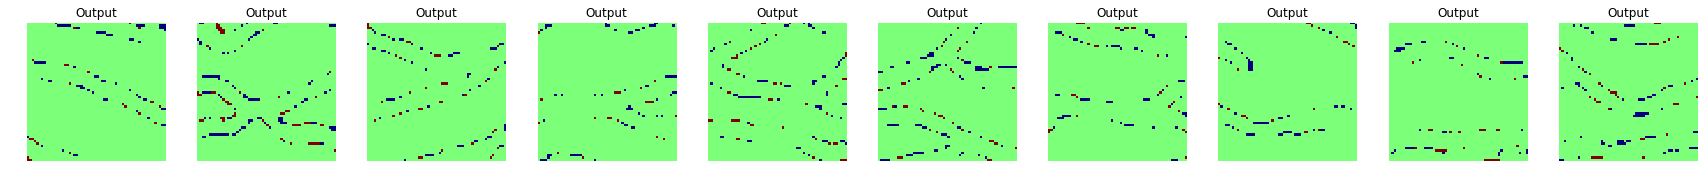

epoch 166 D loss -> 0.4777015 E loss -> 53.528233 Acc -> 0.9567427
Saving best model ...
epoch 167 D loss -> 0.47584945 E loss -> 53.312435 Acc -> 0.956954


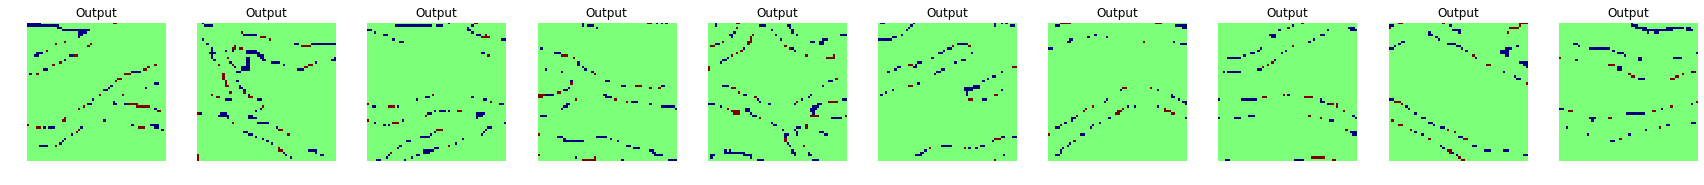

epoch 168 D loss -> 0.47674635 E loss -> 53.6248 Acc -> 0.9567792
epoch 169 D loss -> 0.4804124 E loss -> 54.103447 Acc -> 0.9564272


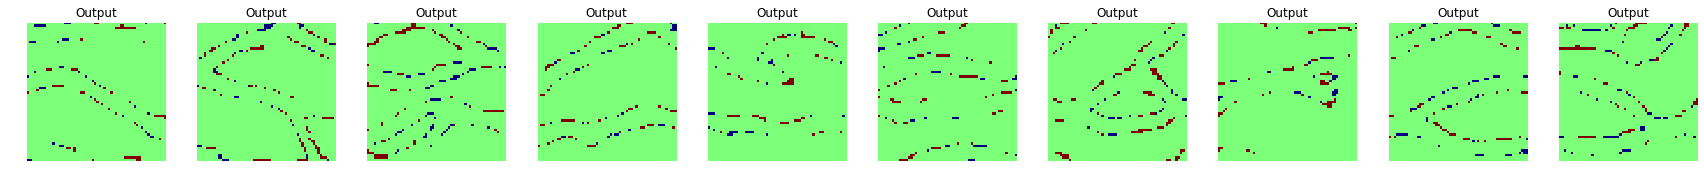

epoch 170 D loss -> 0.4755845 E loss -> 53.530094 Acc -> 0.95686567
epoch 171 D loss -> 0.47583812 E loss -> 53.605244 Acc -> 0.956763


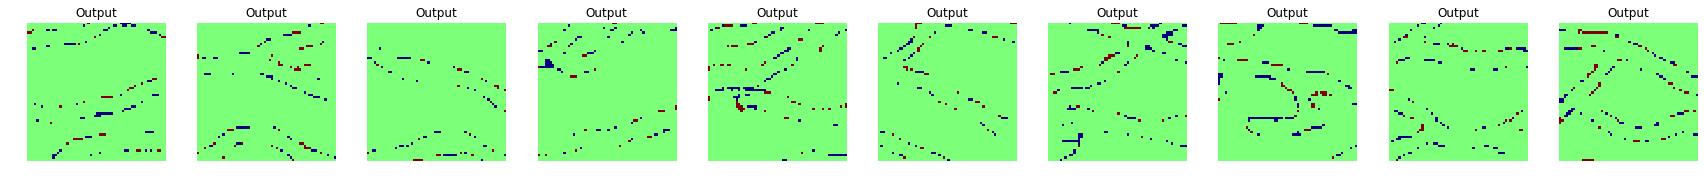

epoch 172 D loss -> 0.4746117 E loss -> 54.093544 Acc -> 0.95631135
epoch 173 D loss -> 0.48199362 E loss -> 54.715935 Acc -> 0.956098


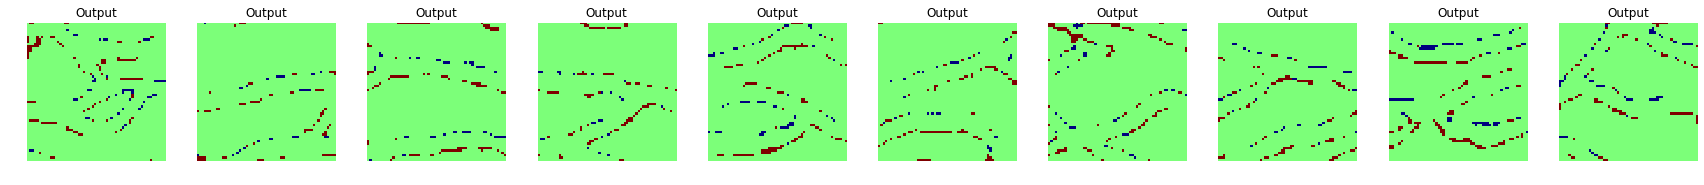

epoch 174 D loss -> 0.4774356 E loss -> 54.714725 Acc -> 0.95605564
epoch 175 D loss -> 0.47982326 E loss -> 53.97233 Acc -> 0.9564439


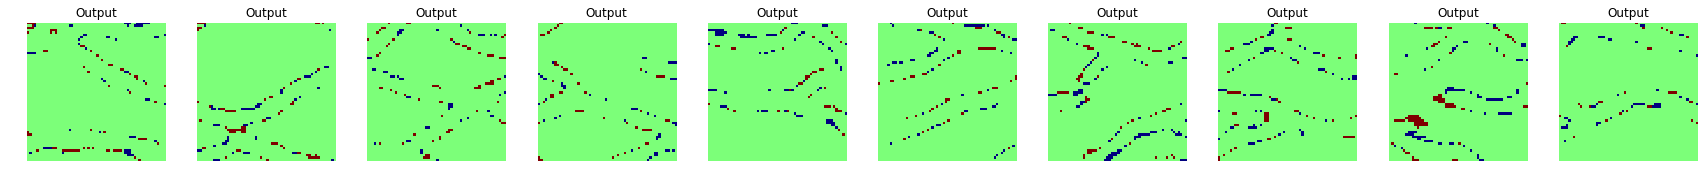

epoch 176 D loss -> 0.4789479 E loss -> 53.67535 Acc -> 0.9567937
epoch 177 D loss -> 0.47640955 E loss -> 54.10948 Acc -> 0.95628995


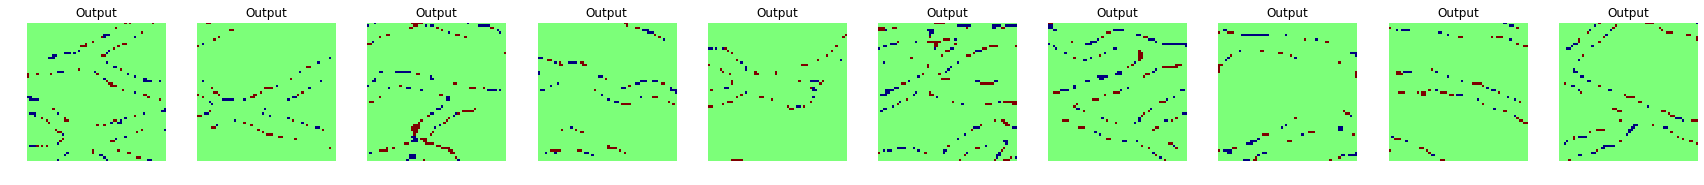

epoch 178 D loss -> 0.479636 E loss -> 53.67382 Acc -> 0.95669246
epoch 179 D loss -> 0.48284587 E loss -> 53.886 Acc -> 0.9565414


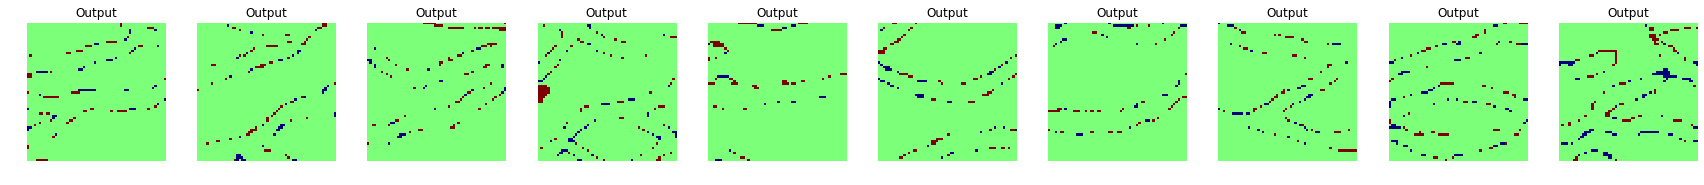

epoch 180 D loss -> 0.48278385 E loss -> 53.764713 Acc -> 0.95662767
epoch 181 D loss -> 0.4814717 E loss -> 54.043247 Acc -> 0.9564124


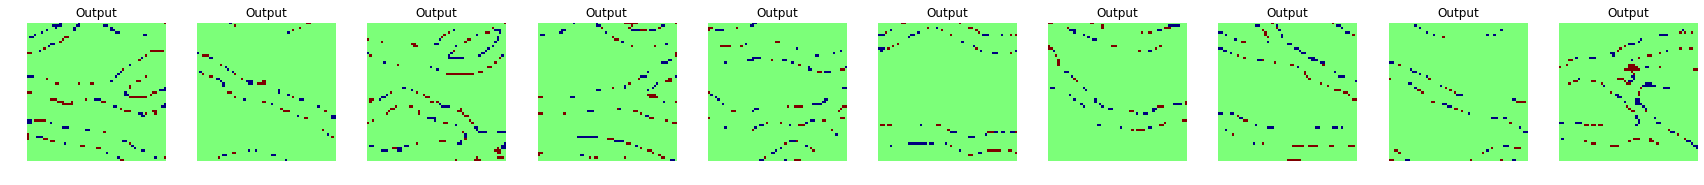

epoch 182 D loss -> 0.47963443 E loss -> 54.07976 Acc -> 0.95638865
epoch 183 D loss -> 0.48189595 E loss -> 53.539272 Acc -> 0.95679253


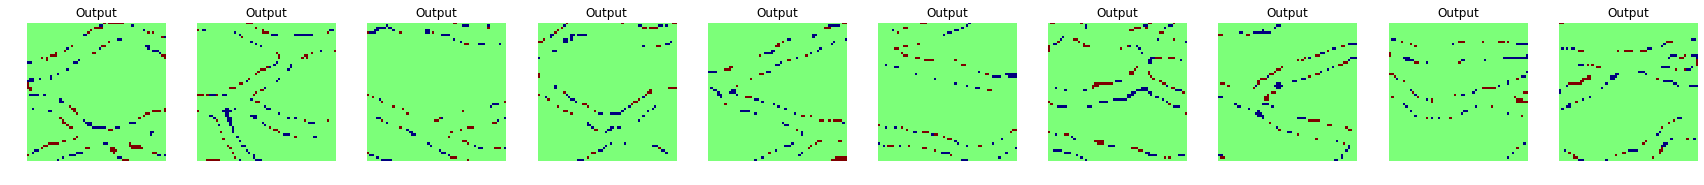

epoch 184 D loss -> 0.48479685 E loss -> 55.68291 Acc -> 0.9552943
epoch 185 D loss -> 0.47933653 E loss -> 53.682117 Acc -> 0.9567506


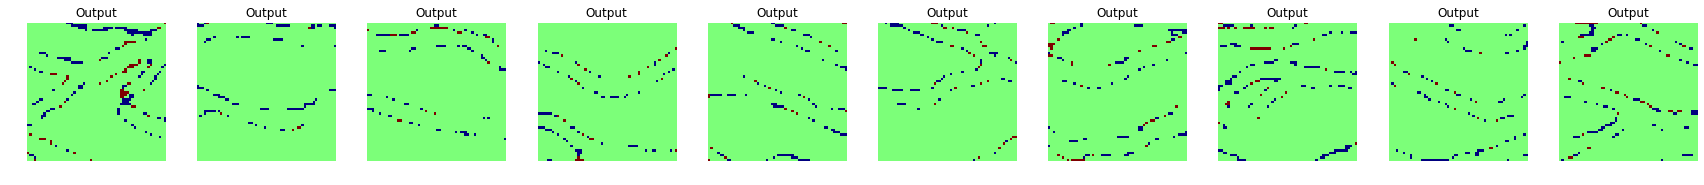

epoch 186 D loss -> 0.48315892 E loss -> 53.227272 Acc -> 0.9569208
epoch 187 D loss -> 0.4777112 E loss -> 53.57851 Acc -> 0.9568713
Training stoped ...


In [ ]:
model = GAN2D_MPS(input_shape = (n_rows, n_cols, n_chns)) # saving_path = path_tfr + '/', summary = True
model.train(x_train , epochs=num_epochs, num_plots = 10)

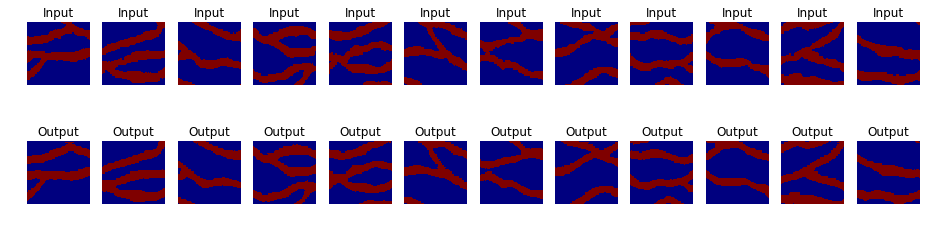

In [ ]:
model_plot(x_train[:20], model, num_plots = 12)

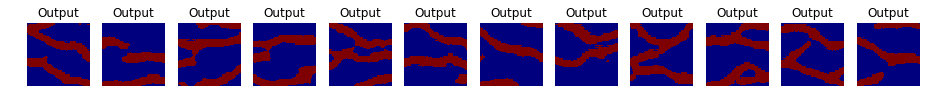

In [ ]:
x_random = np.random.normal(0, 1, size=(20, 500))
model_plot(x_random, model, num_plots = 12, mode = "gen", figsize = (60,60), type_model = "CycleGAN" )

## 2. WGAN2D_MPS Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_g_input (InputLayer)     (None, 500)               0         
_________________________________________________________________
gan_g_dense (Dense)          (None, 16384)             8208384   
_________________________________________________________________
gan_g_reshape (Reshape)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_bn_dense (BatchNormali (None, 8, 8, 256)         1024      
_________________________________________________________________
gan_g_relu (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_1_deconv2D (Conv2DTran (None, 16, 16, 128)       524416    
_________________________________________________________________
gan_g_1_bn (BatchNormalizati (None, 16, 16, 128)       512       
__________

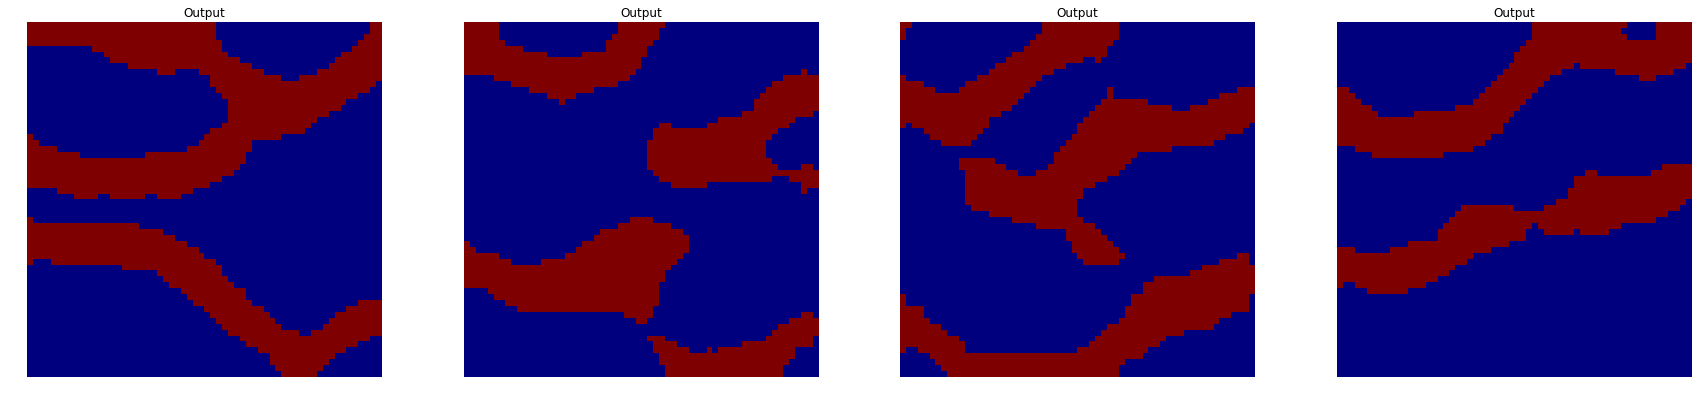

Saving check point ...
Iteration:  10000   D loss:  -2862.6846   G loss:  -109266.766   Accuracy:  0.93390626
Saving check point ...
Iteration:  15000   D loss:  -899.3635   G loss:  -81258.55   Accuracy:  0.9411936
Random realizations ...


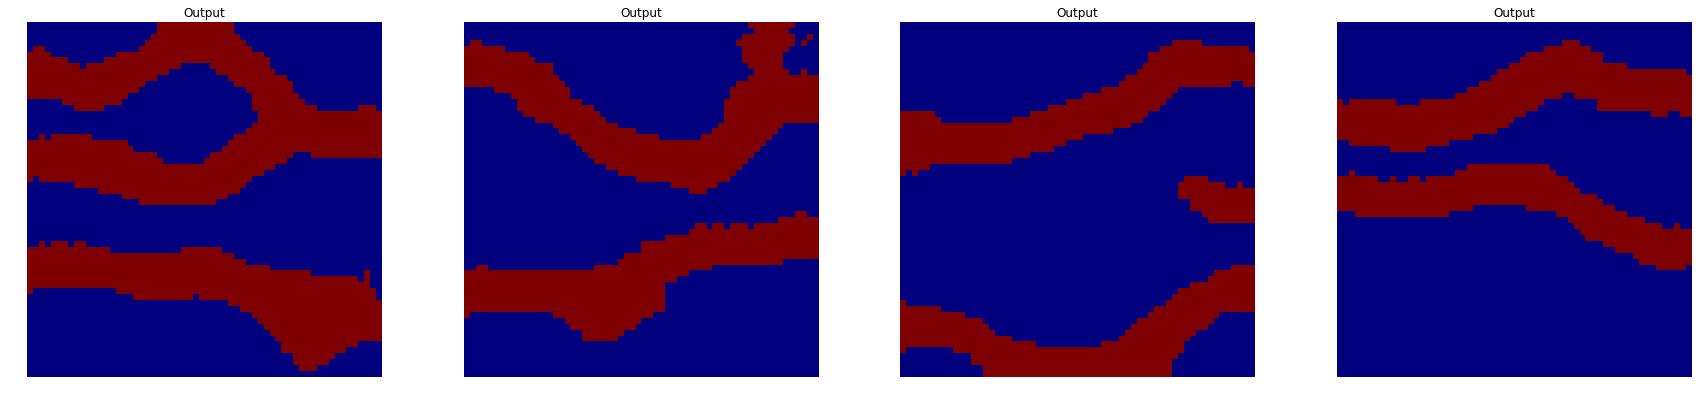

Saving check point ...
Iteration:  20000   D loss:  -571.1625   G loss:  -83597.66   Accuracy:  0.9542014
Saving check point ...
Iteration:  25000   D loss:  -348.10907   G loss:  -72827.34   Accuracy:  0.947066
Random realizations ...


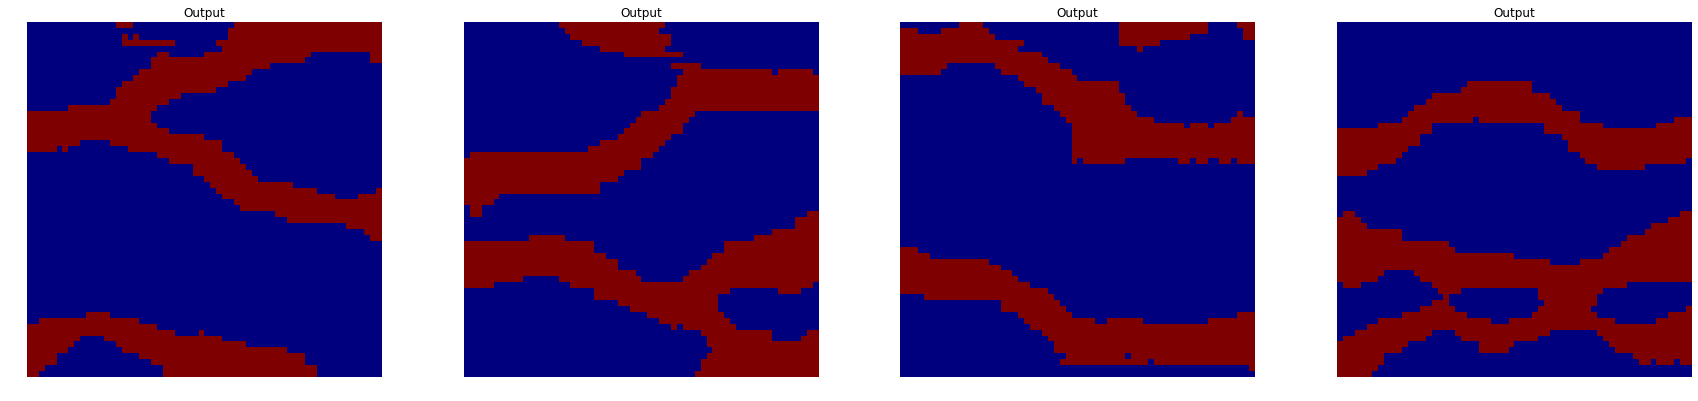

Saving check point ...
Iteration:  30000   D loss:  -270.5501   G loss:  -61170.91   Accuracy:  0.9467101
Iteration:  35000   D loss:  -288.8101   G loss:  -56979.08   Accuracy:  0.94695747
Random realizations ...


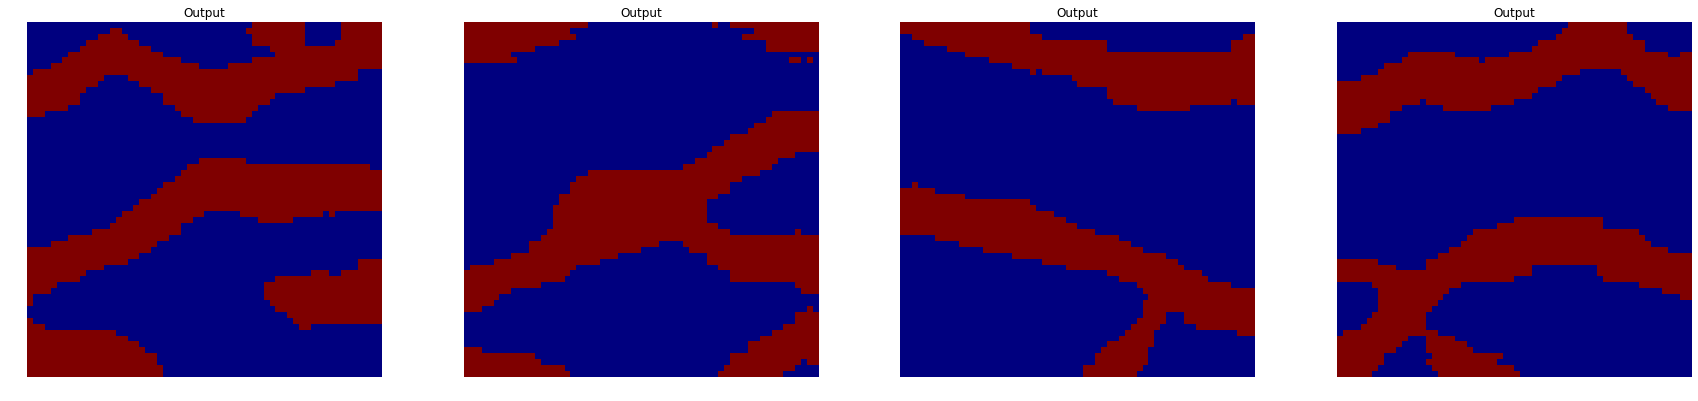

Iteration:  40000   D loss:  -299.21066   G loss:  -57615.91   Accuracy:  0.944132
Iteration:  45000   D loss:  -274.112   G loss:  -56275.566   Accuracy:  0.9346658
Random realizations ...


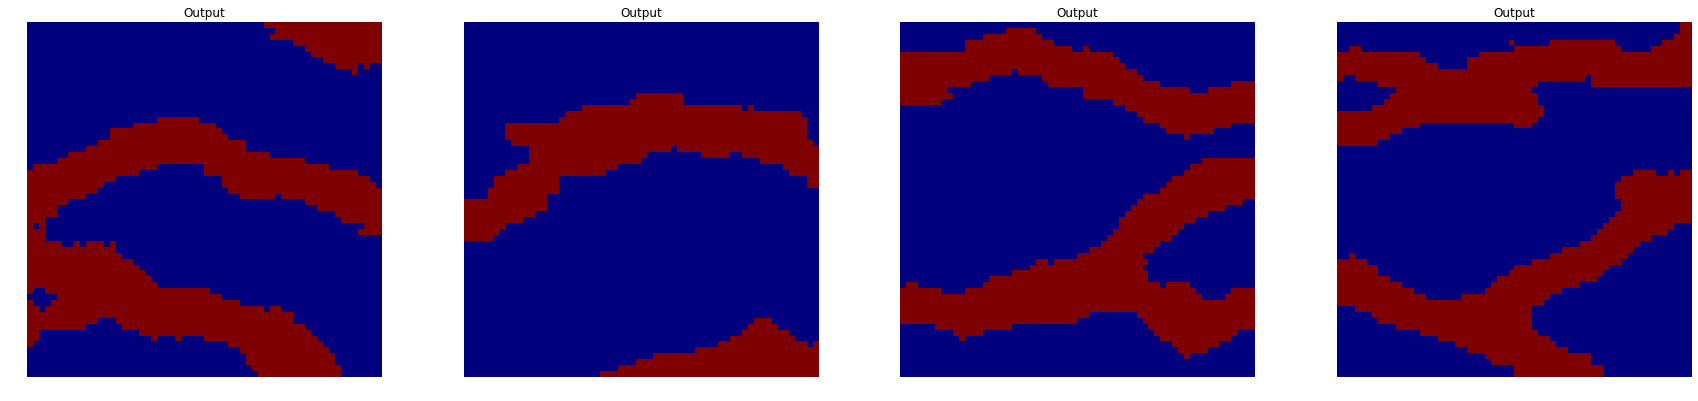

Saving check point ...
Iteration:  50000   D loss:  -250.80162   G loss:  -53275.723   Accuracy:  0.9445356
Saving check point ...
Iteration:  55000   D loss:  -238.67902   G loss:  -51114.855   Accuracy:  0.94030386
Random realizations ...


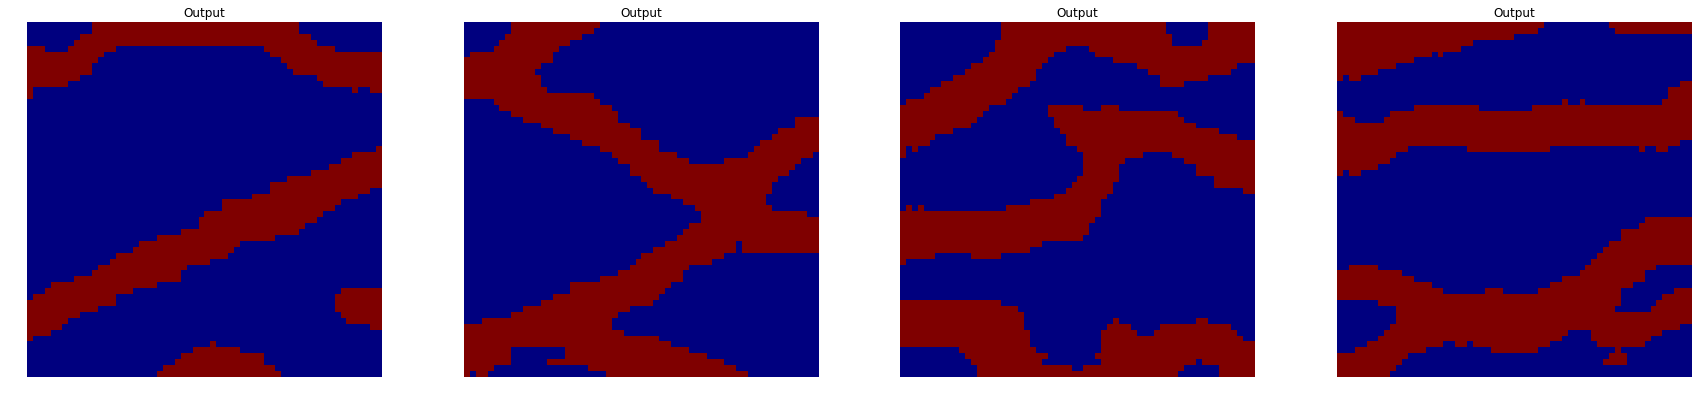

Saving check point ...
Iteration:  60000   D loss:  -229.22836   G loss:  -49867.77   Accuracy:  0.94287765
Saving check point ...
Iteration:  65000   D loss:  -218.12578   G loss:  -49029.3   Accuracy:  0.9260026
Random realizations ...


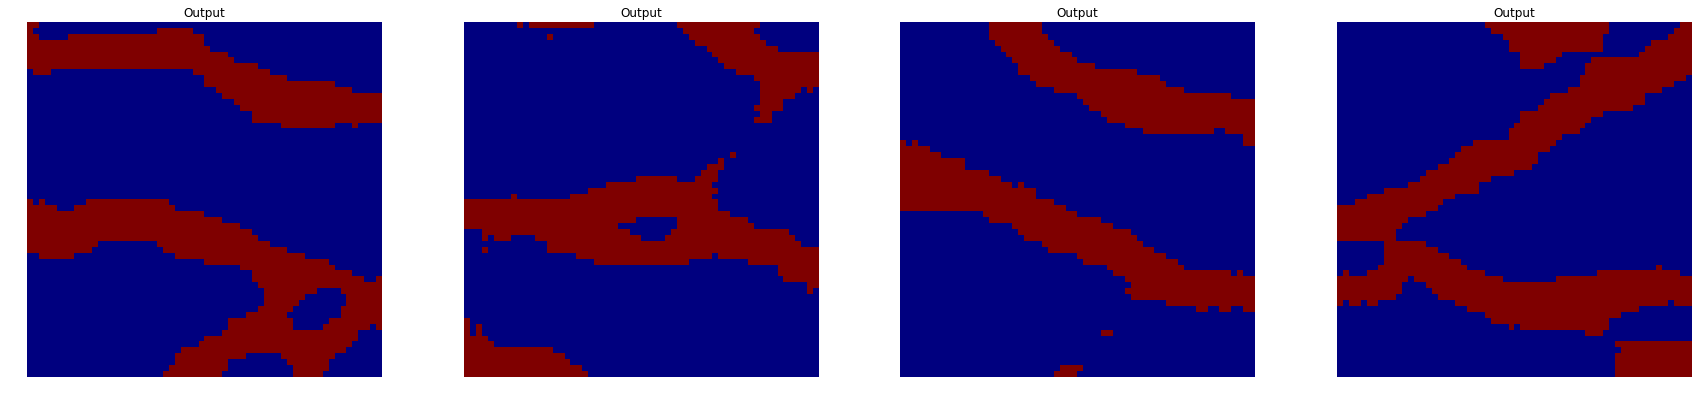

Saving check point ...
Iteration:  70000   D loss:  -214.56279   G loss:  -48068.684   Accuracy:  0.92711806
Saving check point ...
Iteration:  75000   D loss:  -210.67323   G loss:  -47270.645   Accuracy:  0.9156814
Random realizations ...


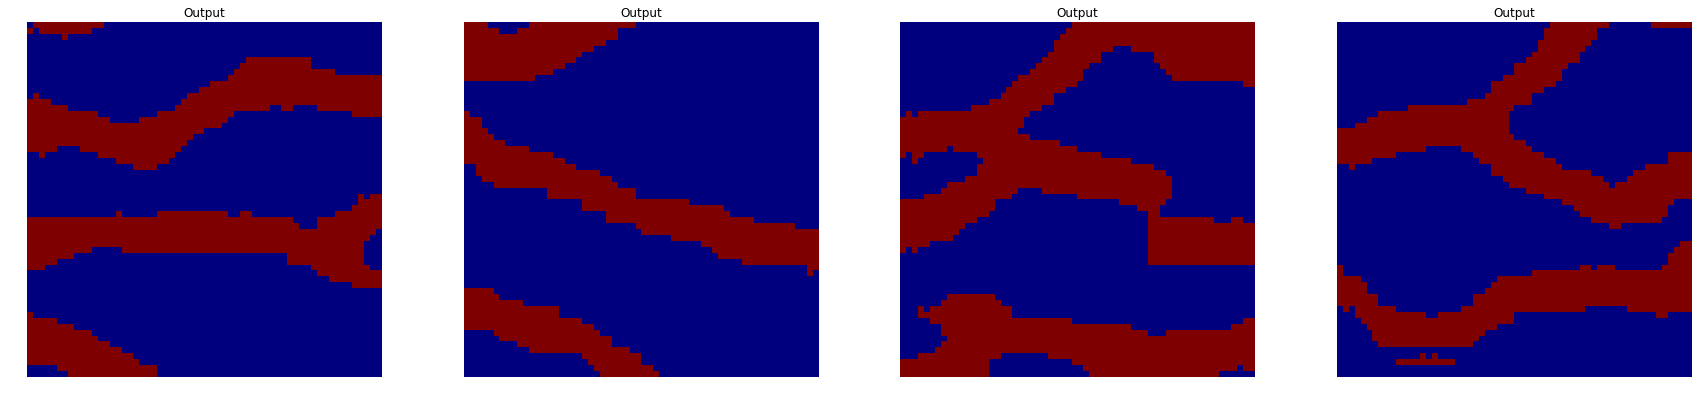

Saving check point ...
Iteration:  80000   D loss:  -209.59572   G loss:  -47599.965   Accuracy:  0.91877604
Saving check point ...
Iteration:  85000   D loss:  -208.55418   G loss:  -47623.16   Accuracy:  0.92481774
Random realizations ...


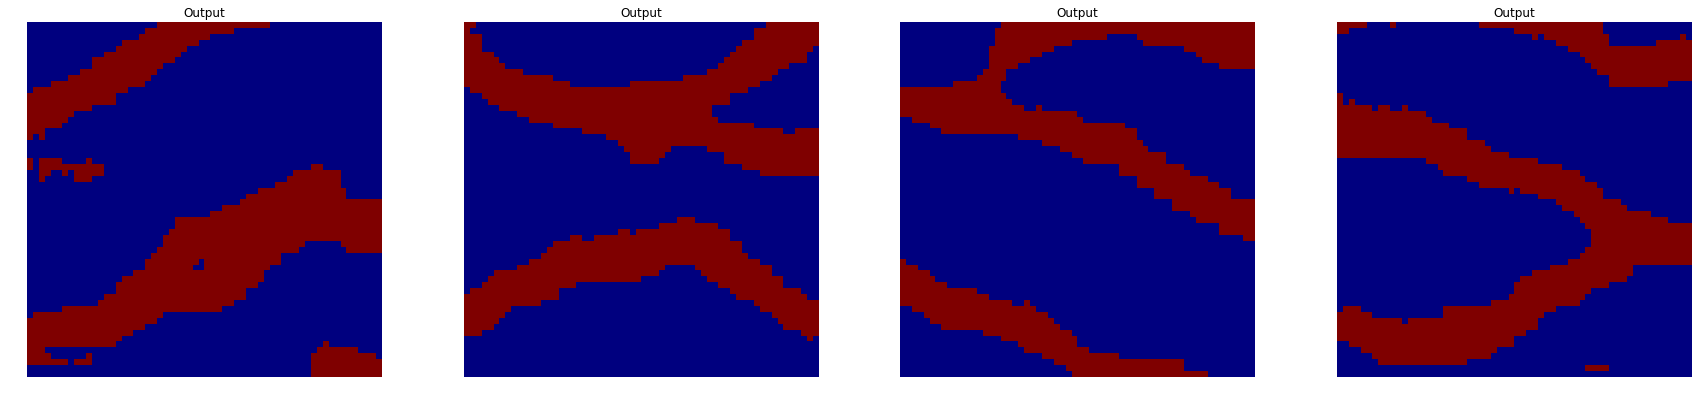

Saving check point ...
Iteration:  90000   D loss:  -203.89053   G loss:  -47168.152   Accuracy:  0.9297613
Saving check point ...
Iteration:  95000   D loss:  -201.38383   G loss:  -46982.188   Accuracy:  0.93327695
Random realizations ...


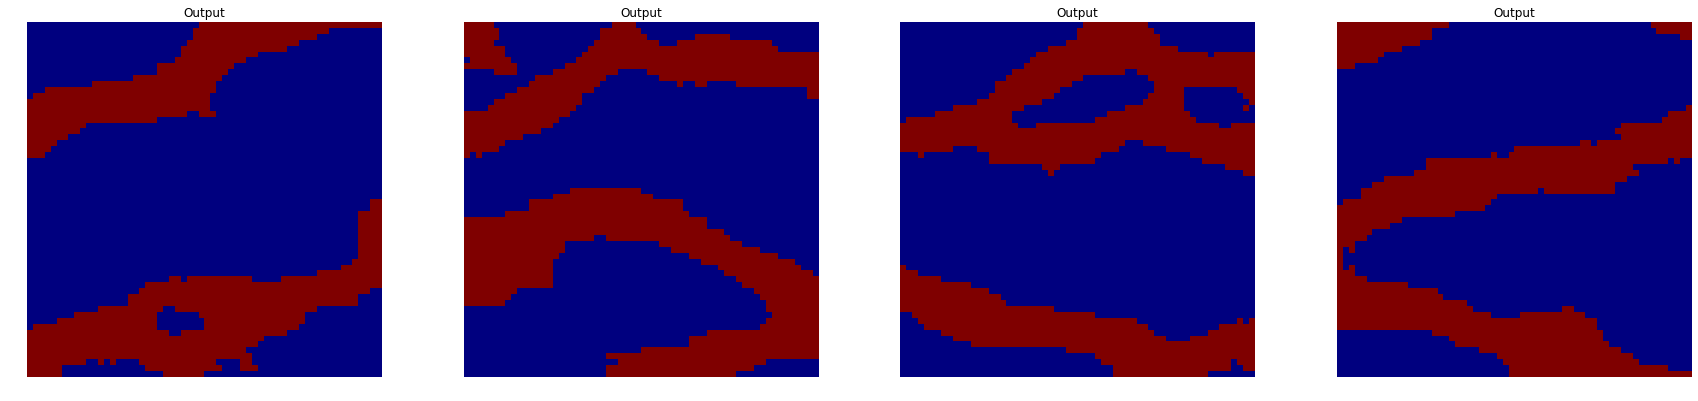

Saving check point ...
Iteration:  100000   D loss:  -199.79926   G loss:  -46153.78   Accuracy:  0.9338064
Iteration:  105000   D loss:  -201.5309   G loss:  -46070.445   Accuracy:  0.9351563
Random realizations ...


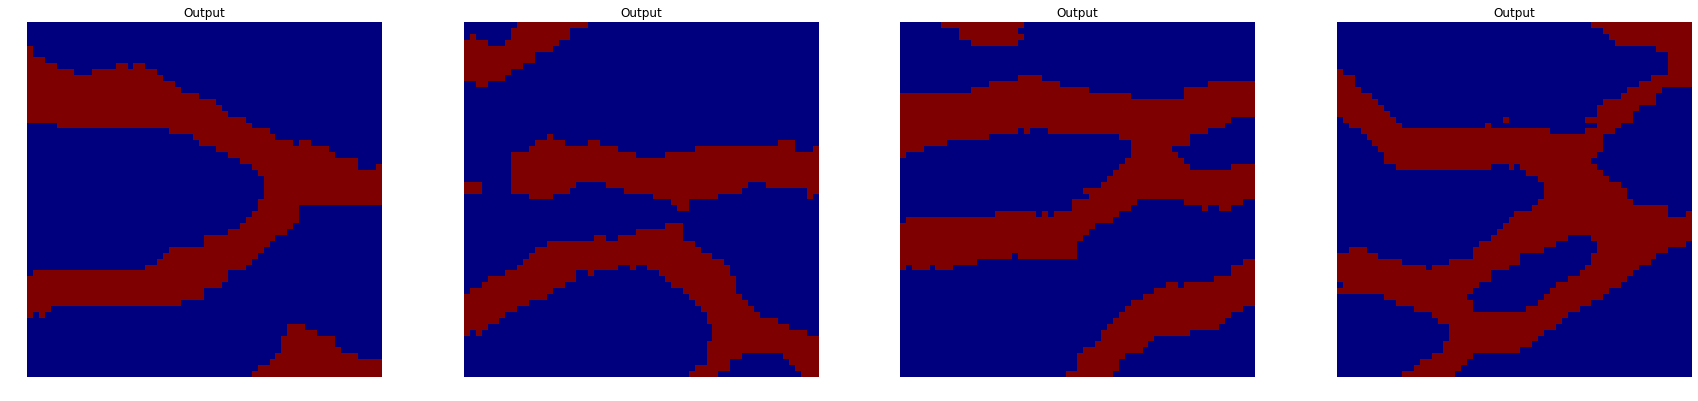

Iteration:  110000   D loss:  -212.6901   G loss:  -47272.79   Accuracy:  0.9125521
Iteration:  115000   D loss:  -222.92235   G loss:  -48266.453   Accuracy:  0.9277344
Random realizations ...


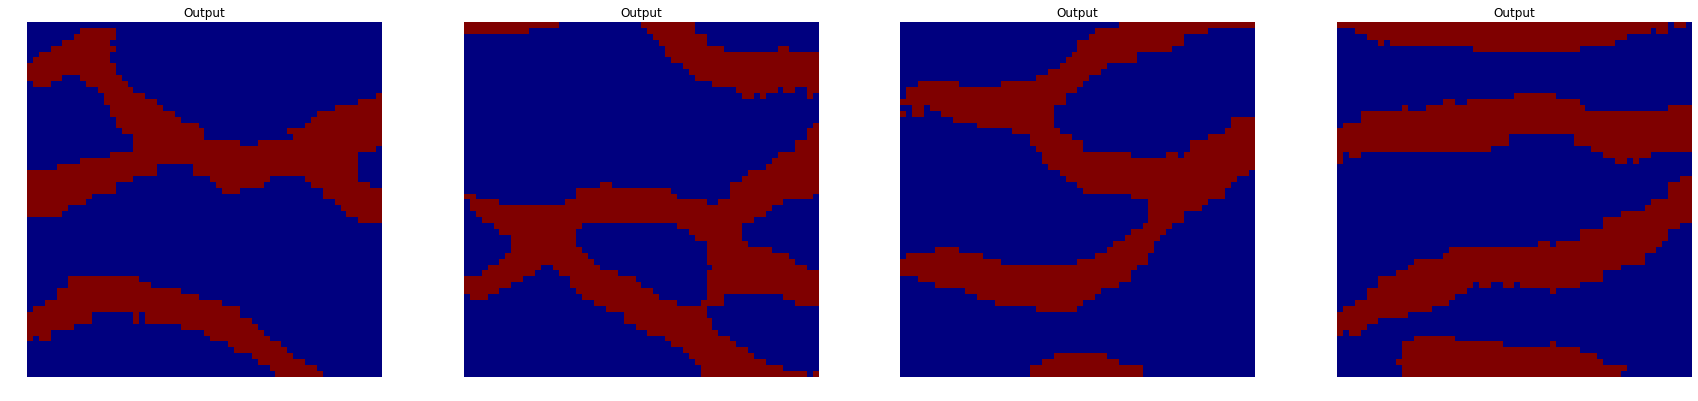

Iteration:  120000   D loss:  -227.49533   G loss:  -49292.453   Accuracy:  0.91656685
Iteration:  125000   D loss:  -229.03618   G loss:  -49521.12   Accuracy:  0.9280556
Restauring best Discriminator and Generator Models ...
Initializing encoder variables ...
Starting Encoder training ...
epoch 1 E loss -> 195.6154 Acc -> 0.8686731
epoch 2 E loss -> 154.68318 Acc -> 0.8943131
epoch 3 E loss -> 144.08473 Acc -> 0.90084547
epoch 4 E loss -> 141.03867 Acc -> 0.90270054
epoch 5 E loss -> 125.74661 Acc -> 0.9122288
epoch 6 E loss -> 119.38647 Acc -> 0.9161716
epoch 7 E loss -> 116.424065 Acc -> 0.91796386
epoch 8 E loss -> 113.24667 Acc -> 0.9199714
epoch 9 E loss -> 108.459175 Acc -> 0.92284864
epoch 10 E loss -> 104.689125 Acc -> 0.925134
epoch 11 E loss -> 103.75935 Acc -> 0.9257671
epoch 12 E loss -> 101.700935 Acc -> 0.9270052
epoch 13 E loss -> 99.67333 Acc -> 0.9283615
epoch 14 E loss -> 98.62349 Acc -> 0.9290125
epoch 15 E loss -> 98.354324 Acc -> 0.92905354
epoch 16 E loss -> 96.

epoch 174 E loss -> 68.00245 Acc -> 0.9481314
epoch 175 E loss -> 67.92168 Acc -> 0.94792855
epoch 176 E loss -> 68.1339 Acc -> 0.9478872
epoch 177 E loss -> 68.34016 Acc -> 0.94785625
epoch 178 E loss -> 69.52402 Acc -> 0.946868
epoch 179 E loss -> 67.58767 Acc -> 0.9482048
epoch 180 E loss -> 67.99594 Acc -> 0.9480417
epoch 181 E loss -> 68.31411 Acc -> 0.9478195
epoch 182 E loss -> 69.12256 Acc -> 0.9472476
epoch 183 E loss -> 67.68059 Acc -> 0.94818
epoch 184 E loss -> 67.752365 Acc -> 0.94818497
epoch 185 E loss -> 67.533516 Acc -> 0.94830567
epoch 186 E loss -> 67.250046 Acc -> 0.94854087
epoch 187 E loss -> 70.26966 Acc -> 0.9465249
epoch 188 E loss -> 67.876465 Acc -> 0.94809663
epoch 189 E loss -> 68.04125 Acc -> 0.94792074
epoch 190 E loss -> 67.900795 Acc -> 0.9480802
epoch 191 E loss -> 67.36295 Acc -> 0.94840515
epoch 192 E loss -> 68.133736 Acc -> 0.94802666
epoch 193 E loss -> 67.31221 Acc -> 0.94852316
epoch 194 E loss -> 67.549835 Acc -> 0.9483643
epoch 195 E loss -> 6

In [ ]:
model = WGAN2D_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns))
model.train(x_train , epochs=num_epochs)

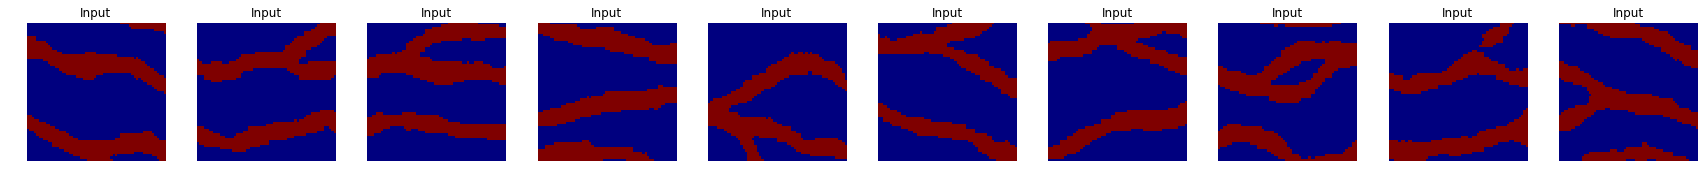

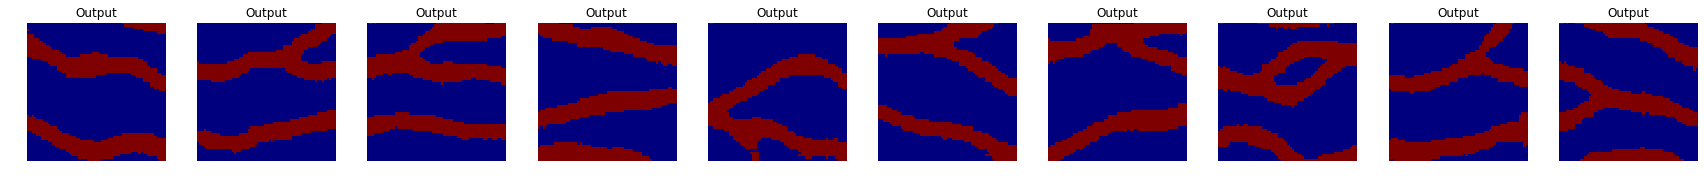

In [ ]:
PlotDataAE(np.argmax(x_train[:20], axis=-1), model.Decoder(x_train[:20], True), digit_size=(n_rows, n_cols), Only_Result=True)

## 3. AlphaGAN_MPS Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gan_g_input (InputLayer)     (None, 500)               0         
_________________________________________________________________
gan_g_dense (Dense)          (None, 16384)             8208384   
_________________________________________________________________
gan_g_reshape (Reshape)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_bn_dense (BatchNormali (None, 8, 8, 256)         1024      
_________________________________________________________________
gan_g_relu (Activation)      (None, 8, 8, 256)         0         
_________________________________________________________________
gan_g_1_deconv2D (Conv2DTran (None, 16, 16, 128)       524416    
_________________________________________________________________
gan_g_1_bn (BatchNormalizati (None, 16, 16, 128)       512       
__________

Initializing GANs models variables ...
Starting GANs training ...


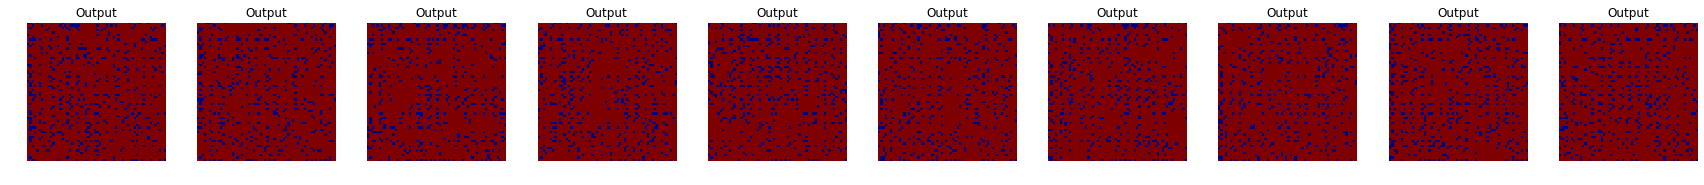

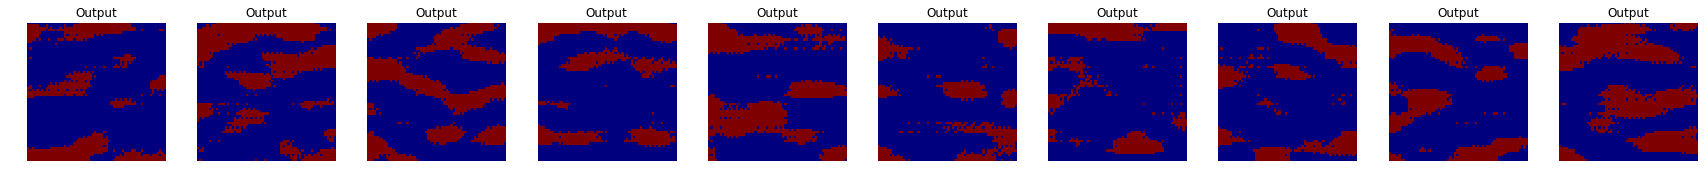

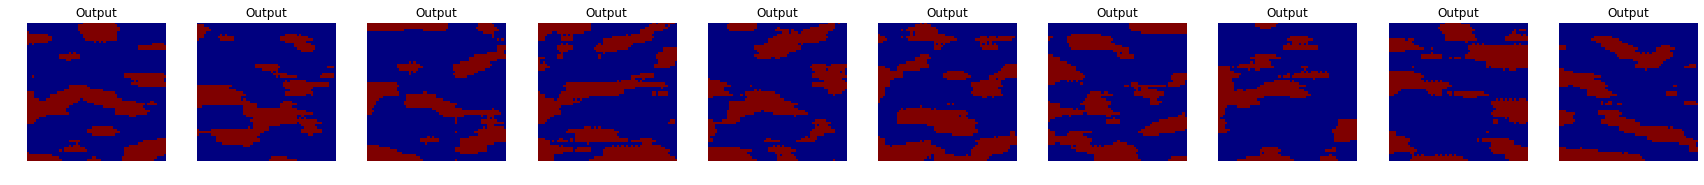

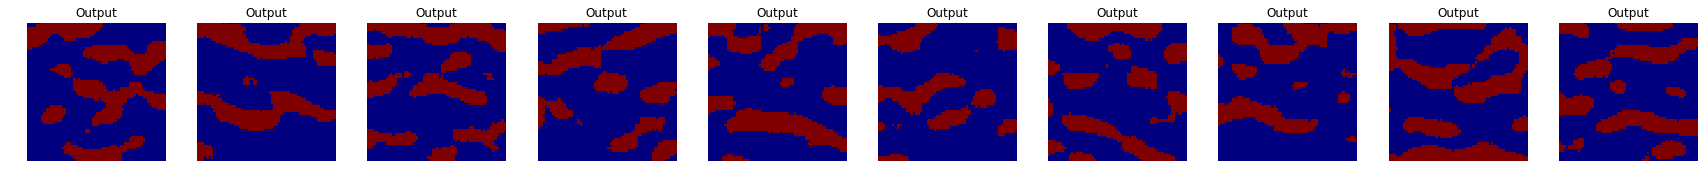

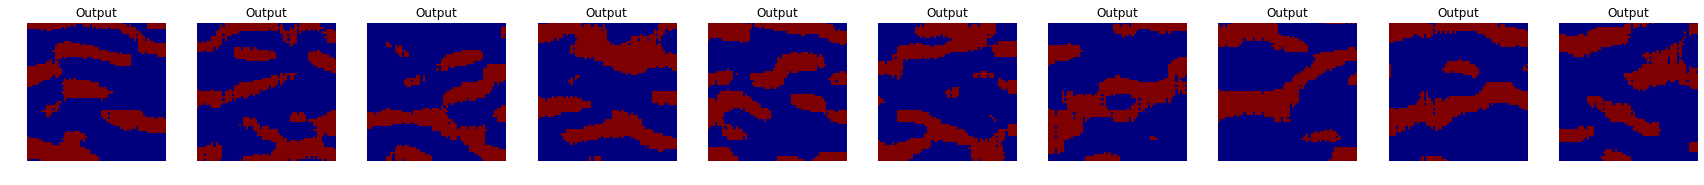

Epoch -> 1 E loss ->  23.885109 G loss ->  25.014671 D loss ->  1.1442564 C loss ->  0.6919831
Random realizations ...


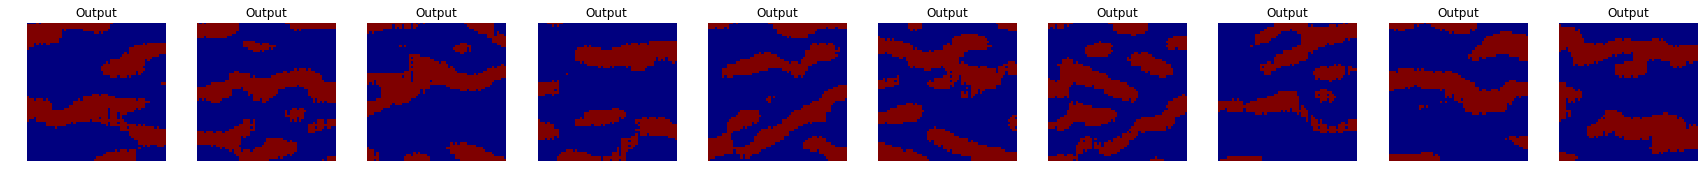

Acc --> 0.9438598


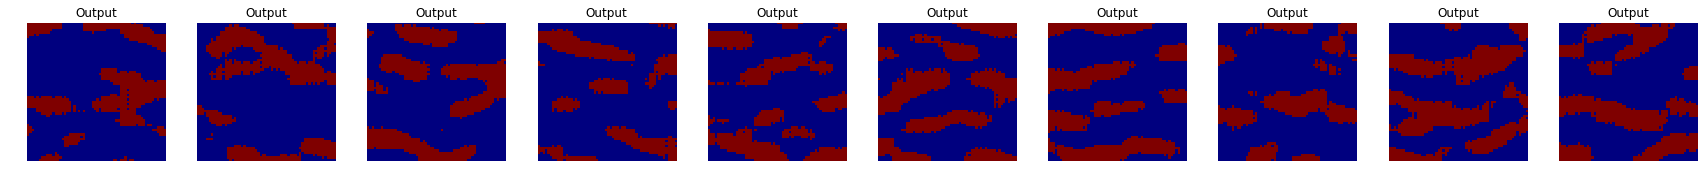

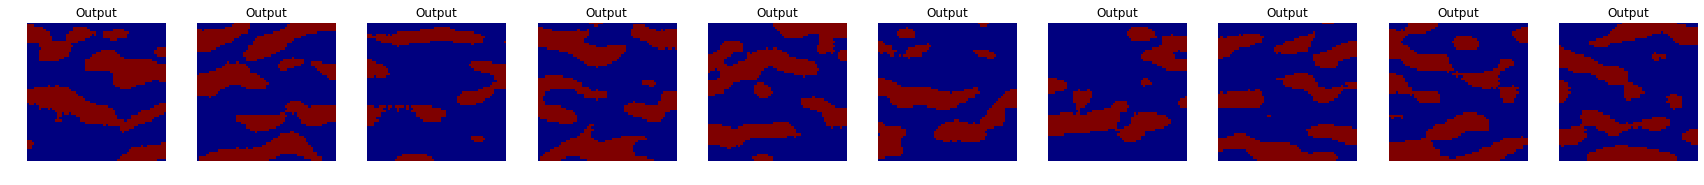

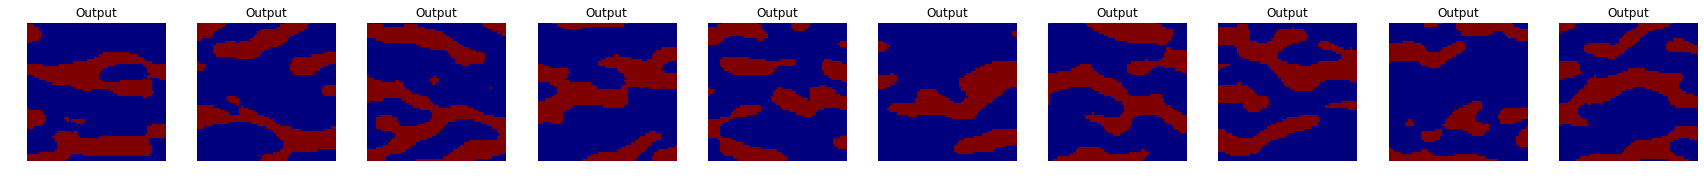

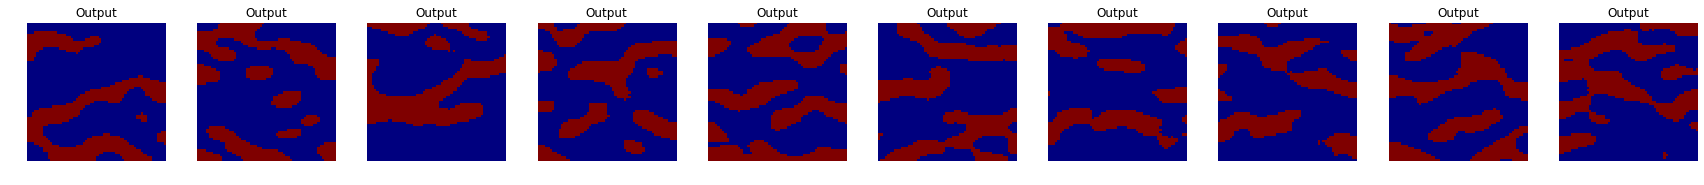

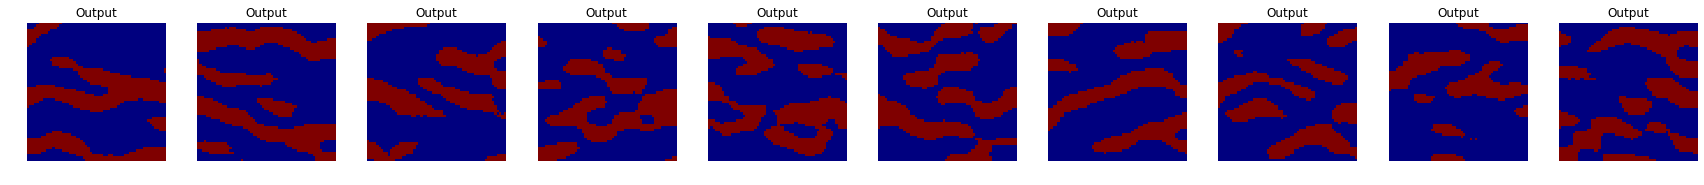

Epoch -> 2 E loss ->  15.837457 G loss ->  15.186861 D loss ->  1.1424143 C loss ->  0.6986167
Acc --> 0.9524202
Epoch -> 3 E loss ->  14.153793 G loss ->  12.105001 D loss ->  1.368482 C loss ->  0.6081287
Random realizations ...


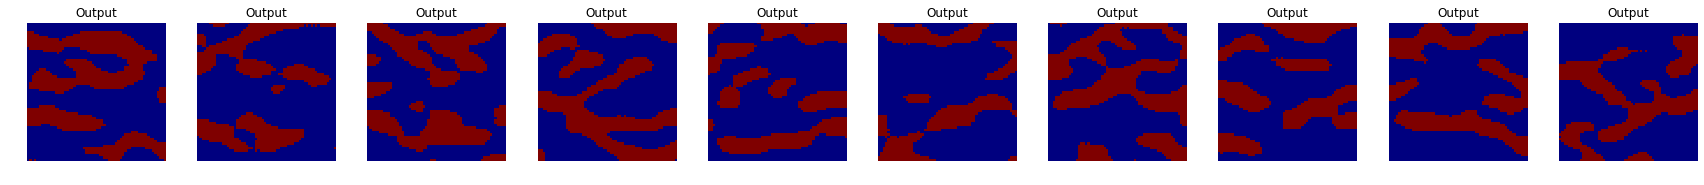

Acc --> 0.9562315
Epoch -> 4 E loss ->  13.568814 G loss ->  11.260179 D loss ->  1.4593594 C loss ->  0.62319404
Acc --> 0.96007717
Epoch -> 5 E loss ->  13.135558 G loss ->  11.123298 D loss ->  1.323494 C loss ->  0.67864007
Random realizations ...


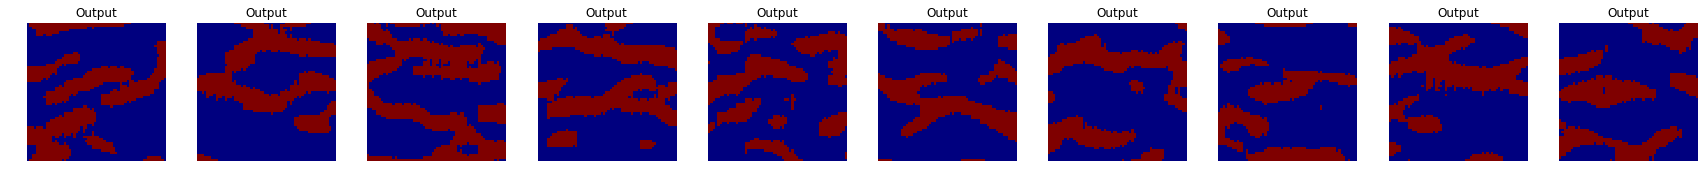

Acc --> 0.95739996
Epoch -> 6 E loss ->  13.3721695 G loss ->  12.06566 D loss ->  1.234123 C loss ->  0.7708055
Acc --> 0.9593526
Epoch -> 7 E loss ->  13.63441 G loss ->  13.315377 D loss ->  0.936696 C loss ->  0.8364935
Random realizations ...


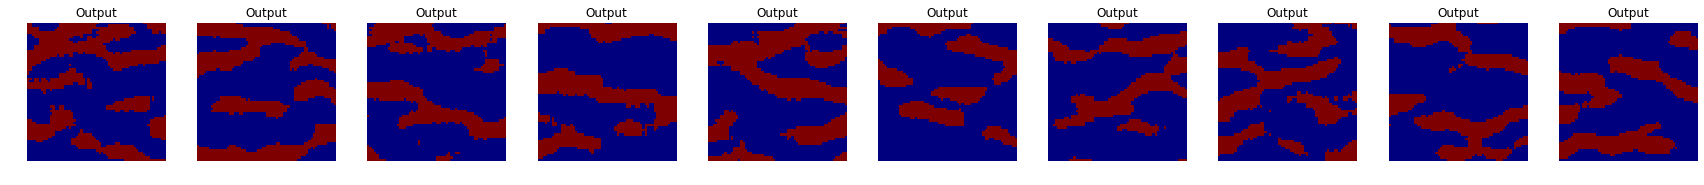

Acc --> 0.95455825
Epoch -> 8 E loss ->  14.019386 G loss ->  14.37958 D loss ->  0.94058764 C loss ->  0.86395884
Acc --> 0.9575991
Epoch -> 9 E loss ->  14.254972 G loss ->  14.558651 D loss ->  0.9035667 C loss ->  0.8285131
Random realizations ...


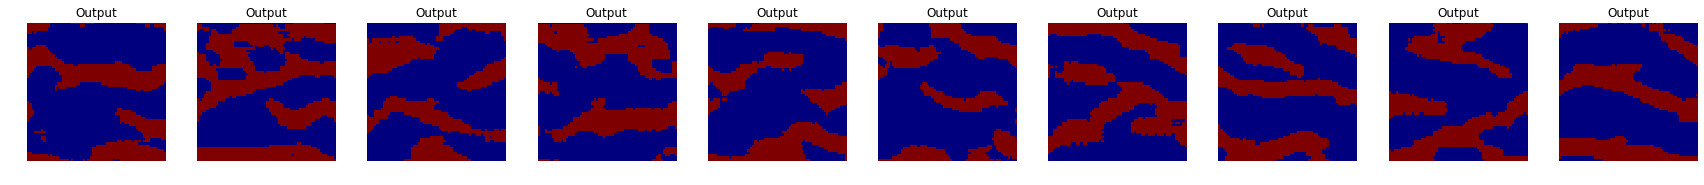

Acc --> 0.95496637
Epoch -> 10 E loss ->  14.067712 G loss ->  14.340158 D loss ->  1.0345647 C loss ->  0.83153963
Acc --> 0.9518356
Epoch -> 11 E loss ->  13.0629015 G loss ->  10.904672 D loss ->  3.28287 C loss ->  0.84050024
Random realizations ...


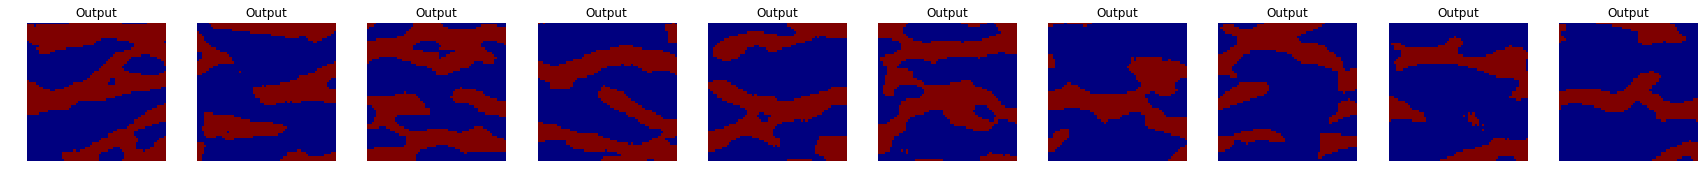

Acc --> 0.9608968


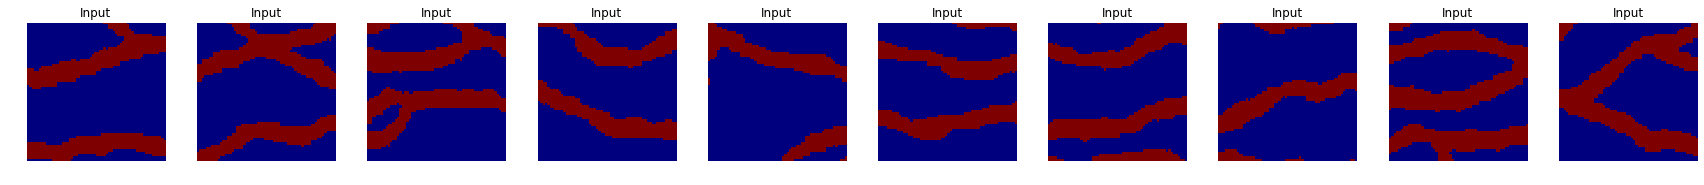

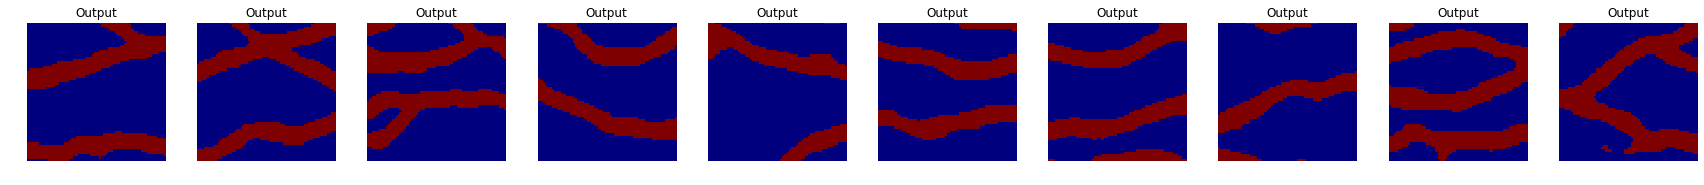

Epoch -> 12 E loss ->  12.298312 G loss ->  9.724297 D loss ->  1.720594 C loss ->  0.9170408
Acc --> 0.961329


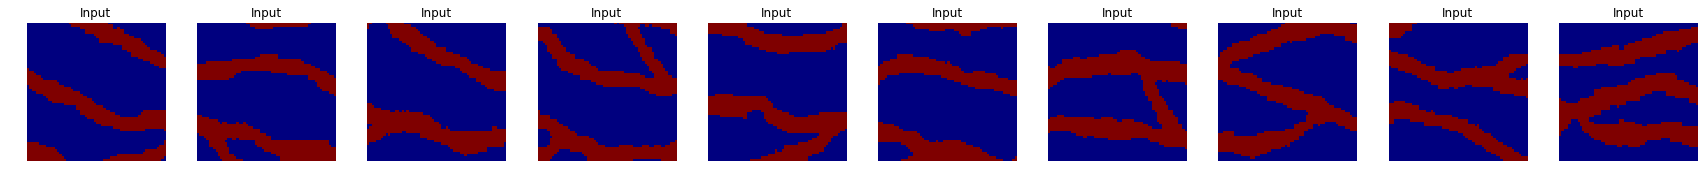

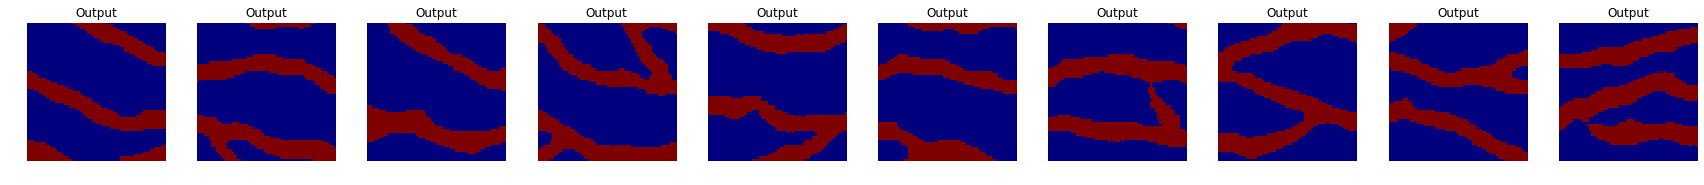

Epoch -> 13 E loss ->  11.79532 G loss ->  9.769423 D loss ->  1.6908417 C loss ->  0.9212642
Random realizations ...


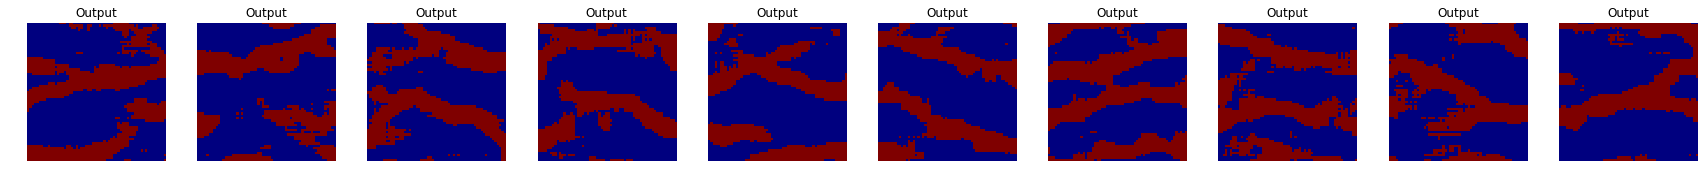

Acc --> 0.9628323


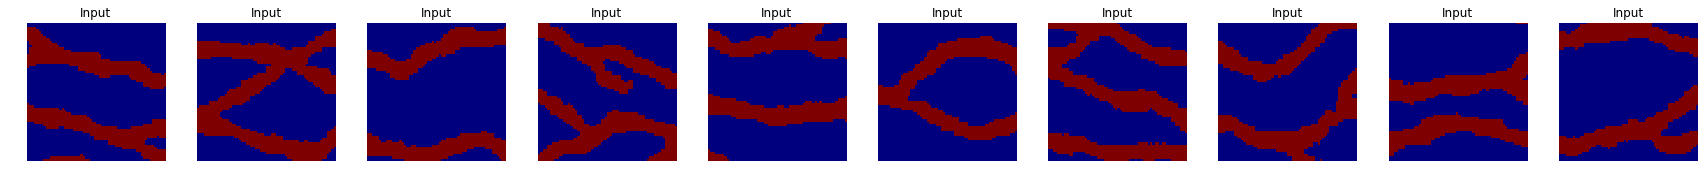

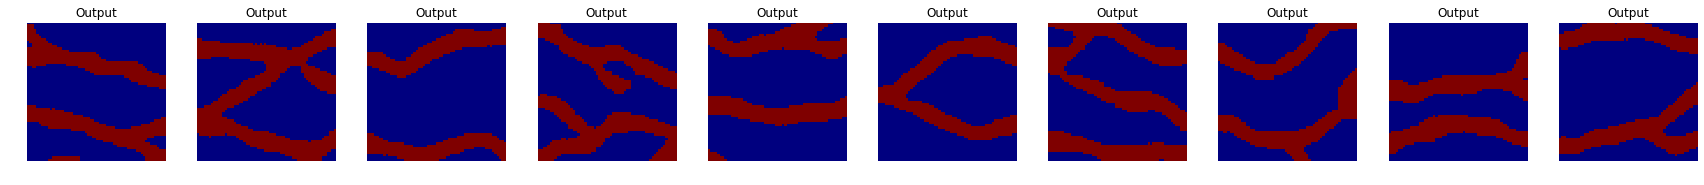

Epoch -> 14 E loss ->  11.674986 G loss ->  9.835443 D loss ->  1.6924064 C loss ->  0.9672056
Acc --> 0.9630426


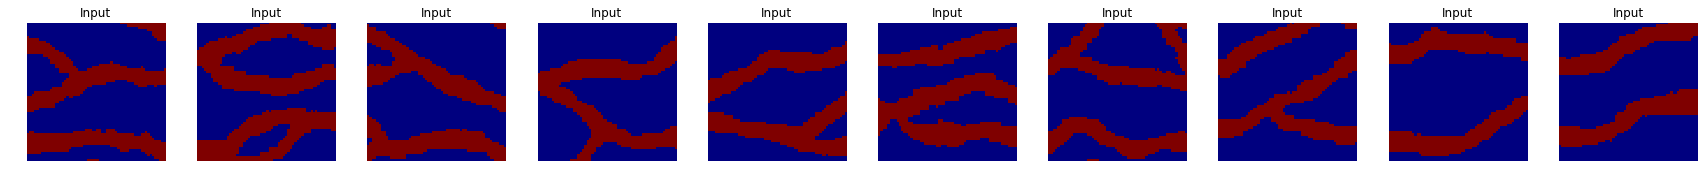

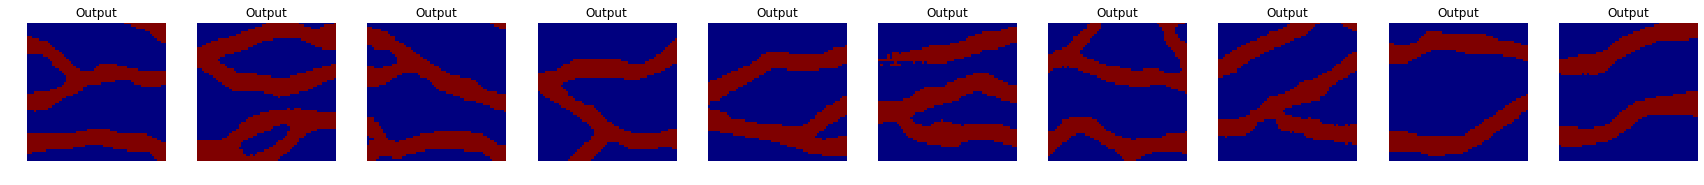

Epoch -> 15 E loss ->  11.179603 G loss ->  9.6737585 D loss ->  1.6721531 C loss ->  0.99881285
Random realizations ...


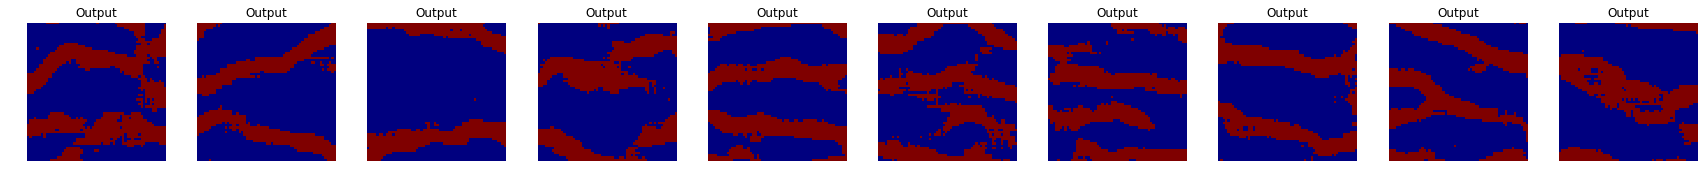

Acc --> 0.9650298


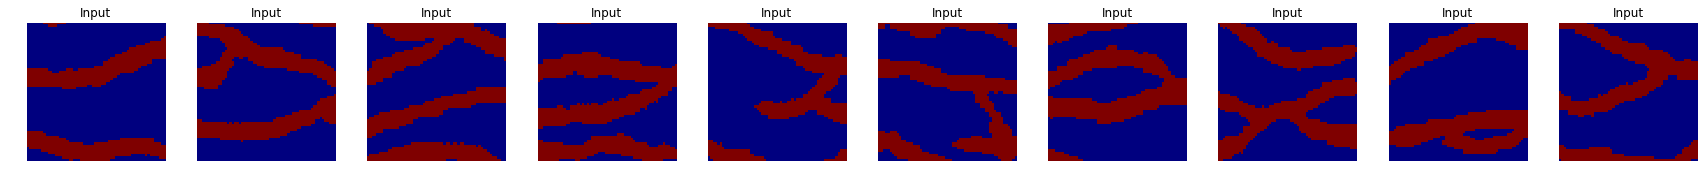

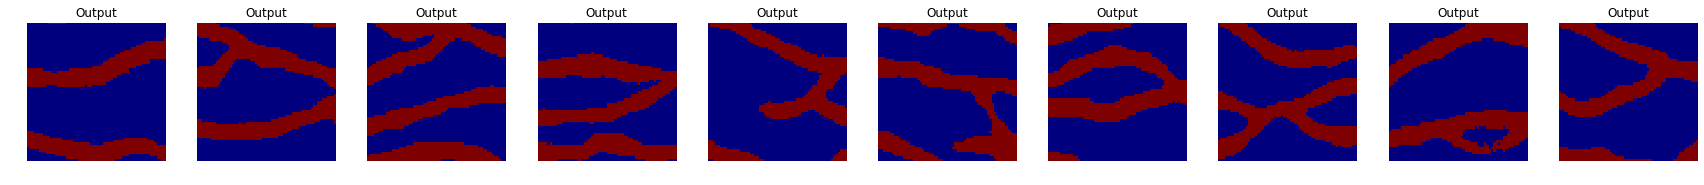

Epoch -> 16 E loss ->  10.979488 G loss ->  9.863931 D loss ->  1.5885513 C loss ->  1.0049781
Acc --> 0.96374273
Epoch -> 17 E loss ->  11.331563 G loss ->  11.052128 D loss ->  1.4670563 C loss ->  0.94075286
Random realizations ...


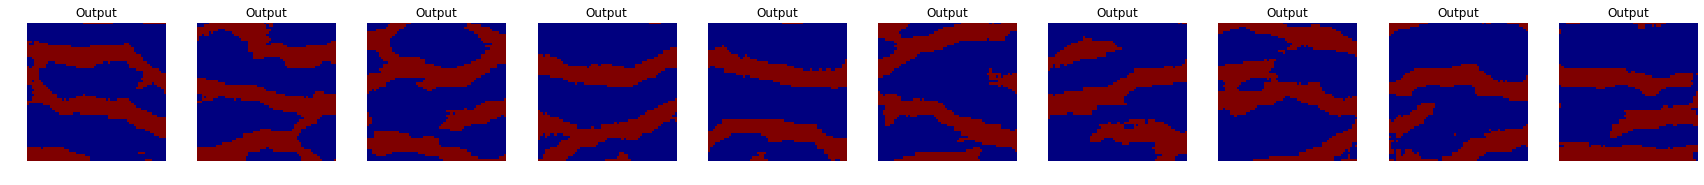

Acc --> 0.9615577
Epoch -> 18 E loss ->  11.707068 G loss ->  11.735616 D loss ->  1.4102165 C loss ->  0.954012
Acc --> 0.96162593
Epoch -> 19 E loss ->  11.940457 G loss ->  12.307766 D loss ->  1.364369 C loss ->  0.8932906
Random realizations ...


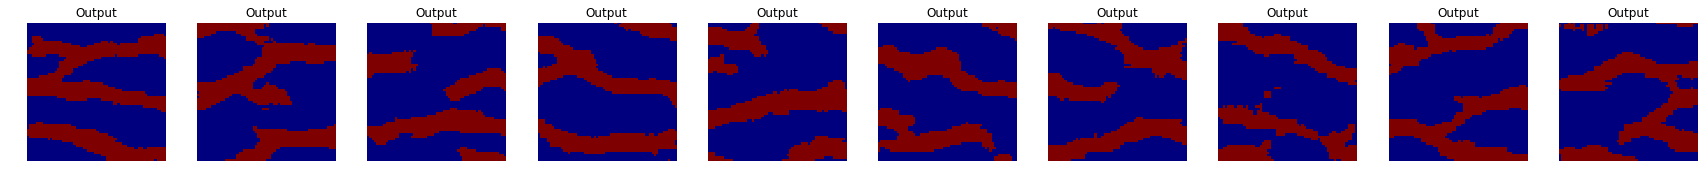

Acc --> 0.96128356
Epoch -> 20 E loss ->  12.206284 G loss ->  12.992906 D loss ->  1.286979 C loss ->  0.81751025
Acc --> 0.95575327
Epoch -> 21 E loss ->  12.658364 G loss ->  13.716301 D loss ->  1.273791 C loss ->  0.807413
Random realizations ...


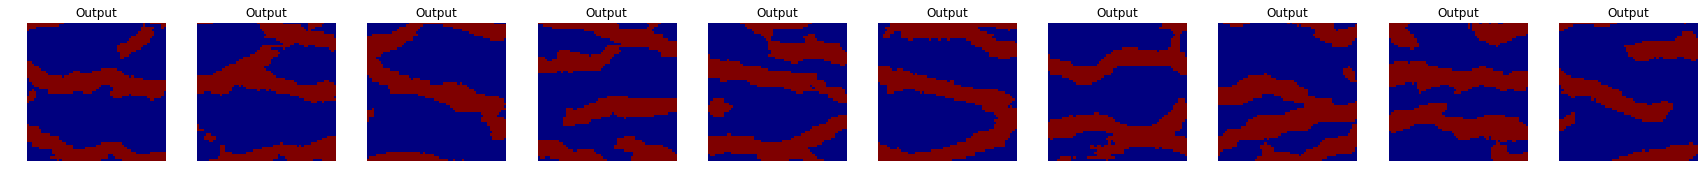

Acc --> 0.9574686
Epoch -> 22 E loss ->  12.583593 G loss ->  13.525843 D loss ->  1.2375202 C loss ->  0.8083138
Acc --> 0.9571346
Epoch -> 23 E loss ->  12.348243 G loss ->  13.445862 D loss ->  1.2874854 C loss ->  0.80808413
Random realizations ...


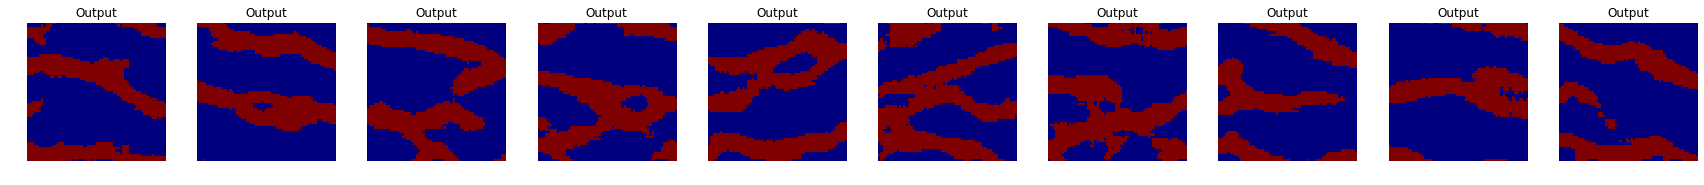

Acc --> 0.95589066
Epoch -> 24 E loss ->  13.003893 G loss ->  15.087361 D loss ->  1.0441009 C loss ->  0.78583074
Acc --> 0.95434314
Epoch -> 25 E loss ->  13.114869 G loss ->  15.576927 D loss ->  1.0124594 C loss ->  0.7686819
Random realizations ...


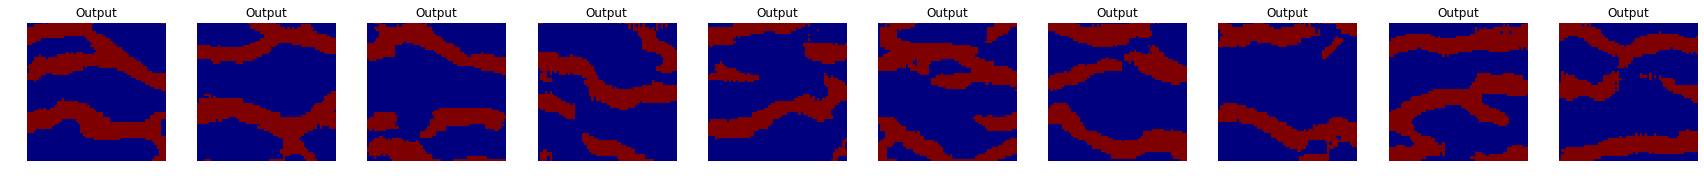

Acc --> 0.9546208


In [5]:
model = AlphaGAN_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns),alpha=100)
model.train(x_train , epochs=num_epochs, num_plots = 10)

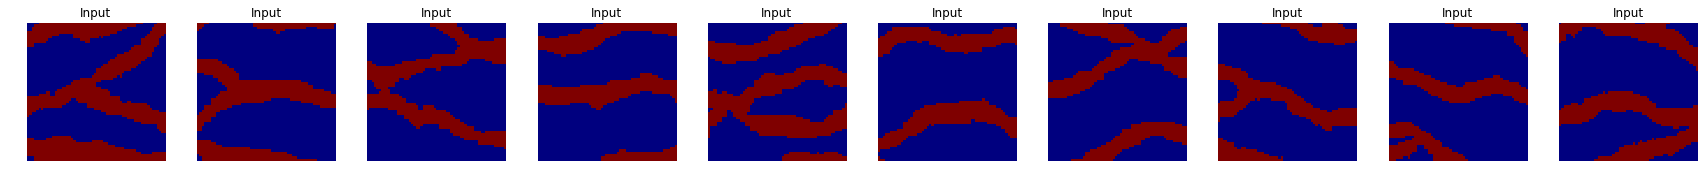

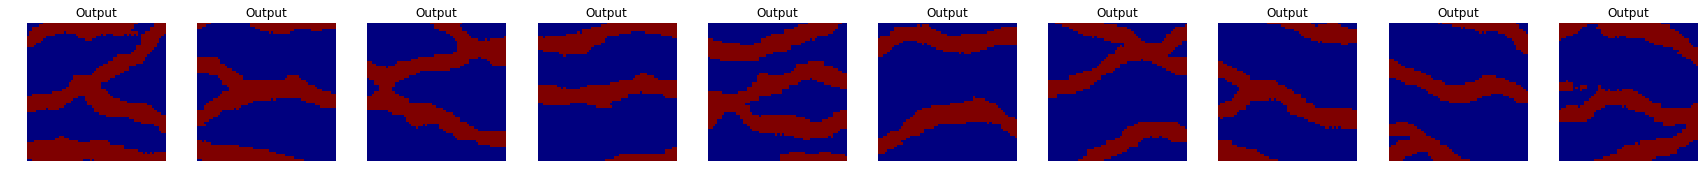

In [6]:
PlotDataAE(np.argmax(x_train[:20], axis=-1), model.Decoder(x_train[:20], True), digit_size=(n_rows, n_cols), Only_Result=True)

## 4.  CycleGAN Network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dis_pca_input (InputLayer)   (None, 60, 60, 1)         0         
_________________________________________________________________
dis_pca_1_conv2D (Conv2D)    (None, 30, 30, 32)        544       
_________________________________________________________________
dis_pca_1_leaky_relu (LeakyR (None, 30, 30, 32)        0         
_________________________________________________________________
dis_pca_2_conv2D (Conv2D)    (None, 15, 15, 64)        32832     
_________________________________________________________________
dis_pca_2_bn (BatchNormaliza (None, 15, 15, 64)        256       
_________________________________________________________________
dis_pca_2_leaky_relu (LeakyR (None, 15, 15, 64)        0         
_________________________________________________________________
dis_pca_3_conv2D (Conv2D)    (None, 8, 8, 128)         131200    
__________

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
gen_bin__input (InputLayer)     (None, 60, 60, 1)    0                                            
__________________________________________________________________________________________________
gen_bin_e1_conv2D (Conv2D)      (None, 60, 60, 32)   1600        gen_bin__input[0][0]             
__________________________________________________________________________________________________
gen_bin_e1_leaky_relu (LeakyReL (None, 60, 60, 32)   0           gen_bin_e1_conv2D[0][0]          
__________________________________________________________________________________________________
gen_bin_e2_conv2D (Conv2D)      (None, 30, 30, 64)   32832       gen_bin_e1_leaky_relu[0][0]      
__________________________________________________________________________________________________
gen_bin_e2

Building pca model ...


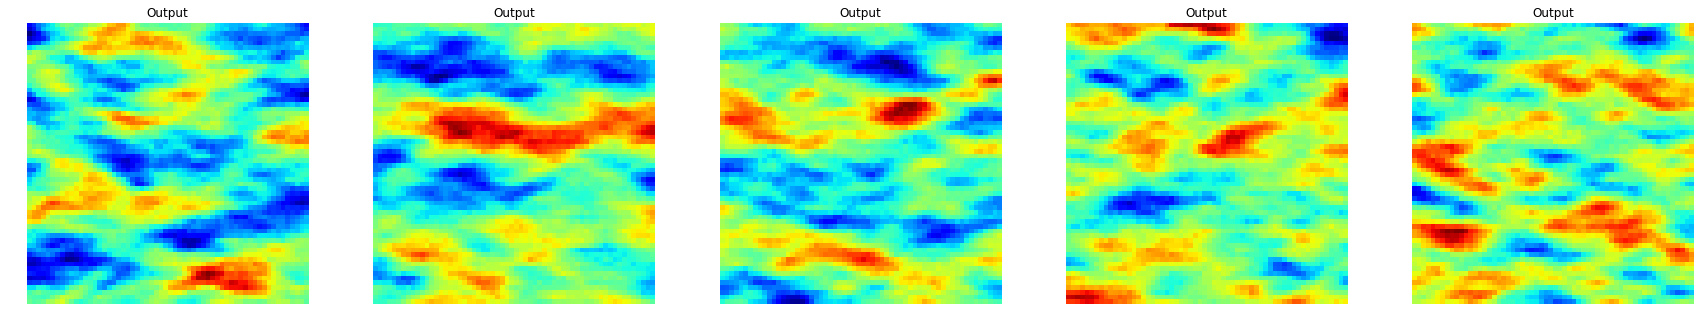

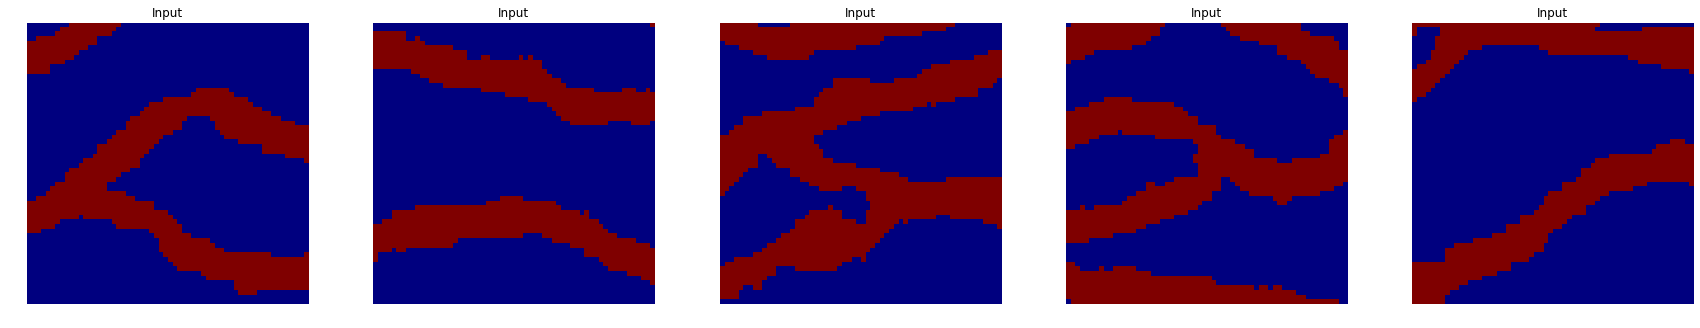

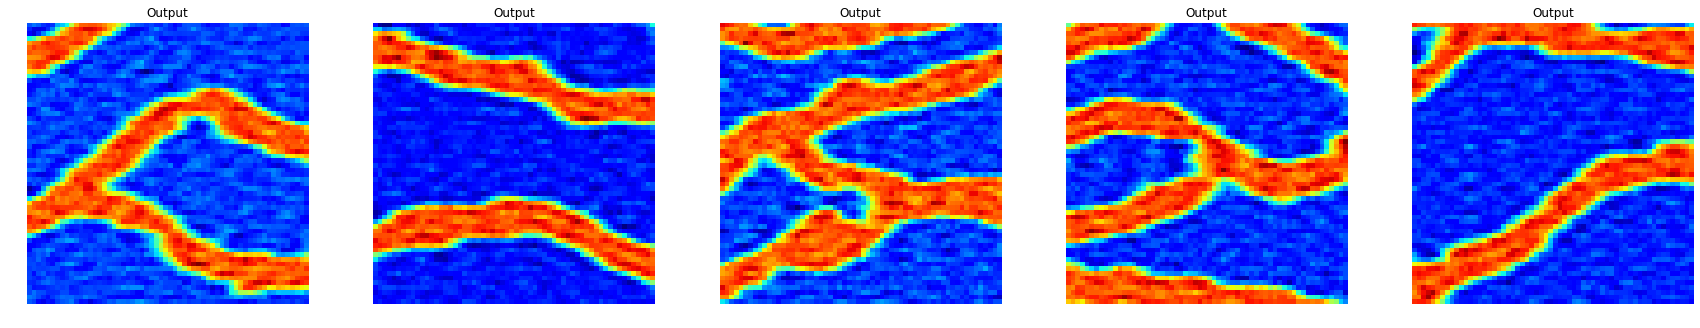

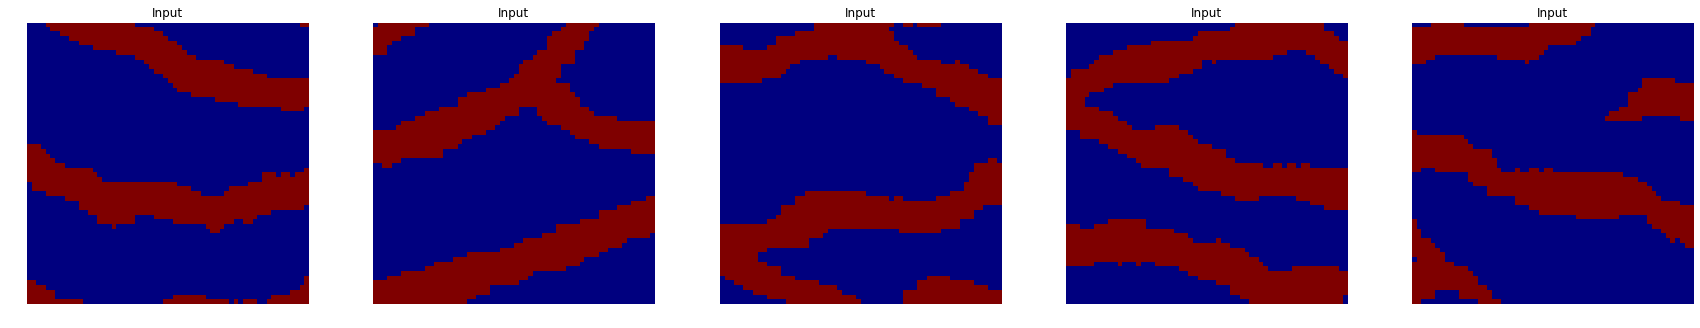

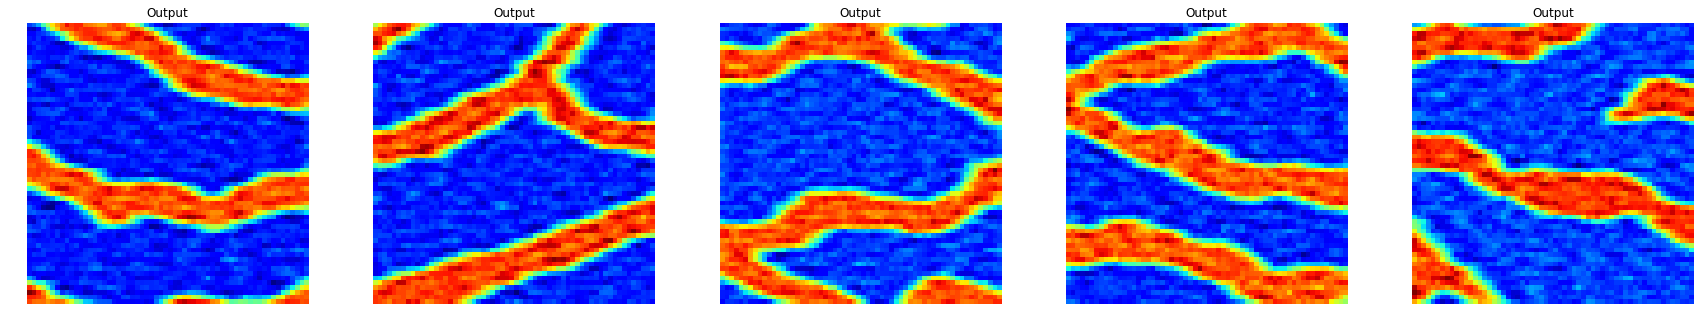

Initializing GANs models variables ...
Starting GANs training ...


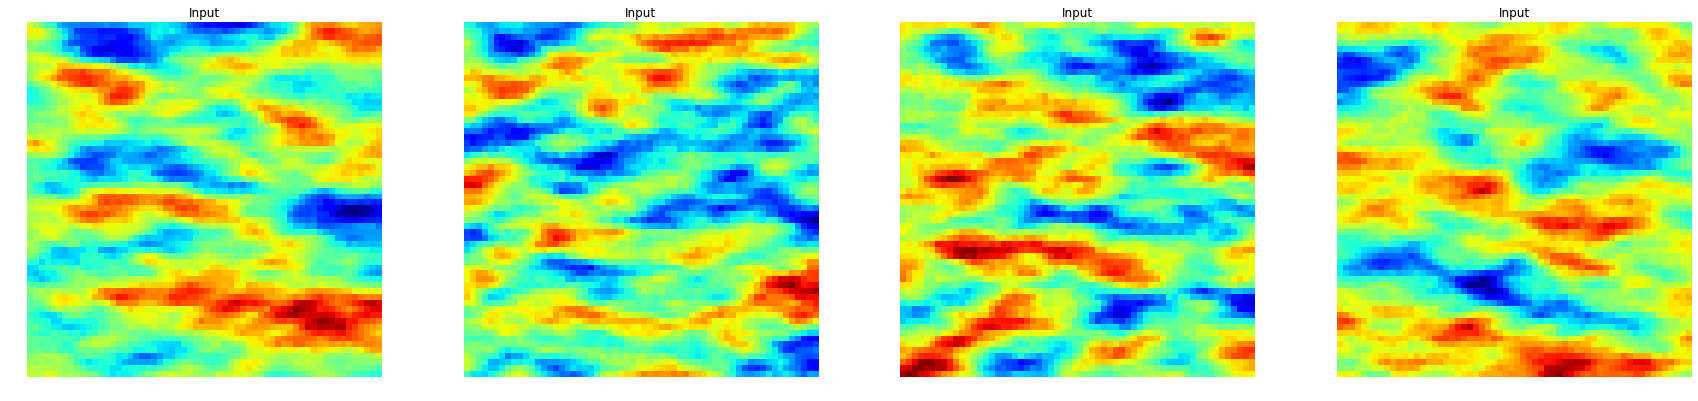

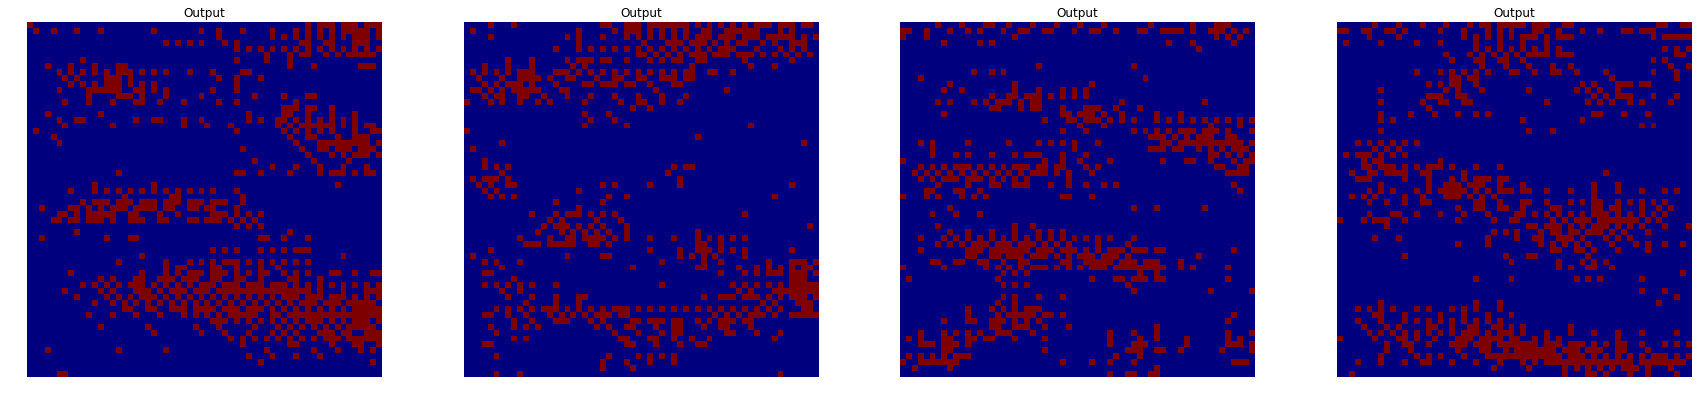

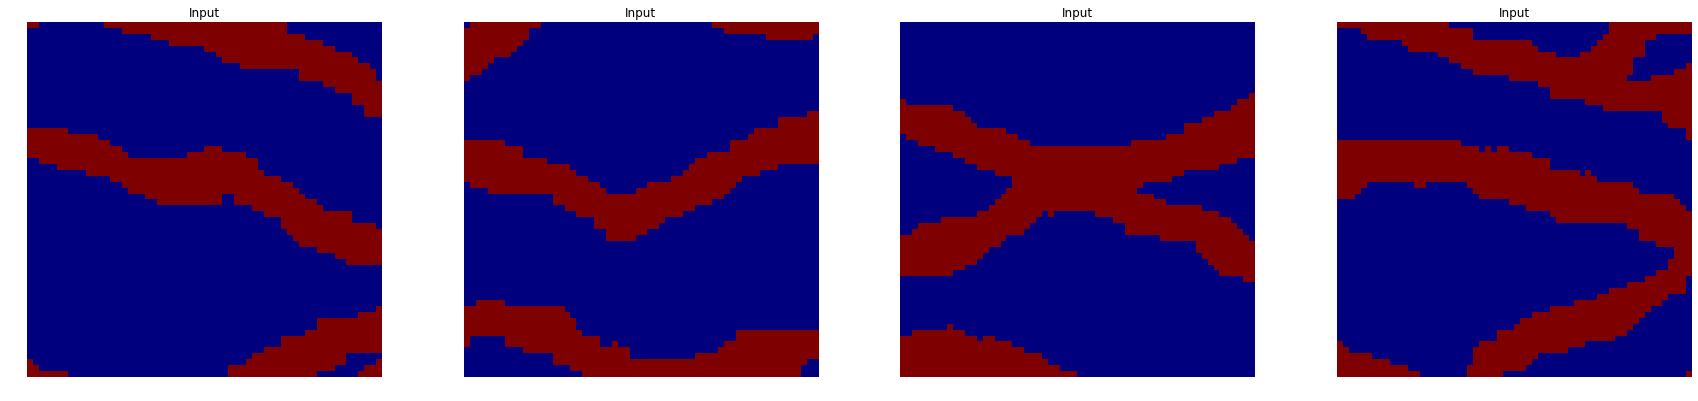

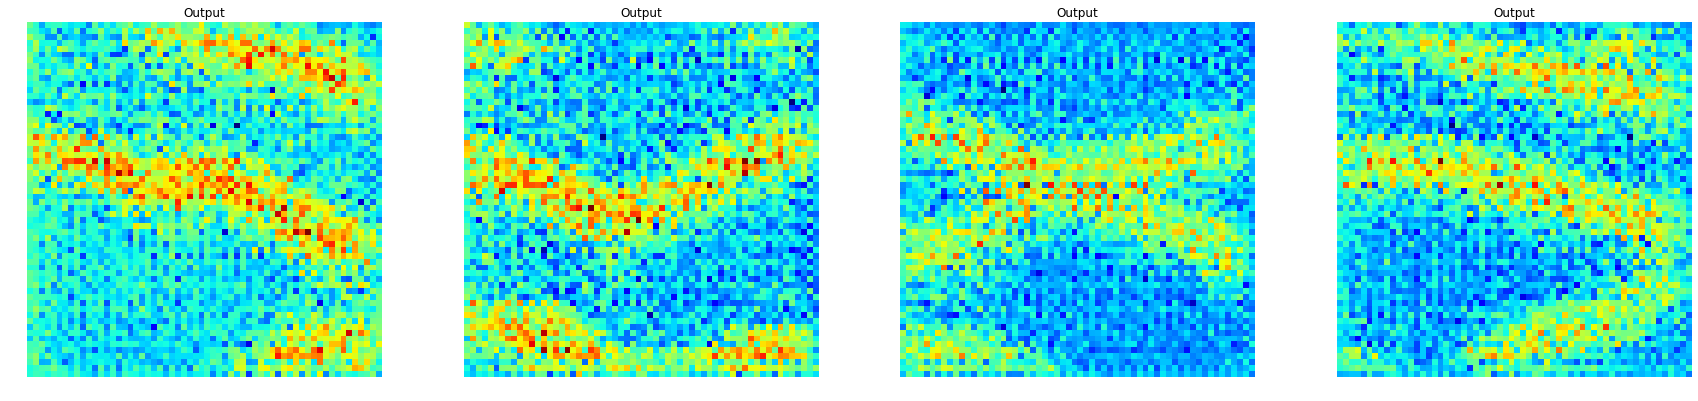

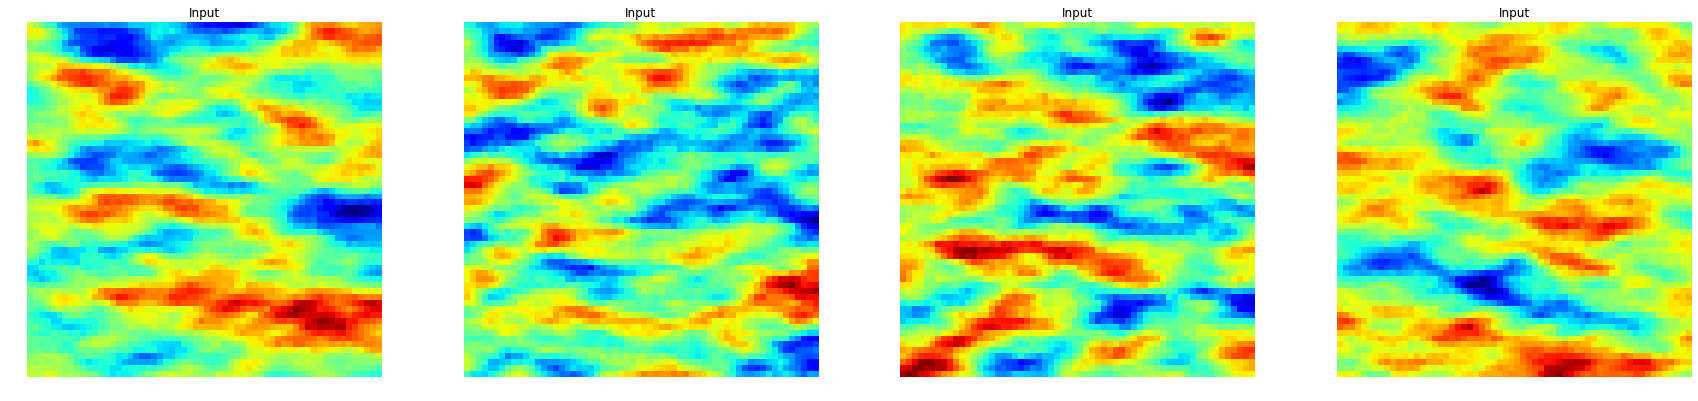

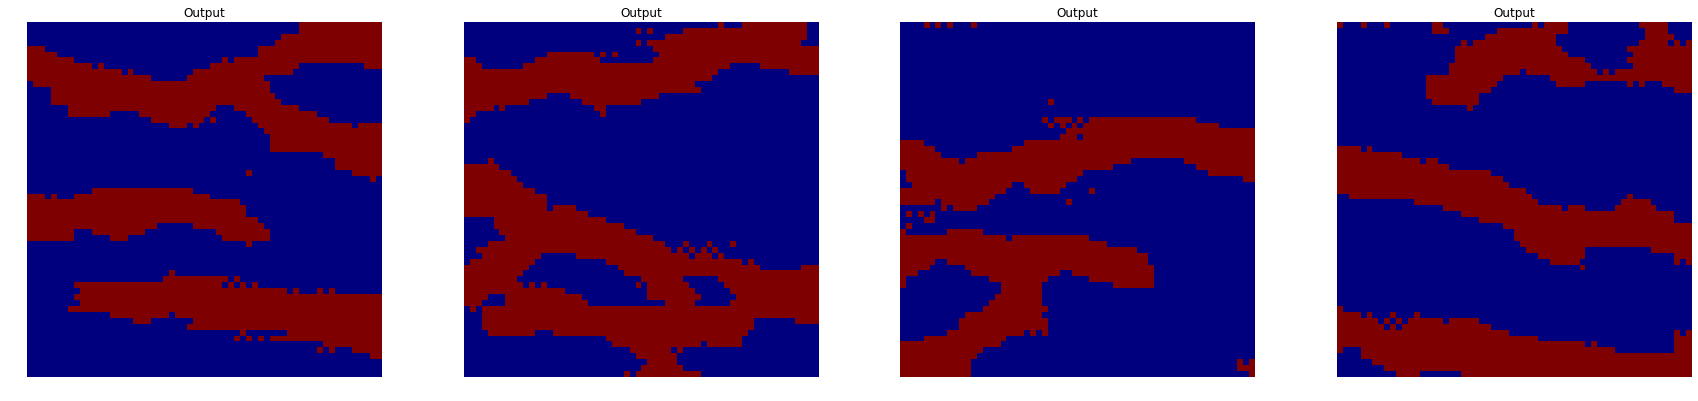

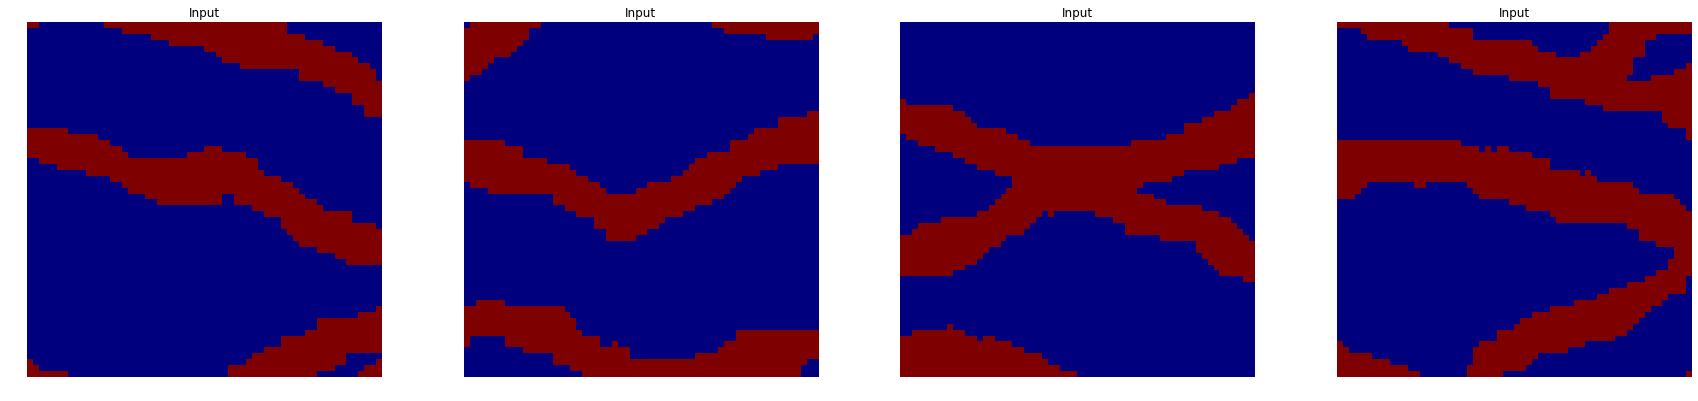

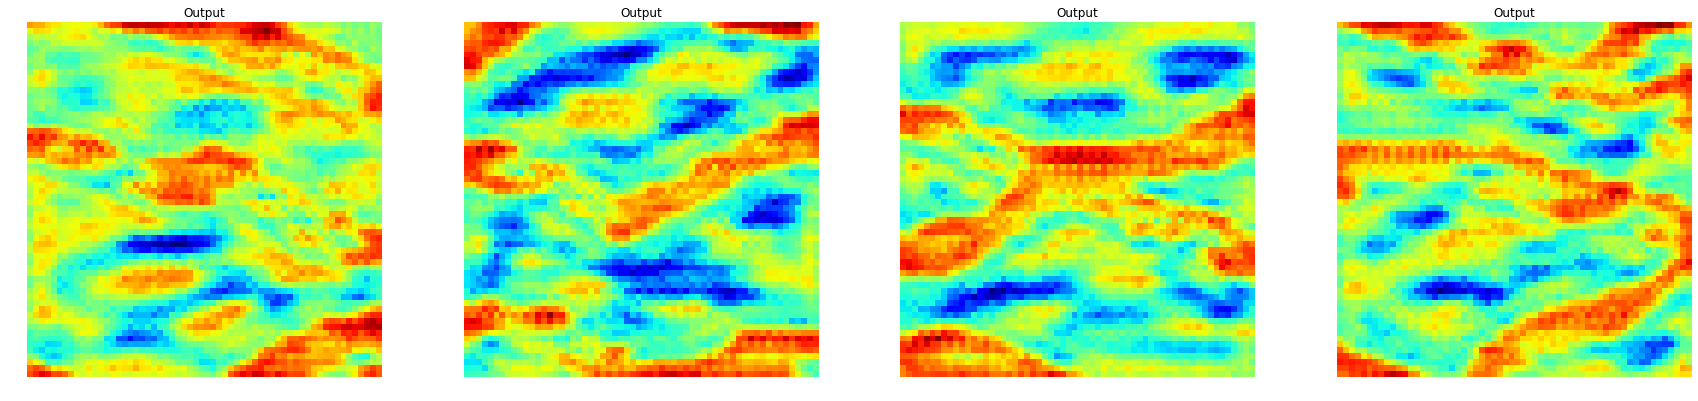

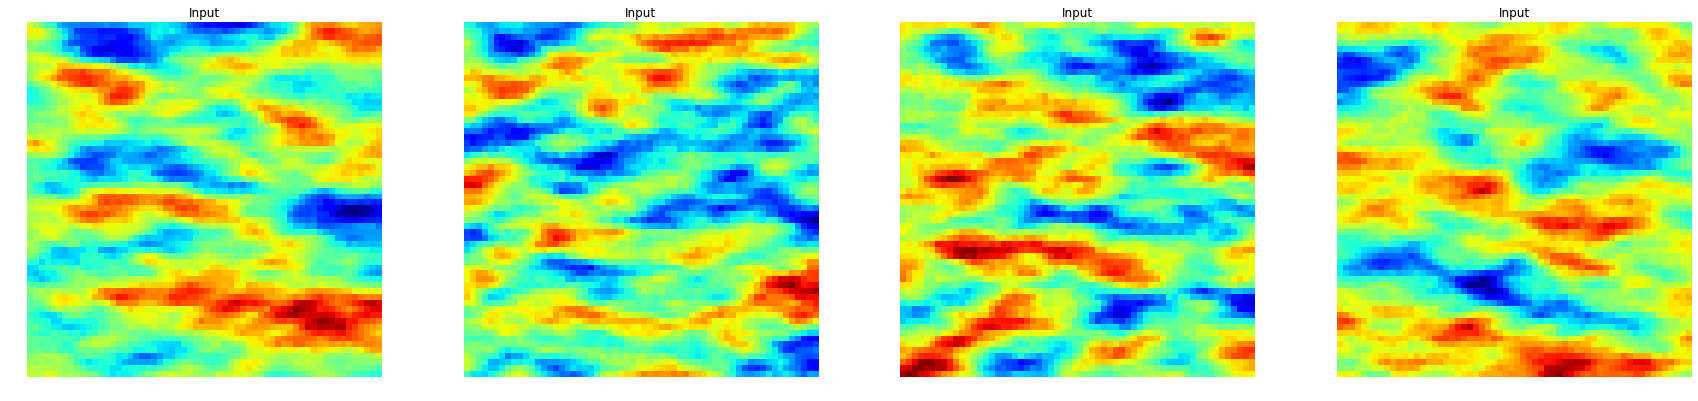

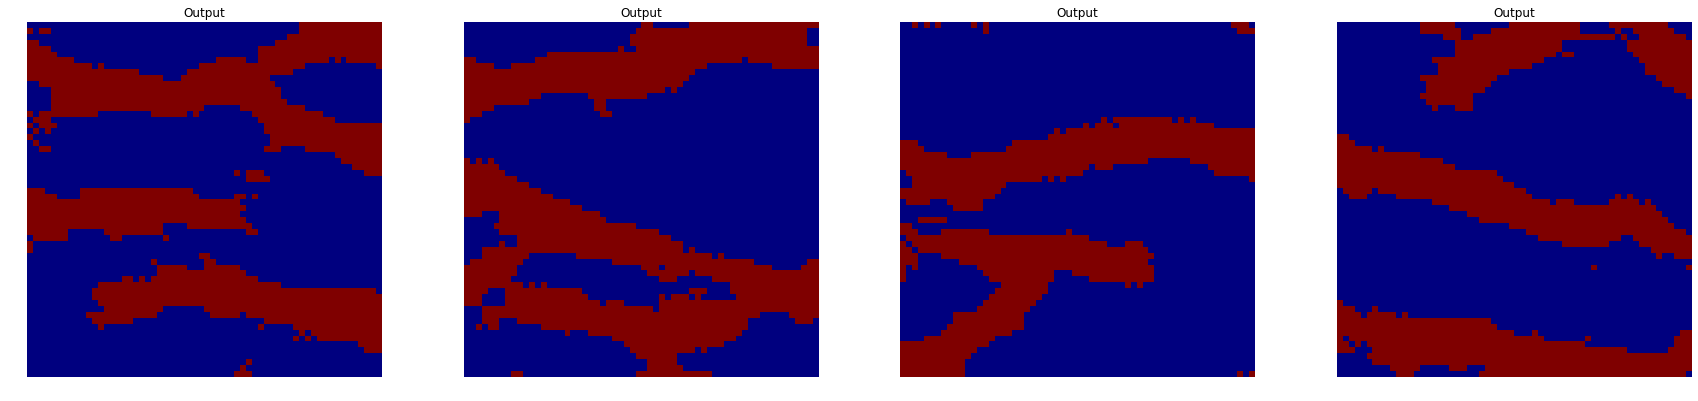

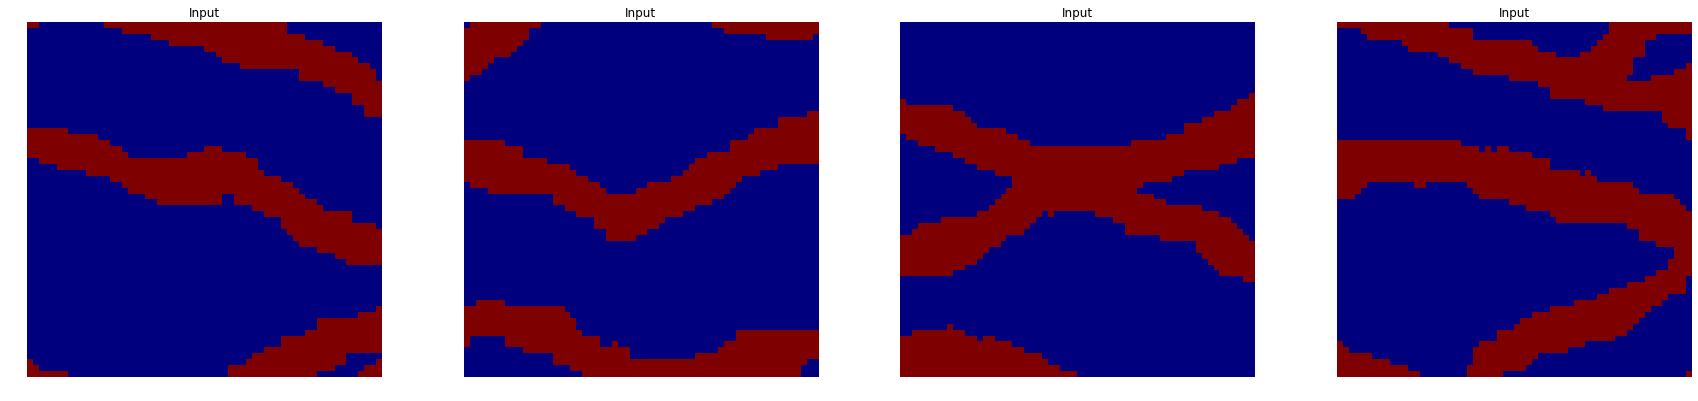

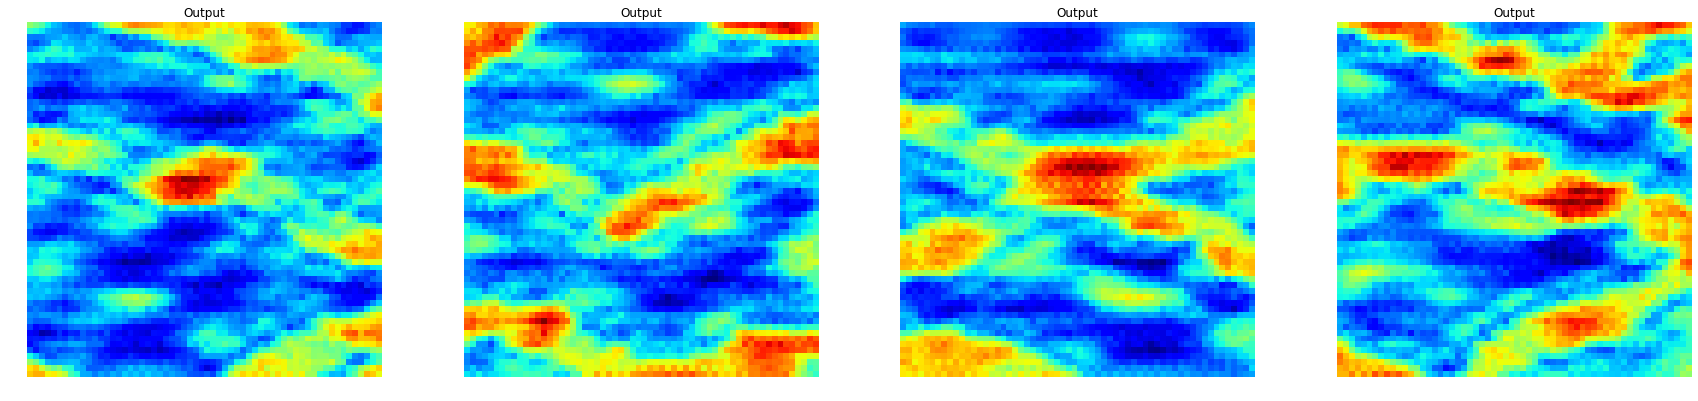

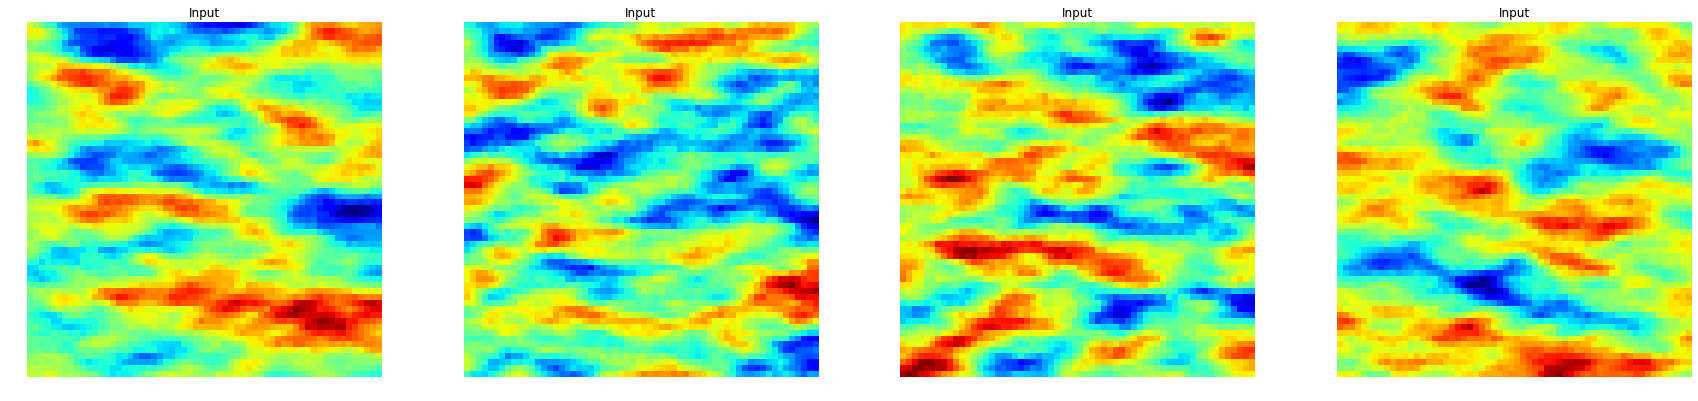

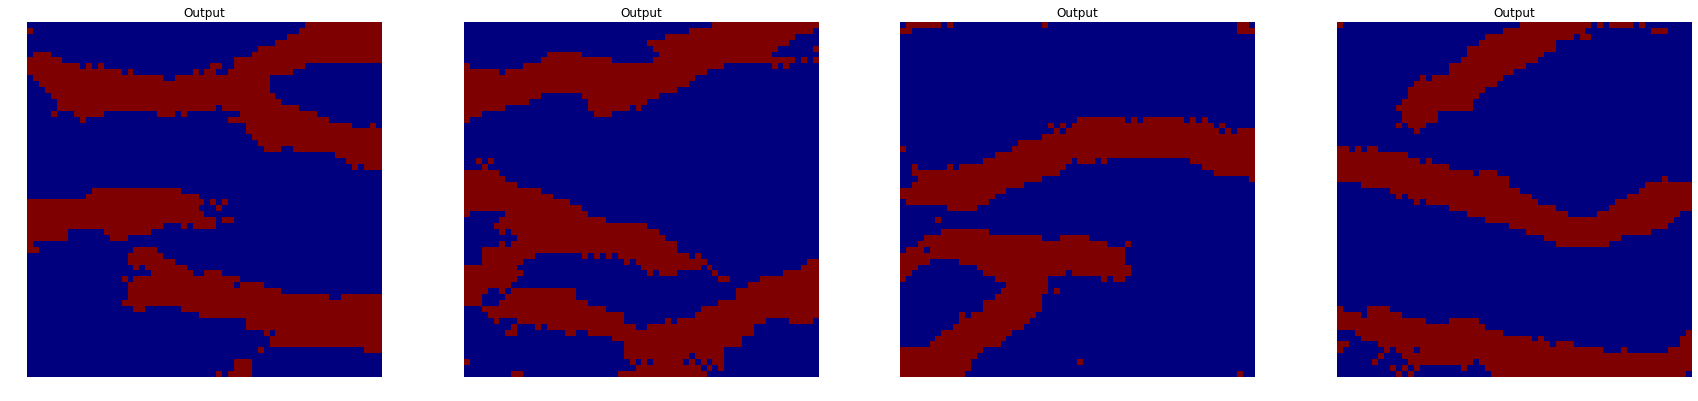

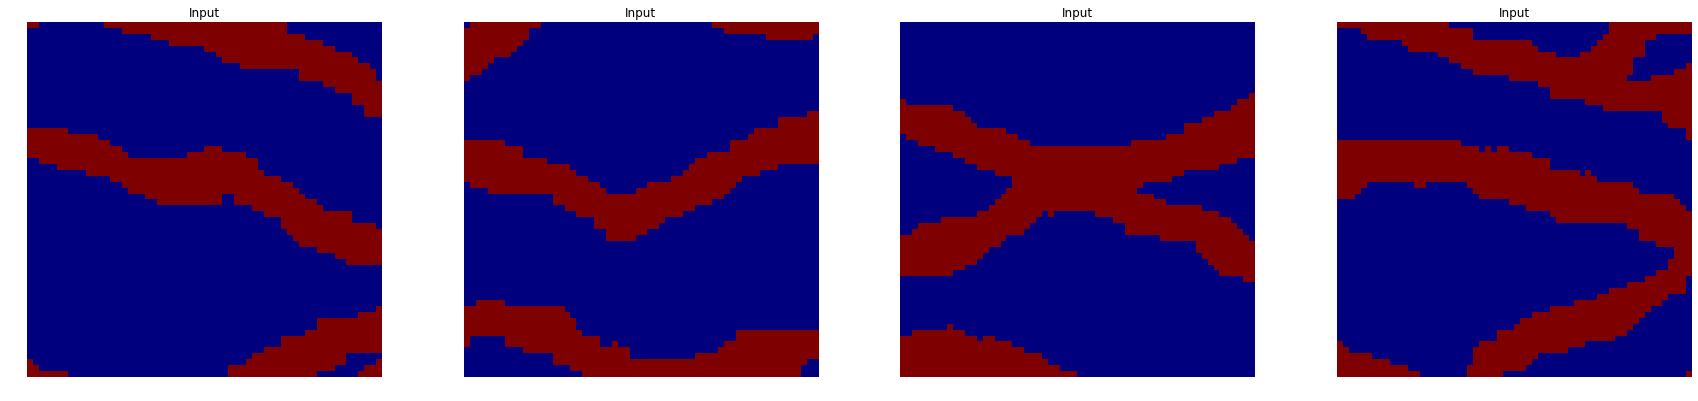

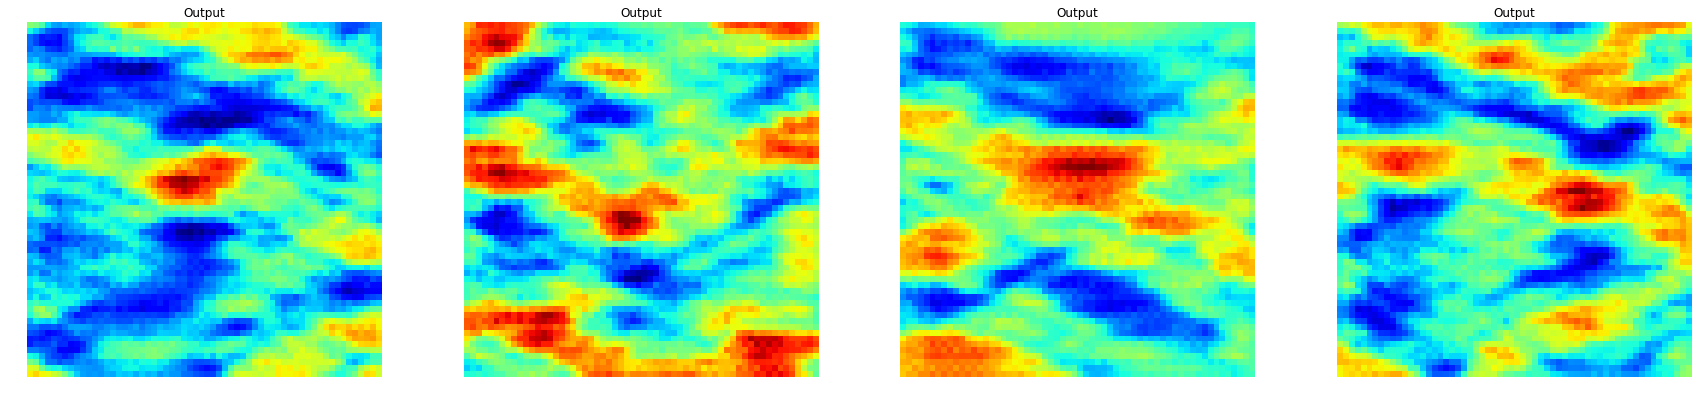

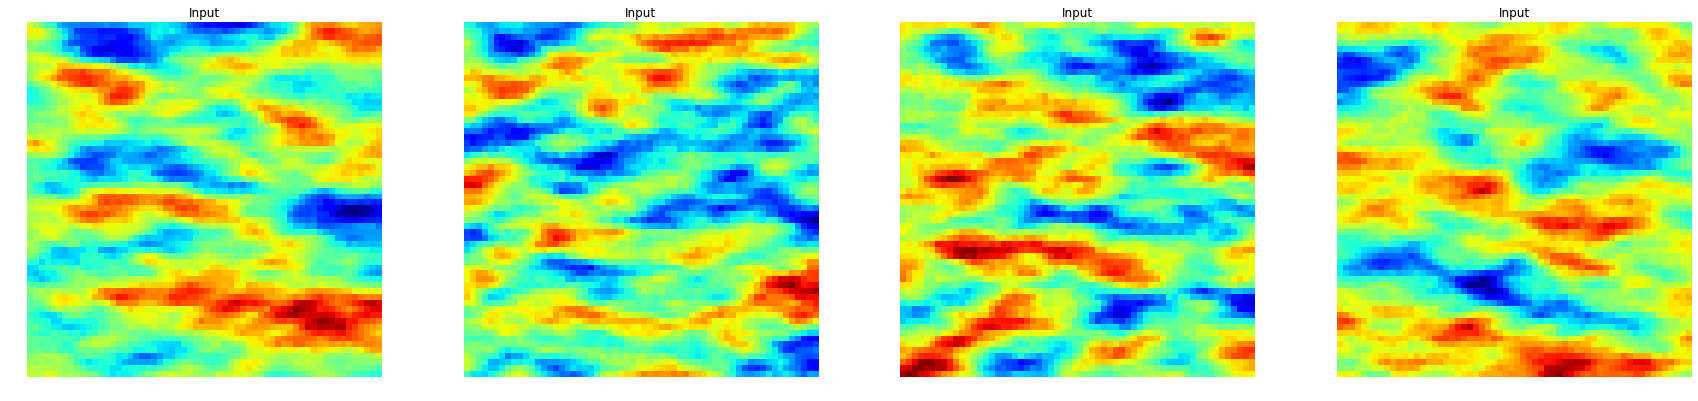

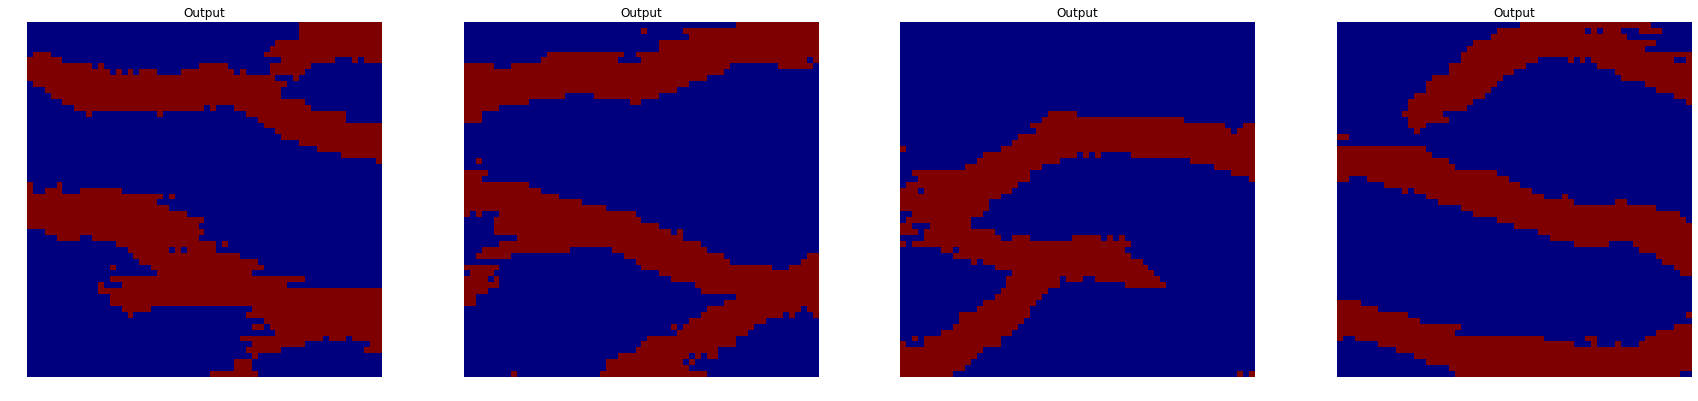

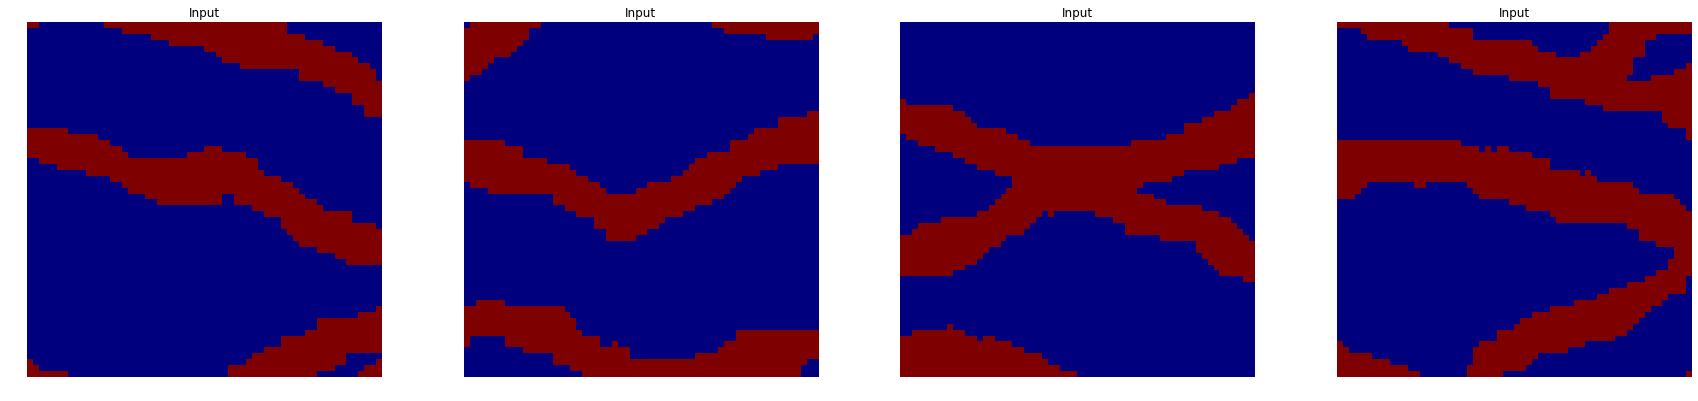

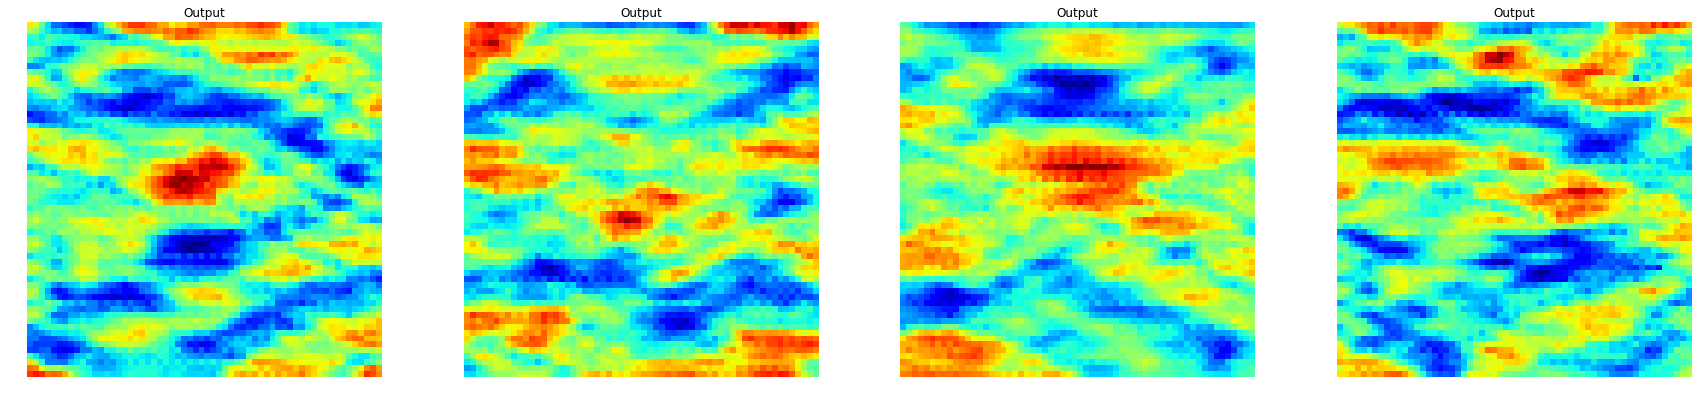

Epoch: [ 1] [2500/2500] time: 539.1974, d_loss_pca: 0.67876875, d_loss_bin: 0.62292629, g_loss_pca: 1.25014913, g_loss_bin: 1.50376177
Cycle losses --> 0.1498887 0.032671742
Accuracy:   0.97502065
Epoch: [ 2] [2500/2500] time: 1073.0225, d_loss_pca: 0.66464543, d_loss_bin: 0.54792696, g_loss_pca: 1.27972436, g_loss_bin: 1.76082885
Cycle losses --> 0.15262958 0.03380014
Accuracy:   0.97913283


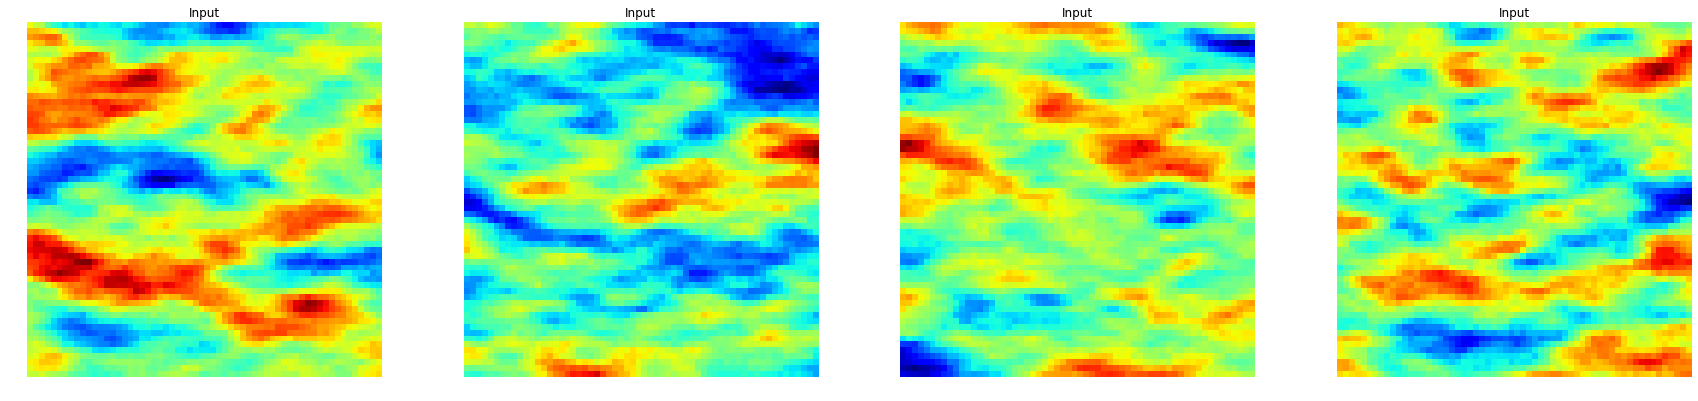

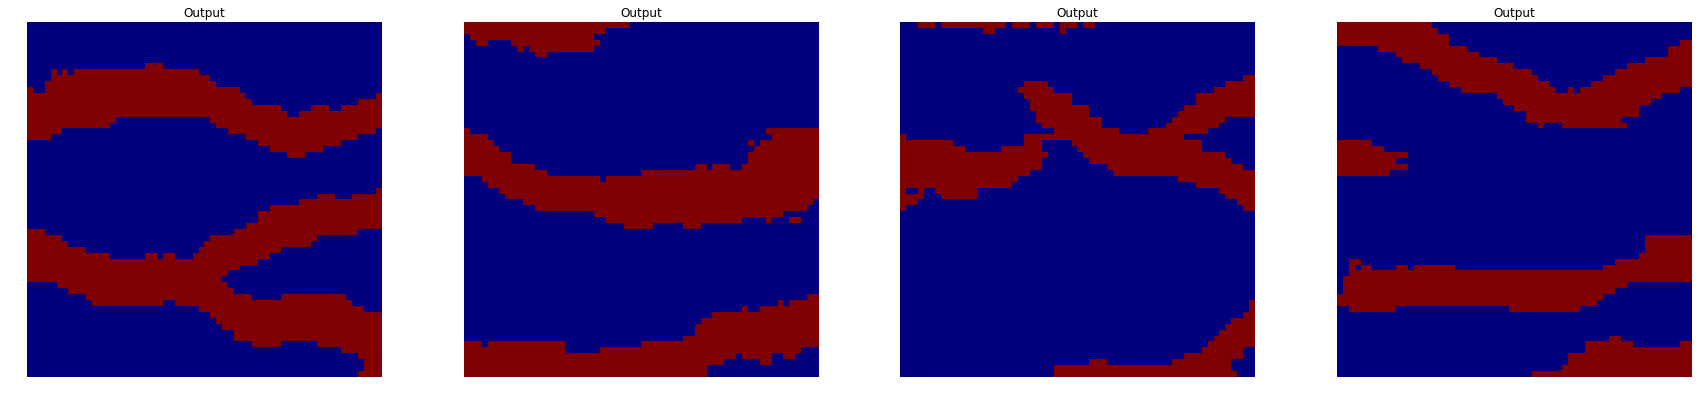

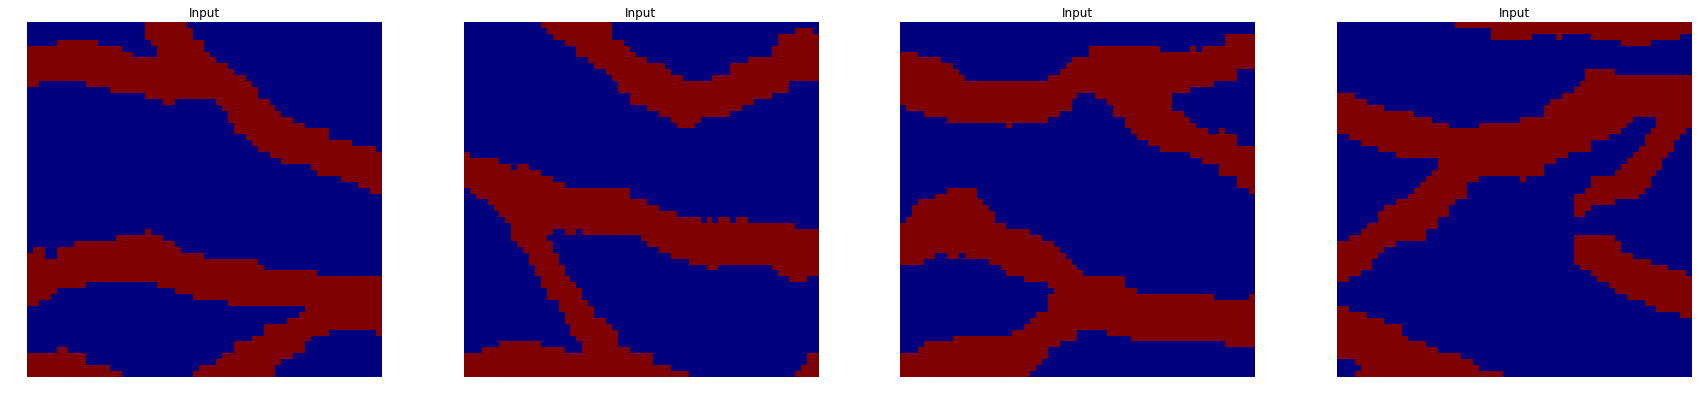

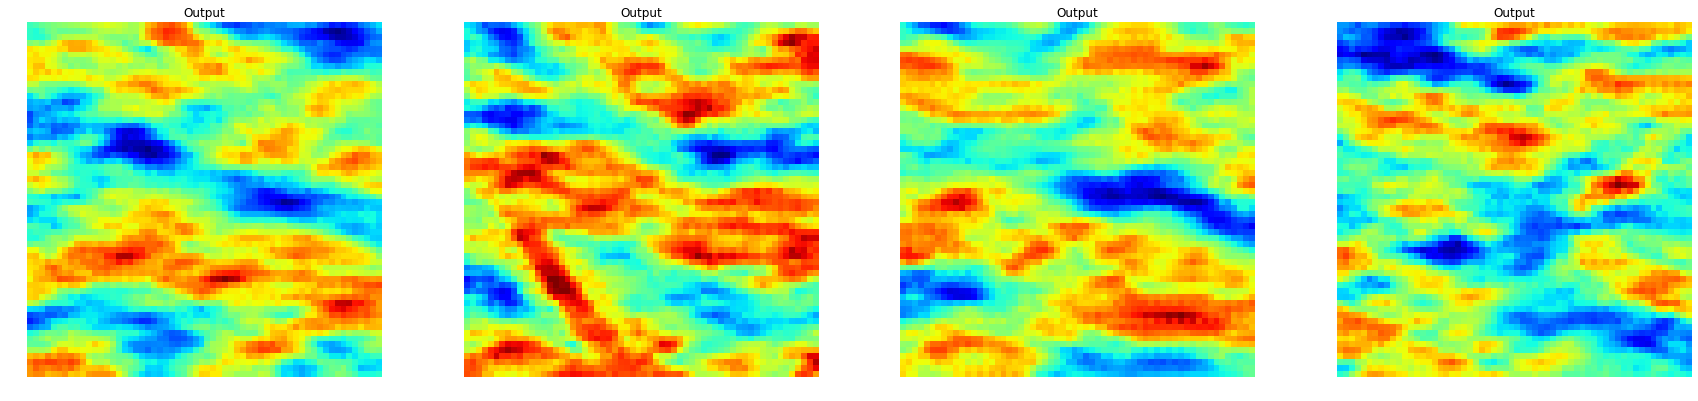

Epoch: [ 3] [2500/2500] time: 1610.3080, d_loss_pca: 0.65565741, d_loss_bin: 0.42493626, g_loss_pca: 1.30350113, g_loss_bin: 2.37086964
Cycle losses --> 0.16530147 0.045380786
Accuracy:   0.977236
Epoch: [ 4] [2500/2500] time: 2143.1794, d_loss_pca: 0.64669698, d_loss_bin: 0.31540859, g_loss_pca: 1.32871950, g_loss_bin: 3.08764410
Cycle losses --> 0.17232175 0.051710878
Accuracy:   0.97811306


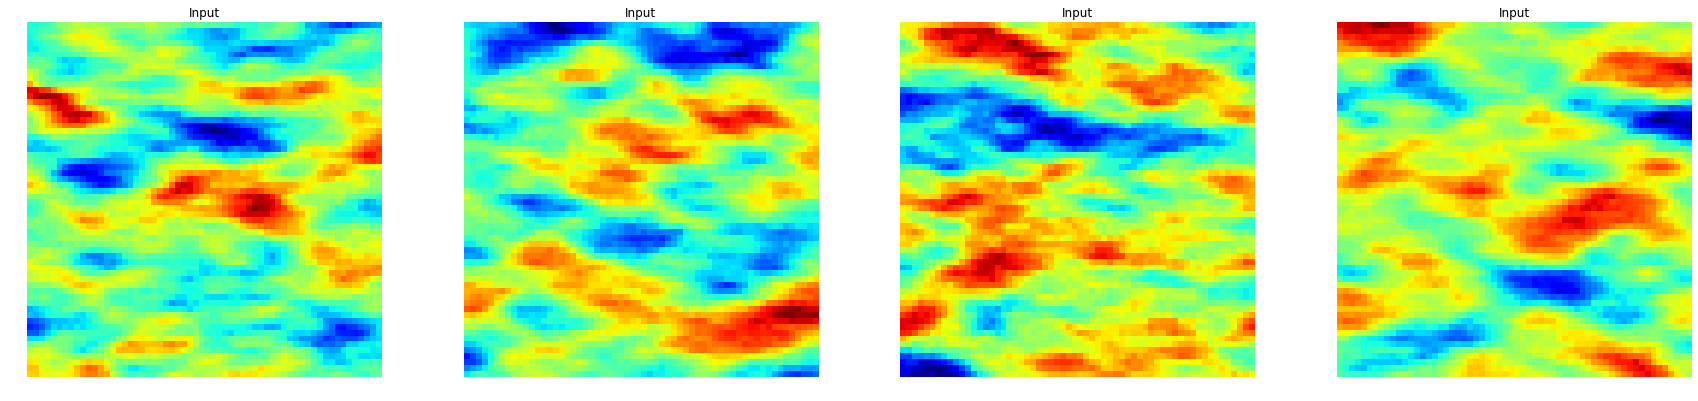

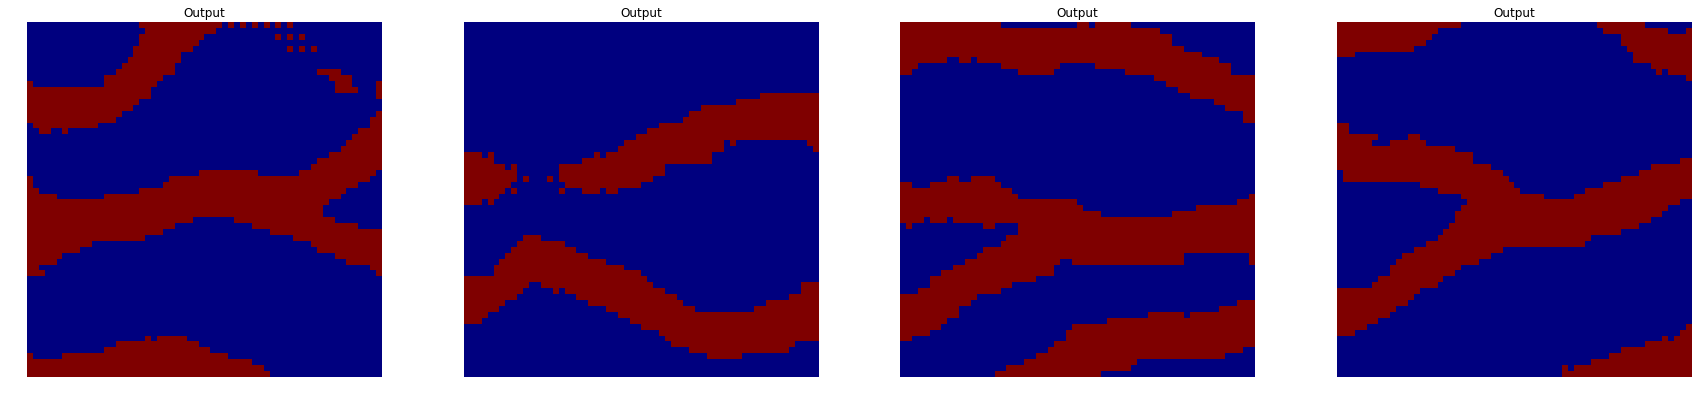

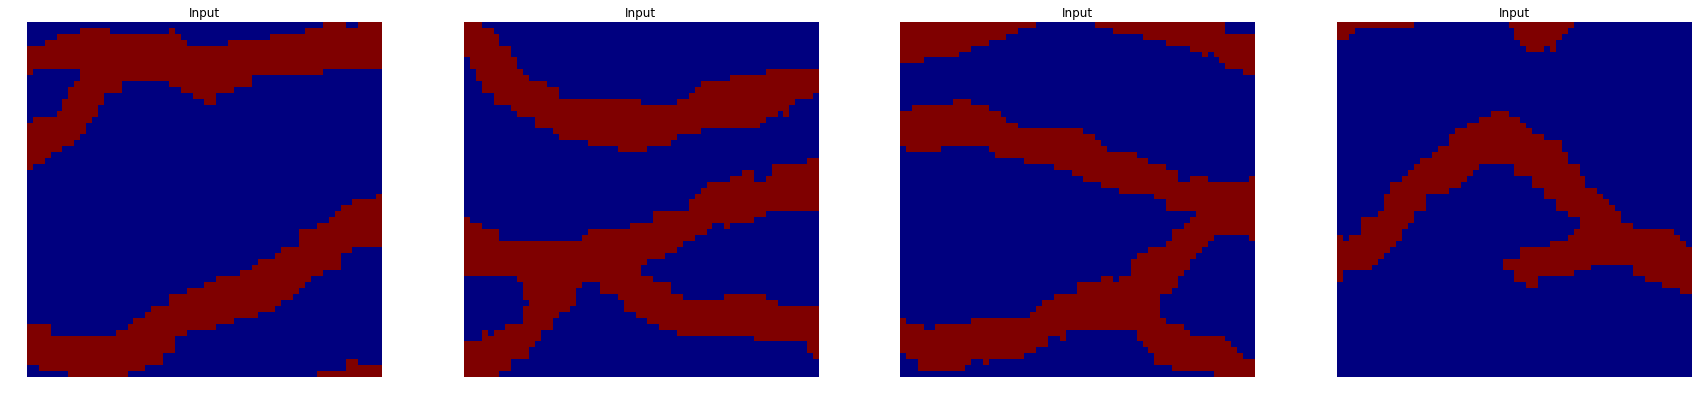

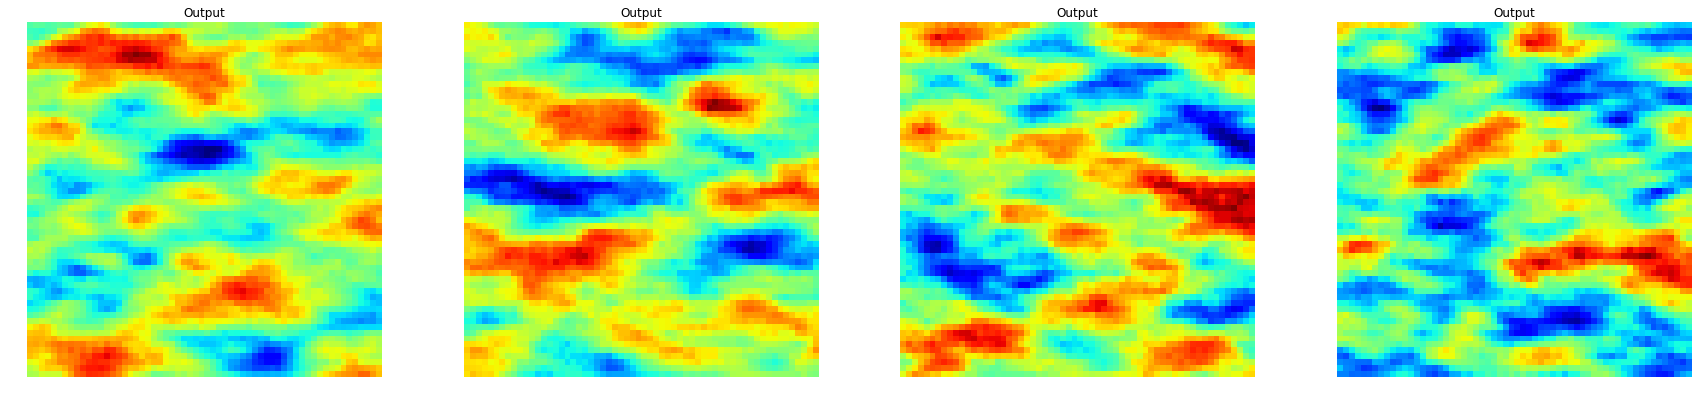

Epoch: [ 5] [2500/2500] time: 2679.8816, d_loss_pca: 0.64038938, d_loss_bin: 0.24930352, g_loss_pca: 1.34774804, g_loss_bin: 3.77798271
Cycle losses --> 0.17706792 0.059100196
Accuracy:   0.9742534
Epoch: [ 6] [2500/2500] time: 3212.7676, d_loss_pca: 0.62526137, d_loss_bin: 0.21639973, g_loss_pca: 1.39051819, g_loss_bin: 4.08888102
Cycle losses --> 0.18136154 0.06429674
Accuracy:   0.97348493


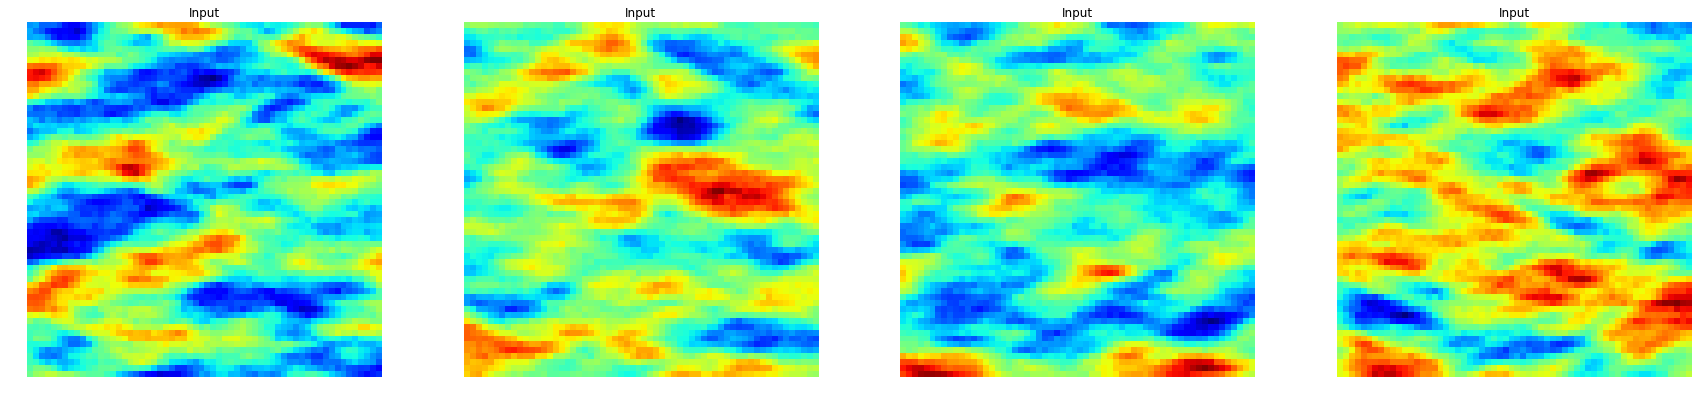

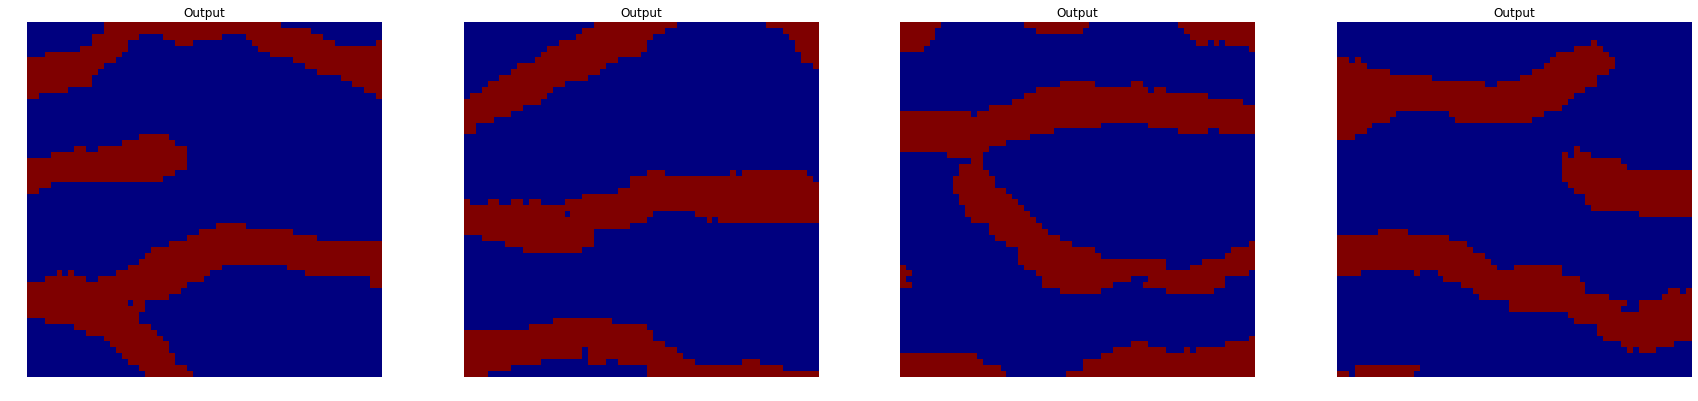

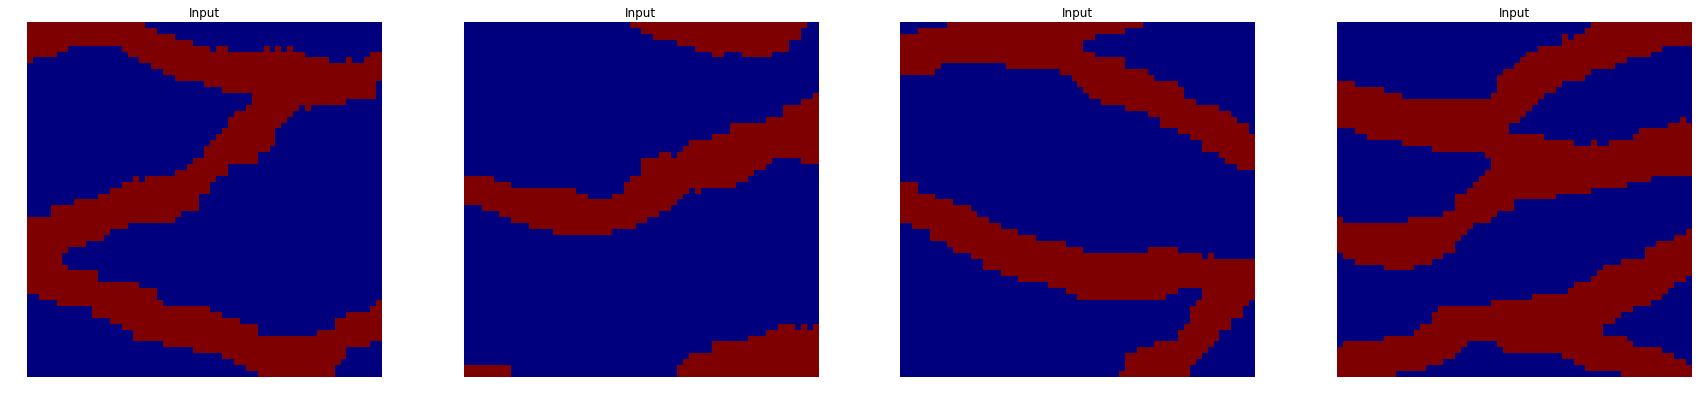

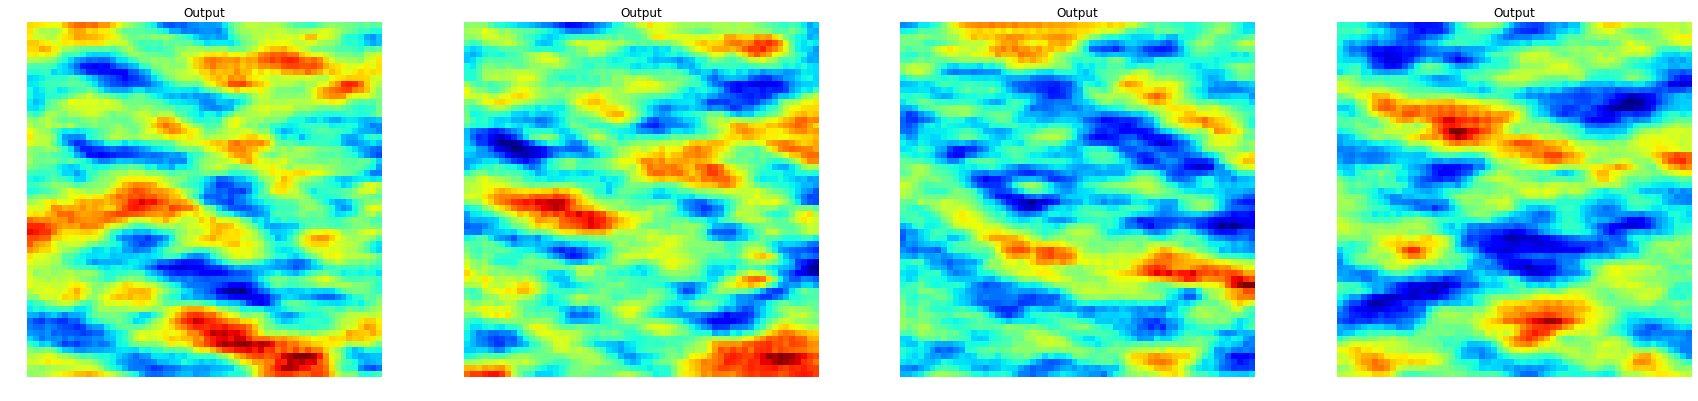

Epoch: [ 7] [2500/2500] time: 3750.3671, d_loss_pca: 0.61398351, d_loss_bin: 0.18270600, g_loss_pca: 1.42168105, g_loss_bin: 4.58537483
Cycle losses --> 0.18513286 0.07120603
Accuracy:   0.9752759
Epoch: [ 8] [2500/2500] time: 4282.6247, d_loss_pca: 0.60564590, d_loss_bin: 0.16492178, g_loss_pca: 1.44635701, g_loss_bin: 4.90925646
Cycle losses --> 0.18735507 0.07524093
Accuracy:   0.965331


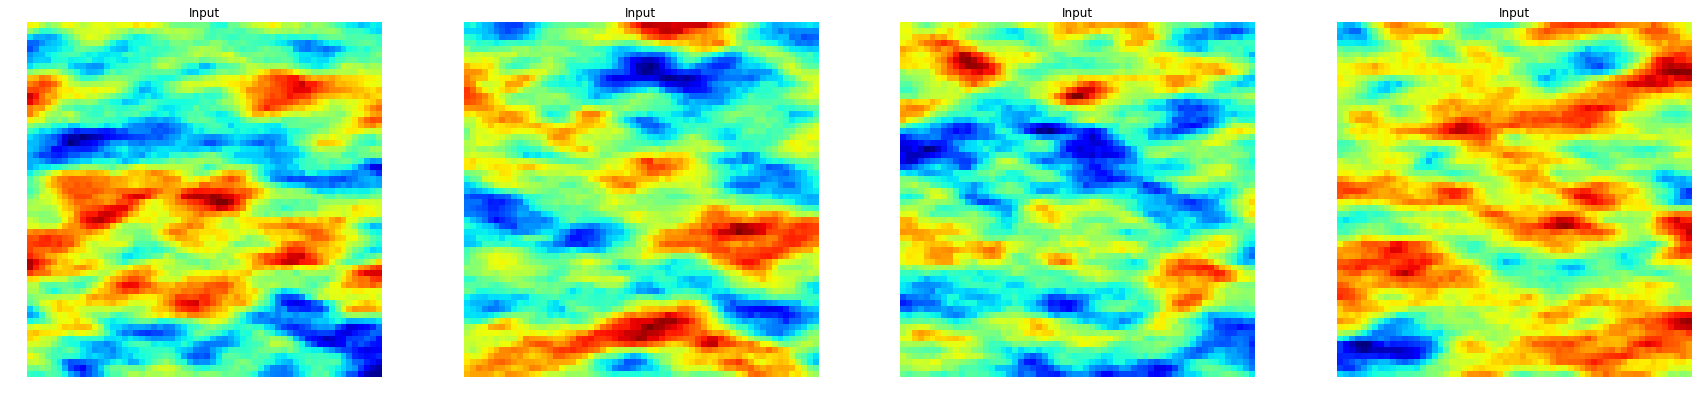

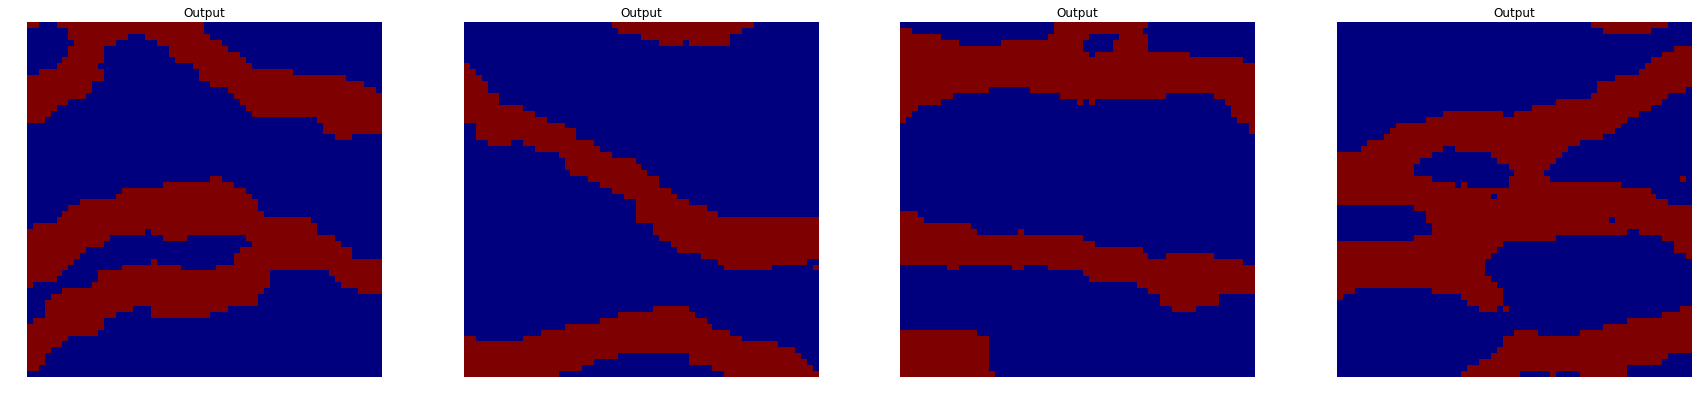

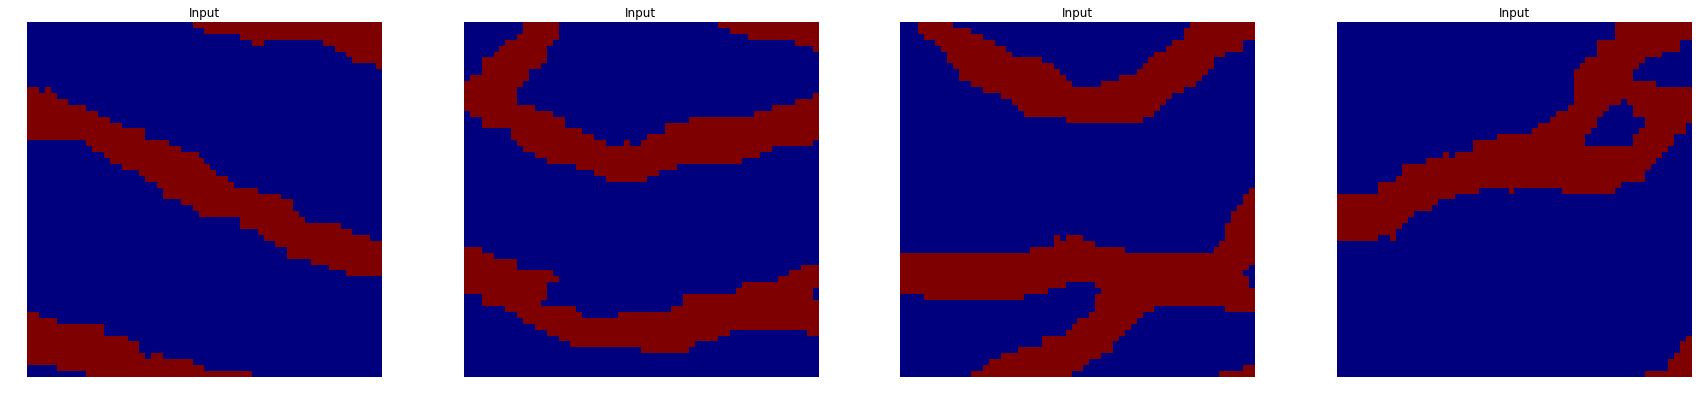

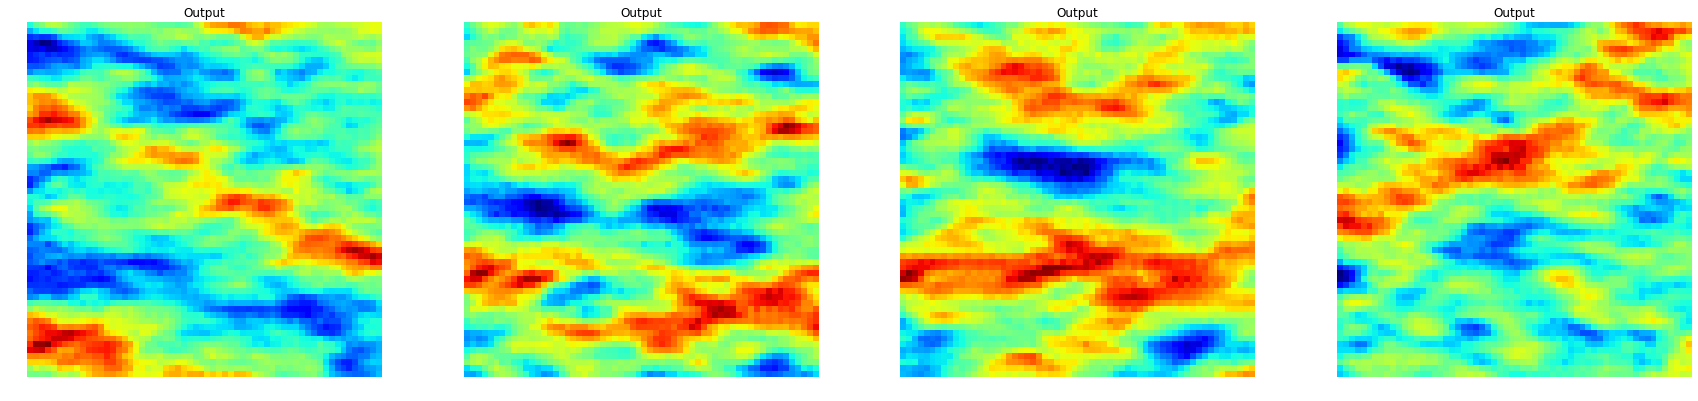

Epoch: [ 9] [2500/2500] time: 4819.7654, d_loss_pca: 0.60950518, d_loss_bin: 0.14955413, g_loss_pca: 1.42084897, g_loss_bin: 5.32356262
Cycle losses --> 0.1892561 0.07340204
Accuracy:   0.9696167
Epoch: [10] [2500/2500] time: 5352.3296, d_loss_pca: 0.61011380, d_loss_bin: 0.14170752, g_loss_pca: 1.41172349, g_loss_bin: 5.46073055
Cycle losses --> 0.19008073 0.079934664
Accuracy:   0.96959513


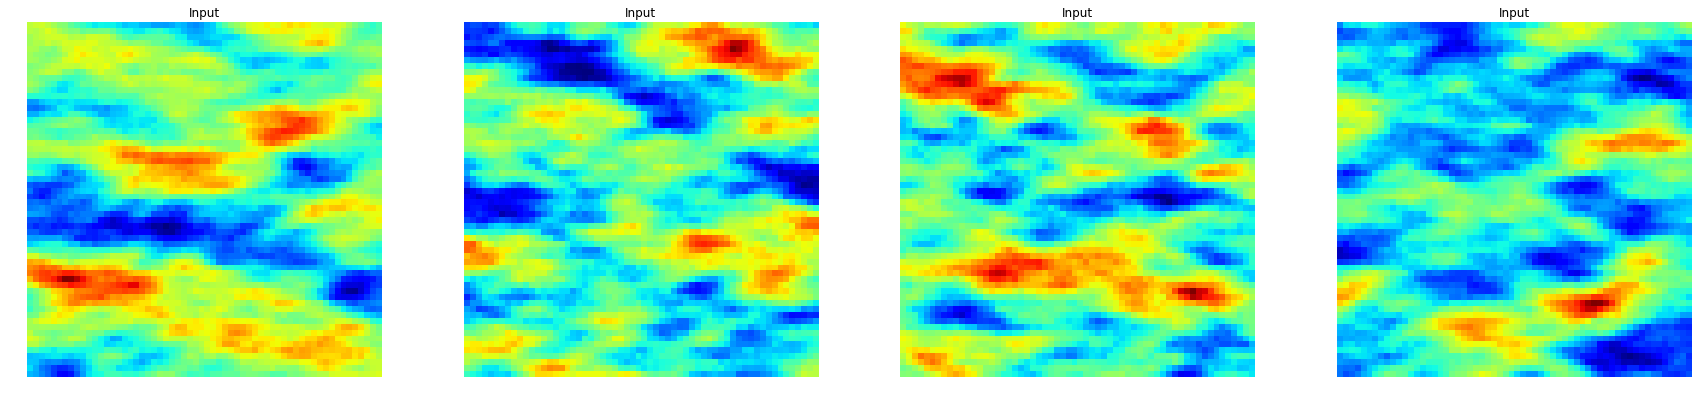

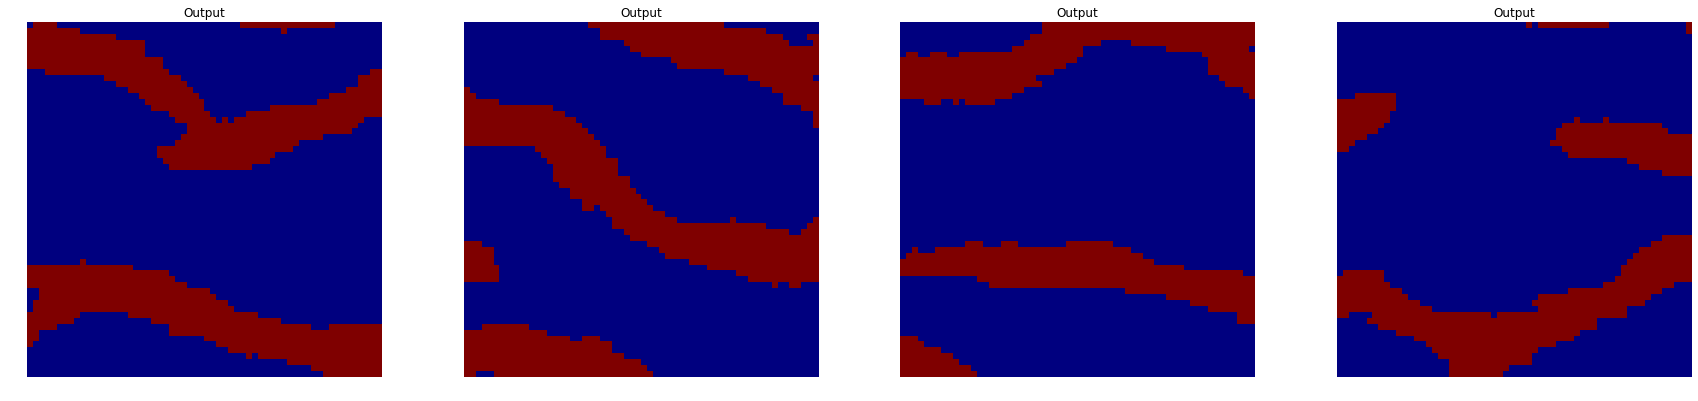

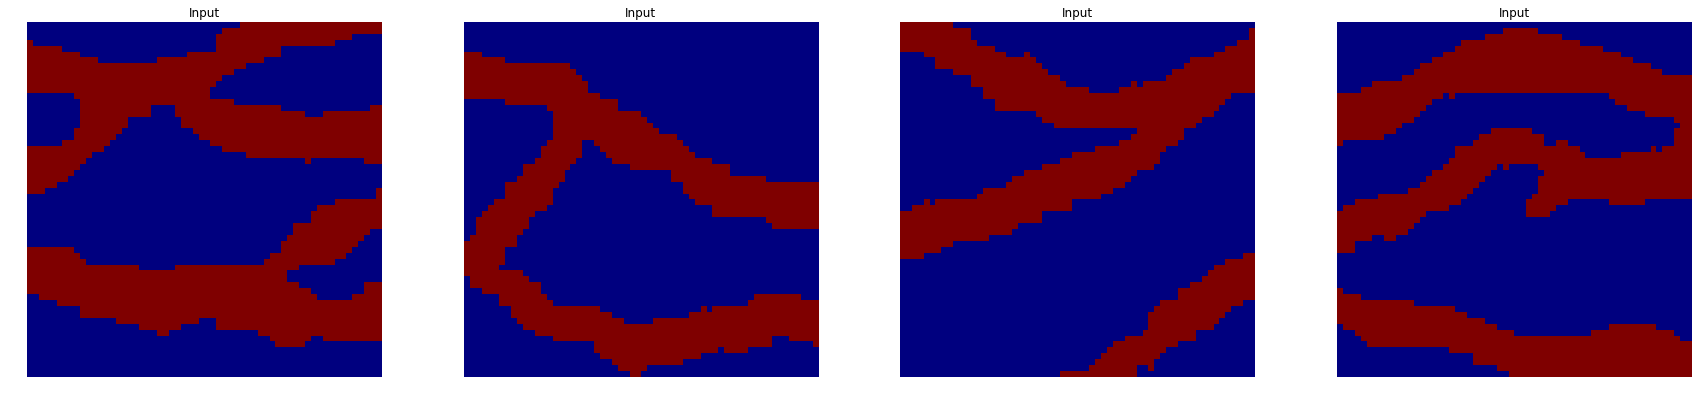

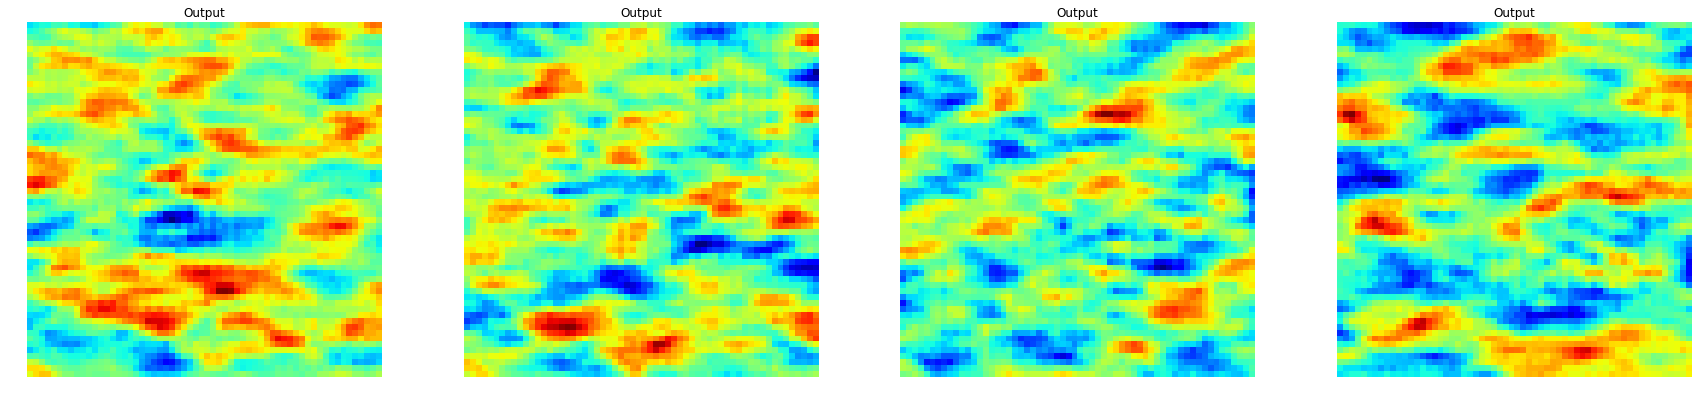

Epoch: [11] [2500/2500] time: 5889.2830, d_loss_pca: 0.59156936, d_loss_bin: 0.13575028, g_loss_pca: 1.46052790, g_loss_bin: 5.79384470
Cycle losses --> 0.19289467 0.08330052
Accuracy:   0.9755343
Epoch: [12] [2500/2500] time: 6421.9313, d_loss_pca: 0.56904280, d_loss_bin: 0.11467864, g_loss_pca: 1.54394710, g_loss_bin: 6.15749550
Cycle losses --> 0.20328438 0.11351914
Accuracy:   0.9747611


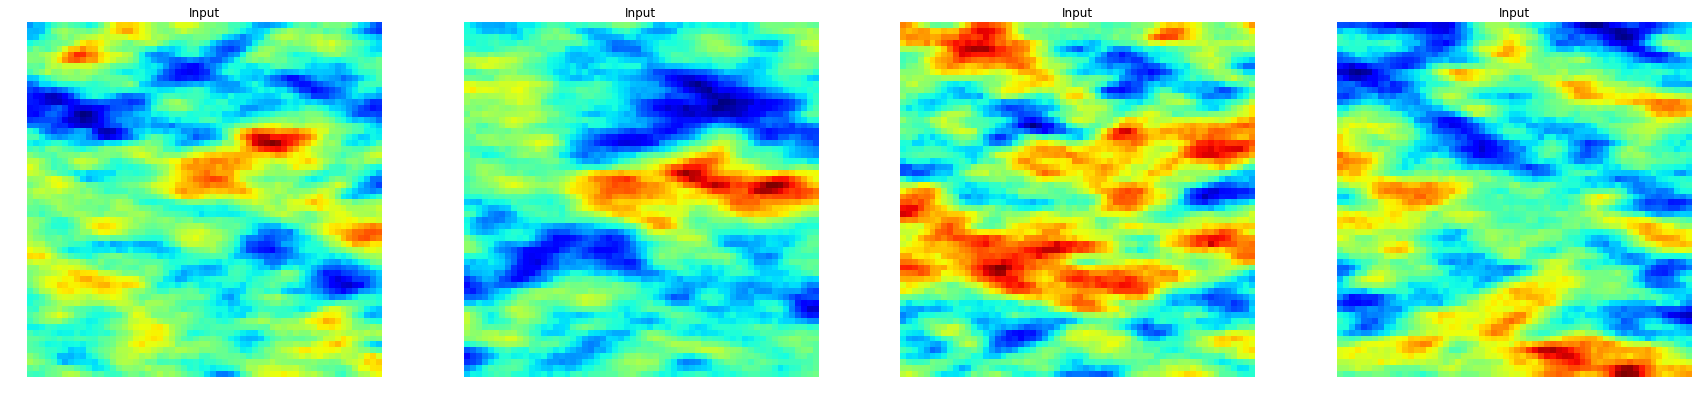

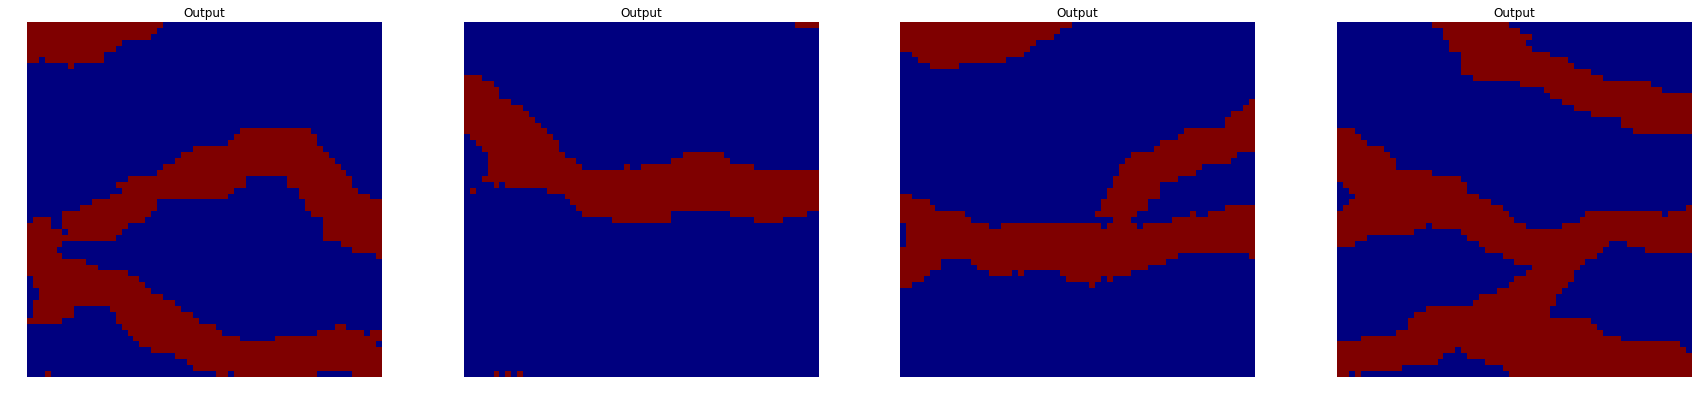

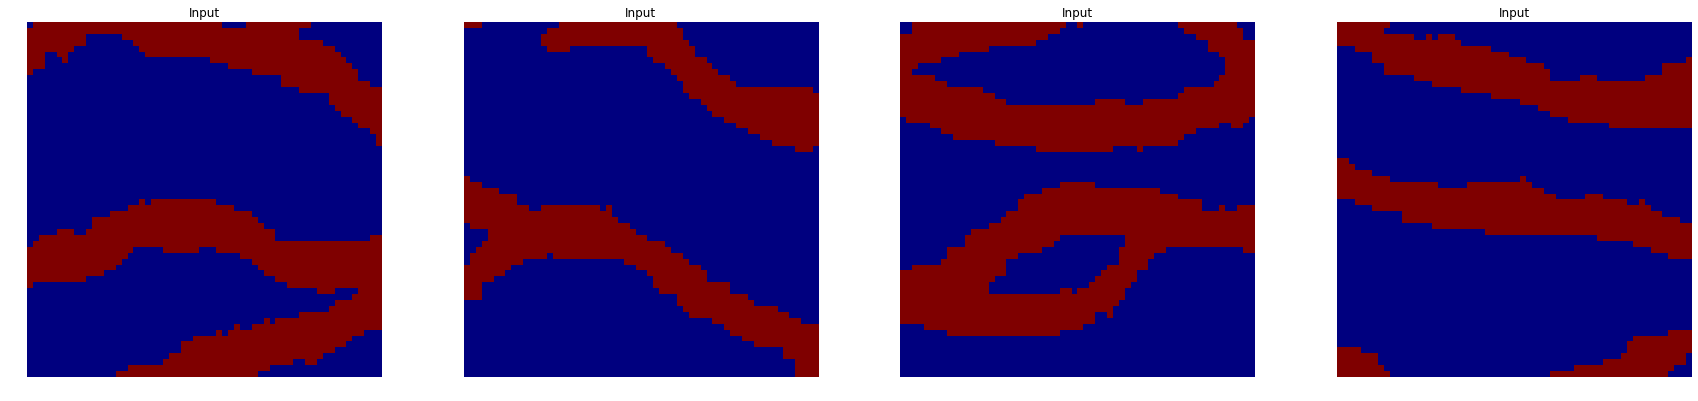

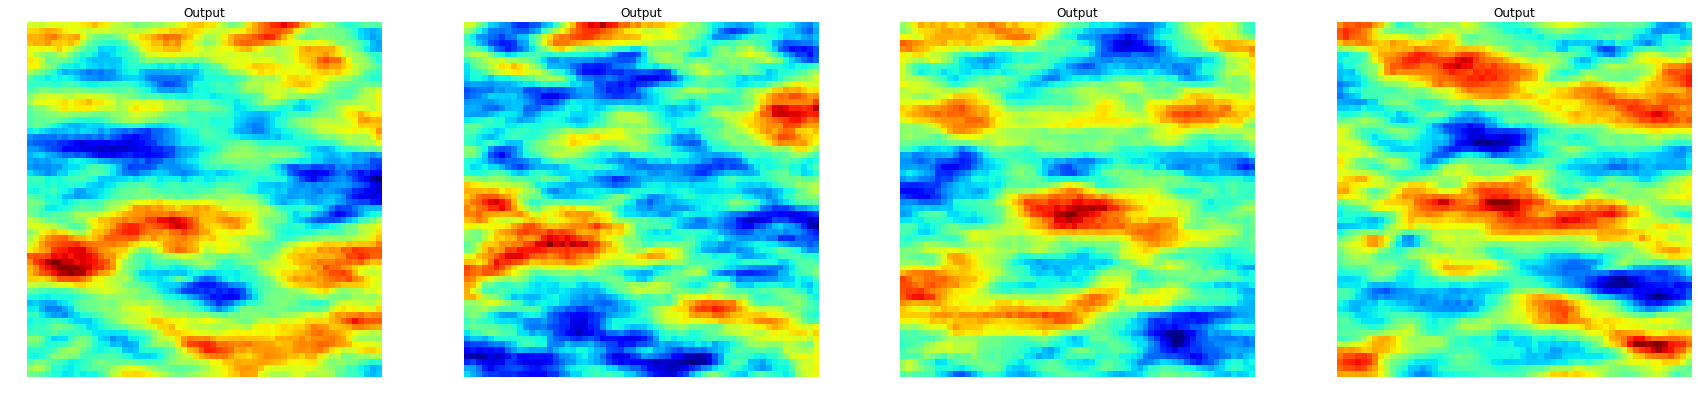

Epoch: [13] [2500/2500] time: 6958.5351, d_loss_pca: 0.57979667, d_loss_bin: 0.11899033, g_loss_pca: 1.50703049, g_loss_bin: 6.26042128
Cycle losses --> 0.19724119 0.09799524
Accuracy:   0.97148186
Epoch: [14] [2500/2500] time: 7491.1766, d_loss_pca: 0.57545388, d_loss_bin: 0.11115349, g_loss_pca: 1.50006425, g_loss_bin: 6.46940565
Cycle losses --> 0.20261343 0.09887737
Accuracy:   0.9765378


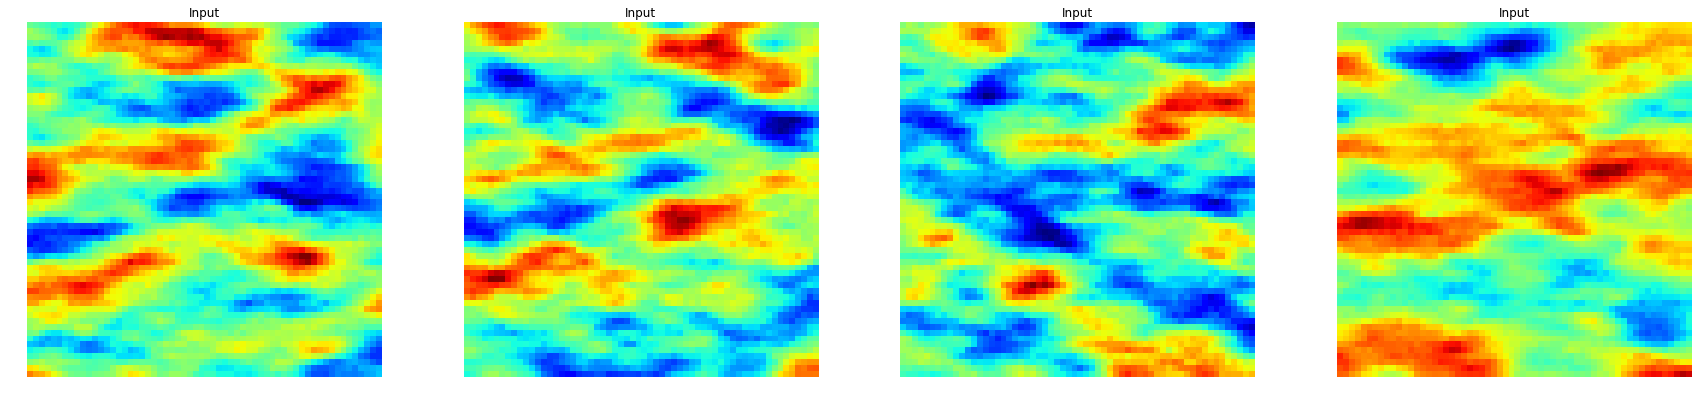

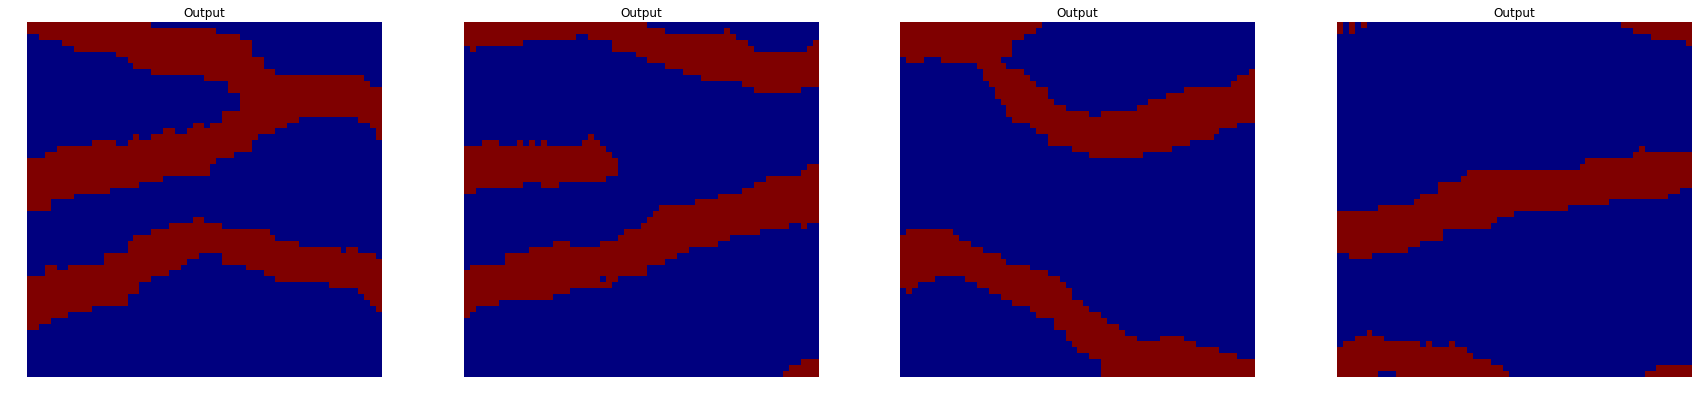

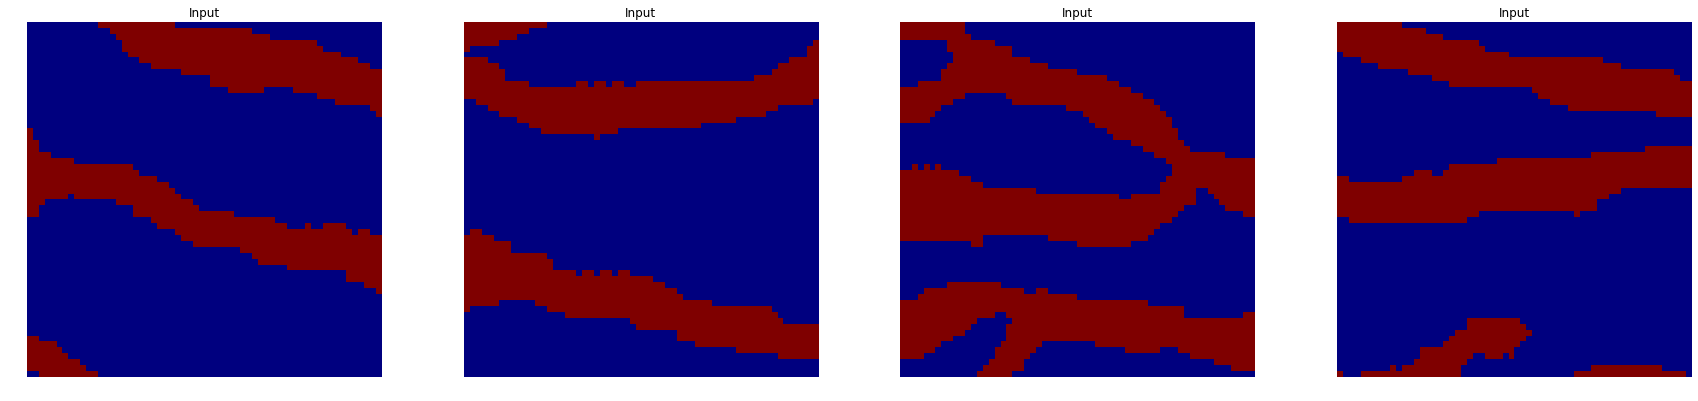

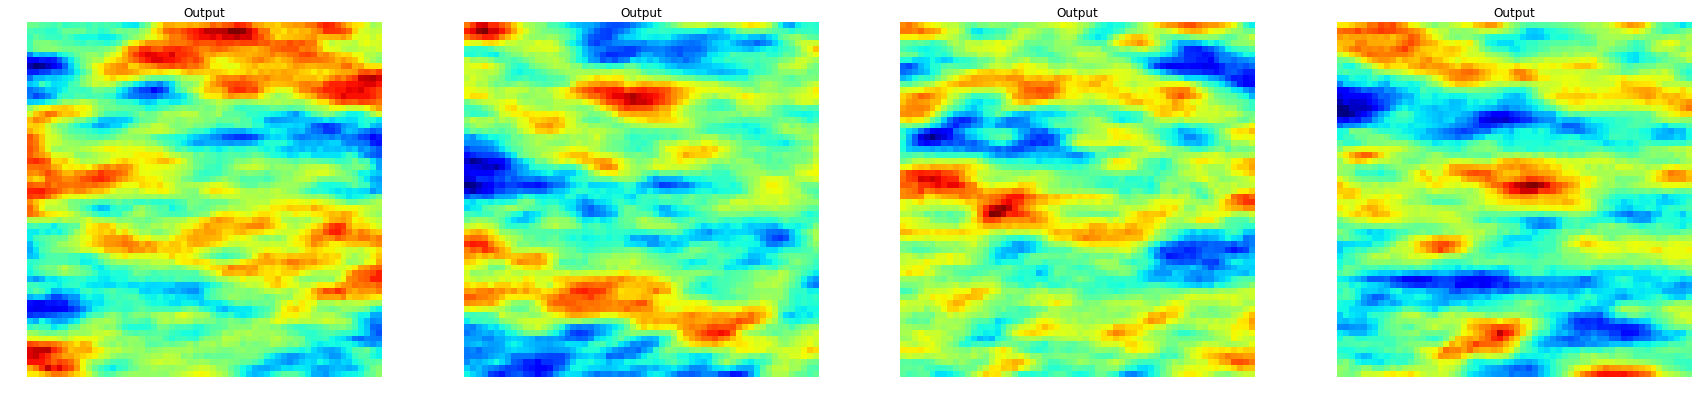

Epoch: [15] [2500/2500] time: 8027.3159, d_loss_pca: 0.56730747, d_loss_bin: 0.10815625, g_loss_pca: 1.53196204, g_loss_bin: 6.66037893
Cycle losses --> 0.202375 0.102284744
Accuracy:   0.9664963
Epoch: [16] [2500/2500] time: 8559.3706, d_loss_pca: 0.56368589, d_loss_bin: 0.10454854, g_loss_pca: 1.52931190, g_loss_bin: 6.67965794
Cycle losses --> 0.20063096 0.10297807
Accuracy:   0.97191644


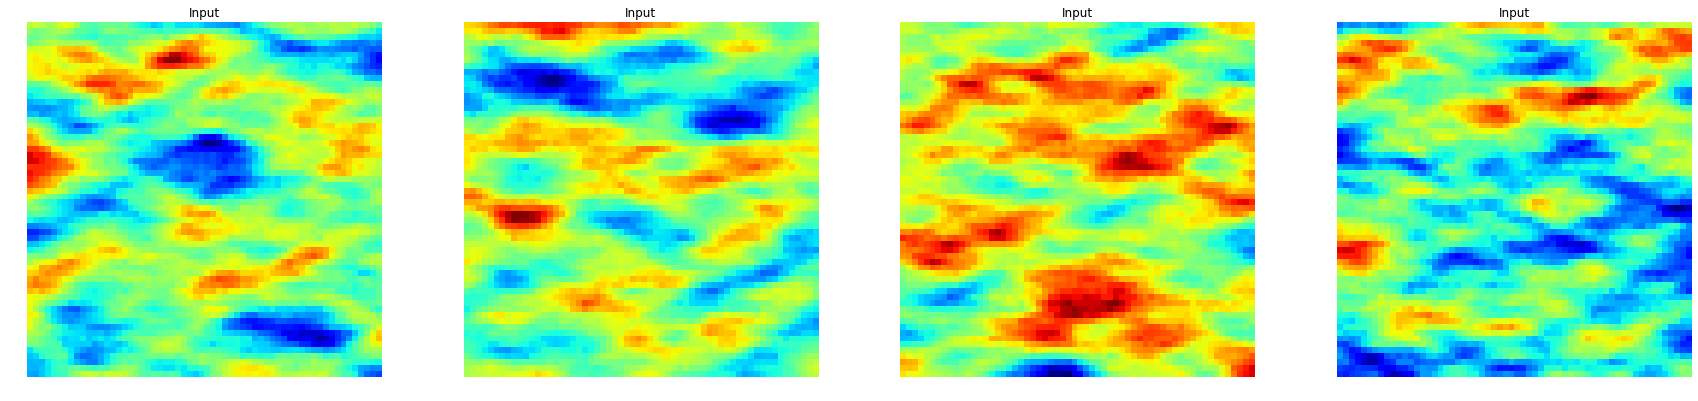

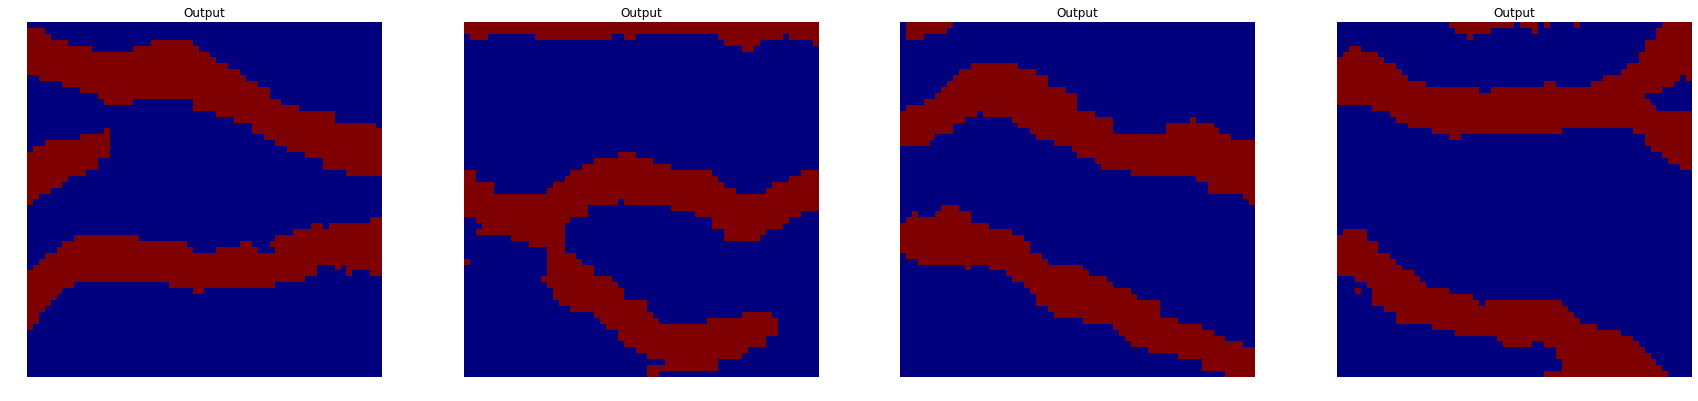

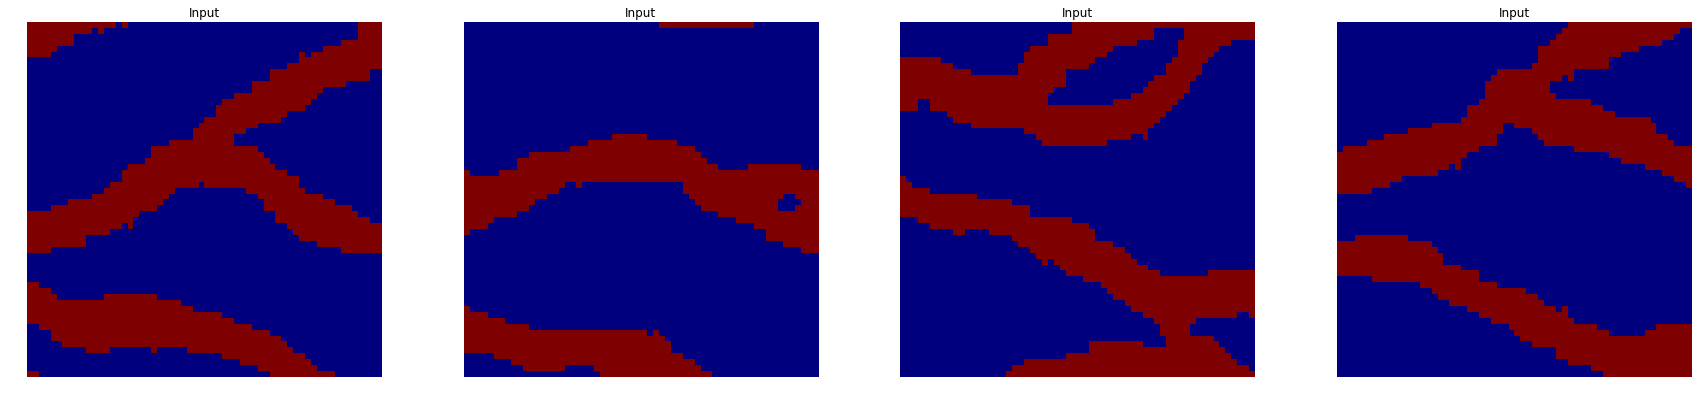

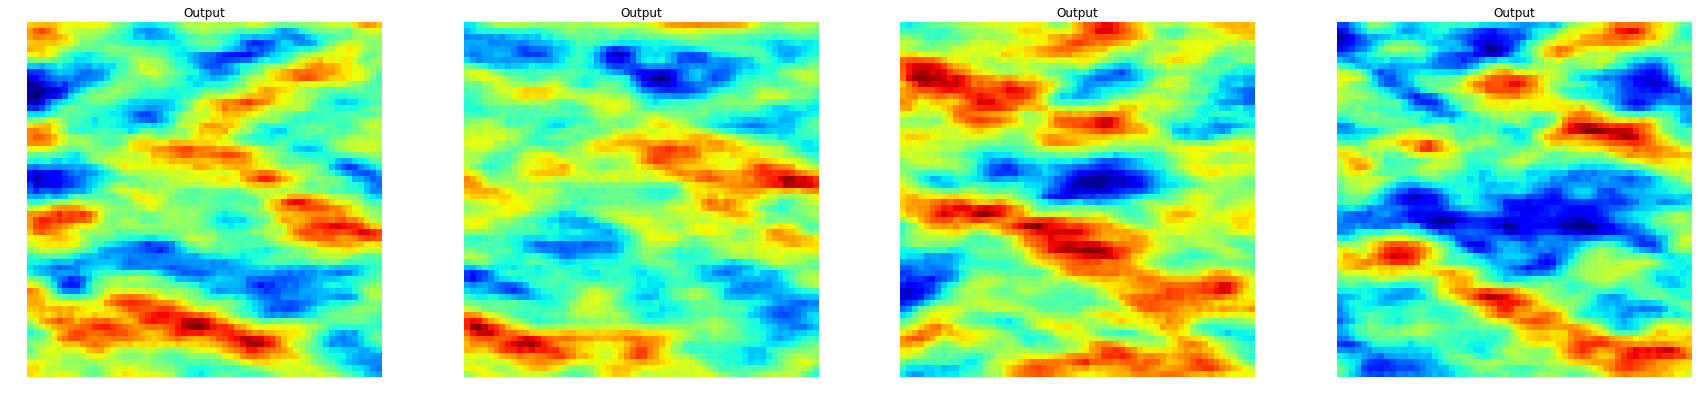

Epoch: [17] [2500/2500] time: 9096.7978, d_loss_pca: 0.56101680, d_loss_bin: 0.09854669, g_loss_pca: 1.53041542, g_loss_bin: 7.11660242
Cycle losses --> 0.20488183 0.10831306
Accuracy:   0.9750671
Epoch: [18] [2500/2500] time: 9630.0495, d_loss_pca: 0.54915196, d_loss_bin: 0.08971049, g_loss_pca: 1.54840195, g_loss_bin: 7.35941029
Cycle losses --> 0.20414355 0.10800603
Accuracy:   0.9688401


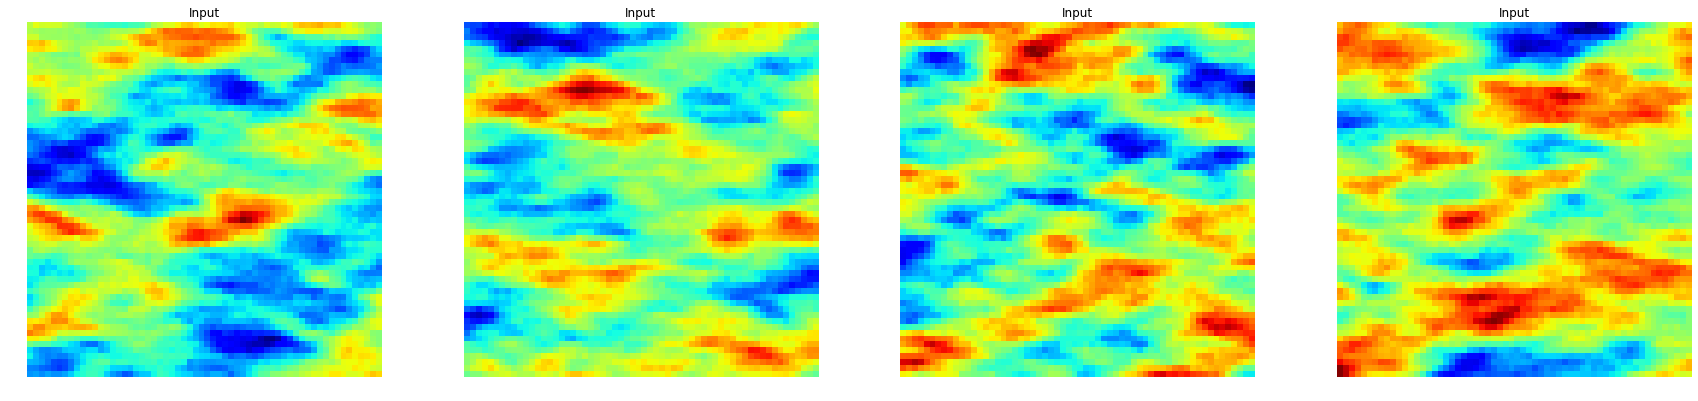

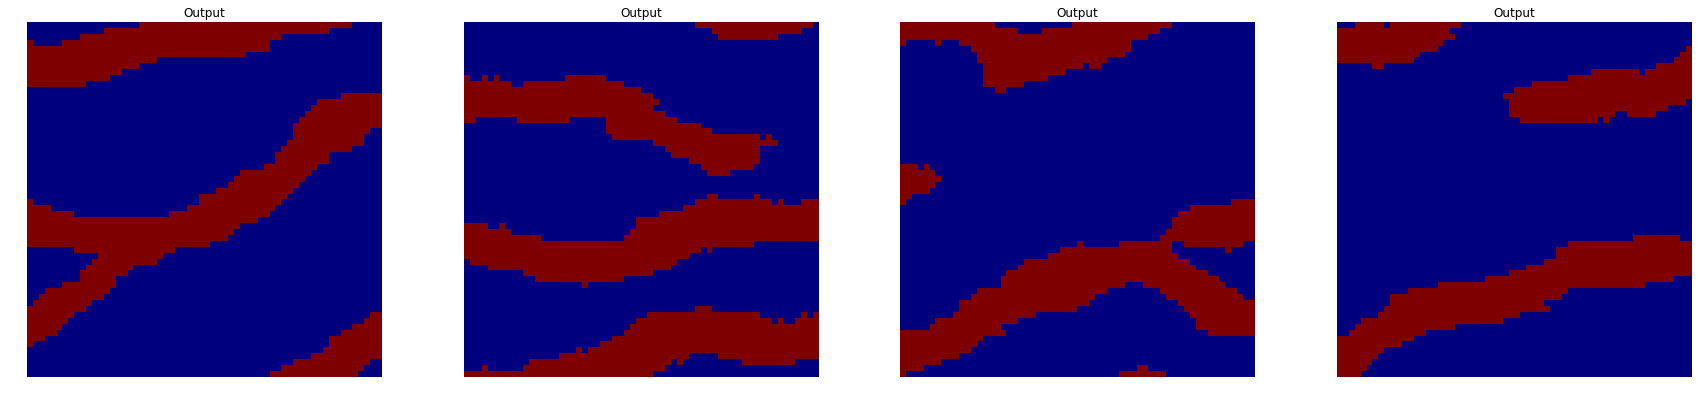

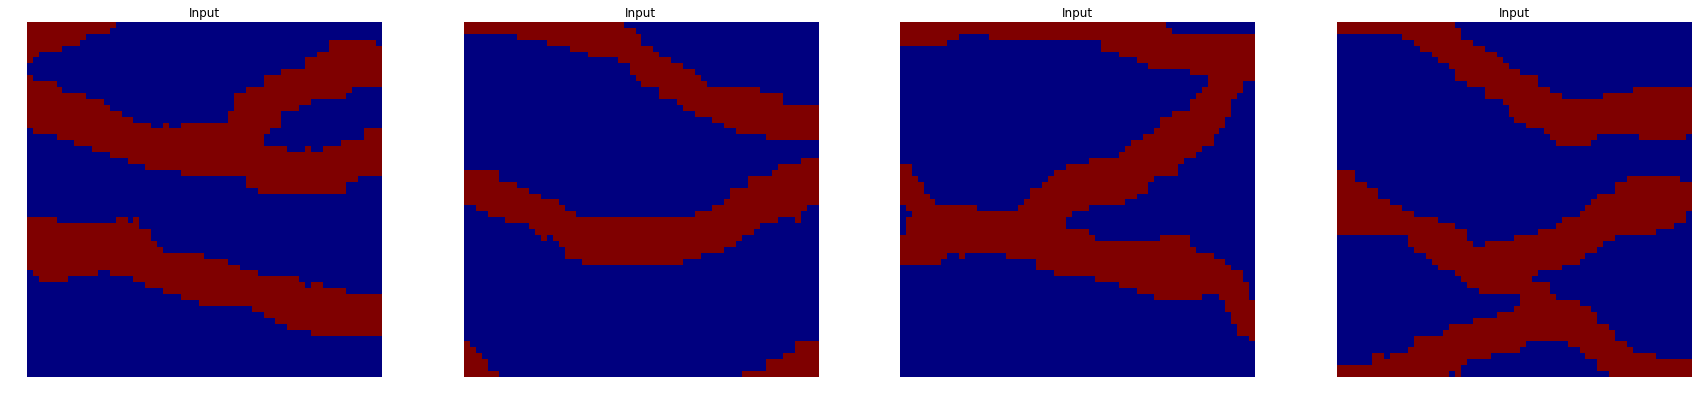

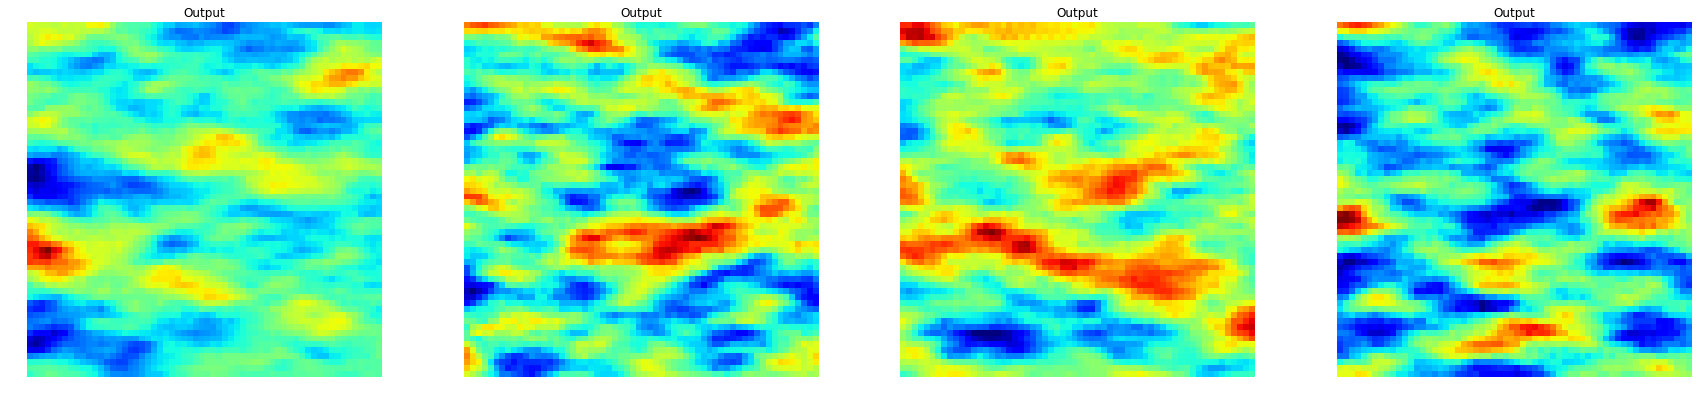

Epoch: [19] [2500/2500] time: 10167.4297, d_loss_pca: 0.53924817, d_loss_bin: 0.08642330, g_loss_pca: 1.58750904, g_loss_bin: 7.41949224
Cycle losses --> 0.20265009 0.105202235
Accuracy:   0.97109556
Epoch: [20] [2500/2500] time: 10700.0664, d_loss_pca: 0.52643561, d_loss_bin: 0.08511627, g_loss_pca: 1.62580061, g_loss_bin: 8.06236458
Cycle losses --> 0.20759656 0.11385249
Accuracy:   0.97152317


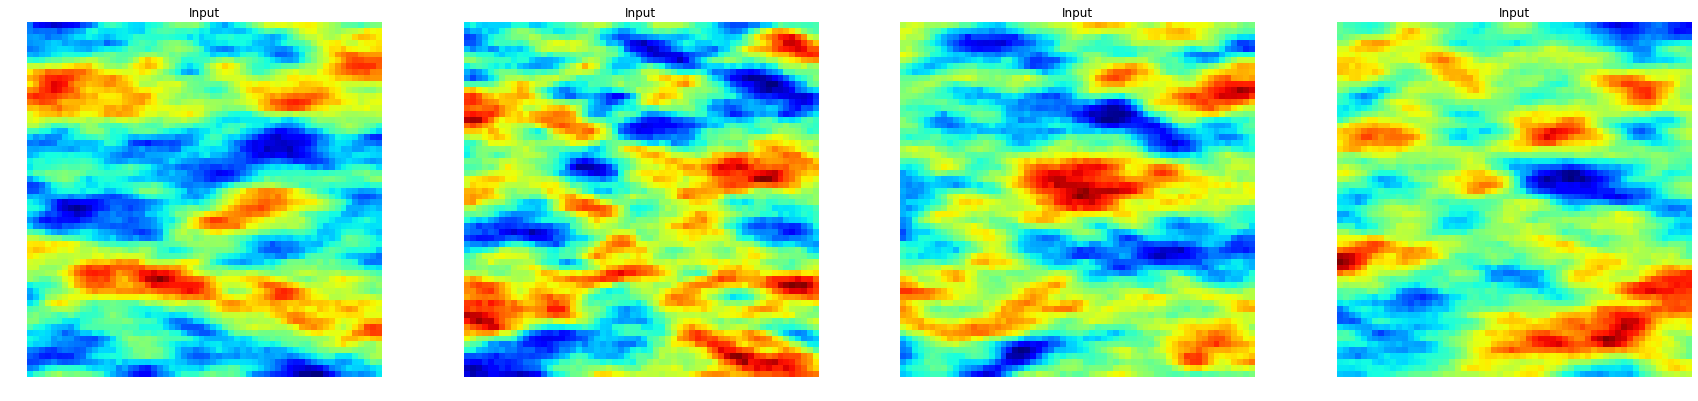

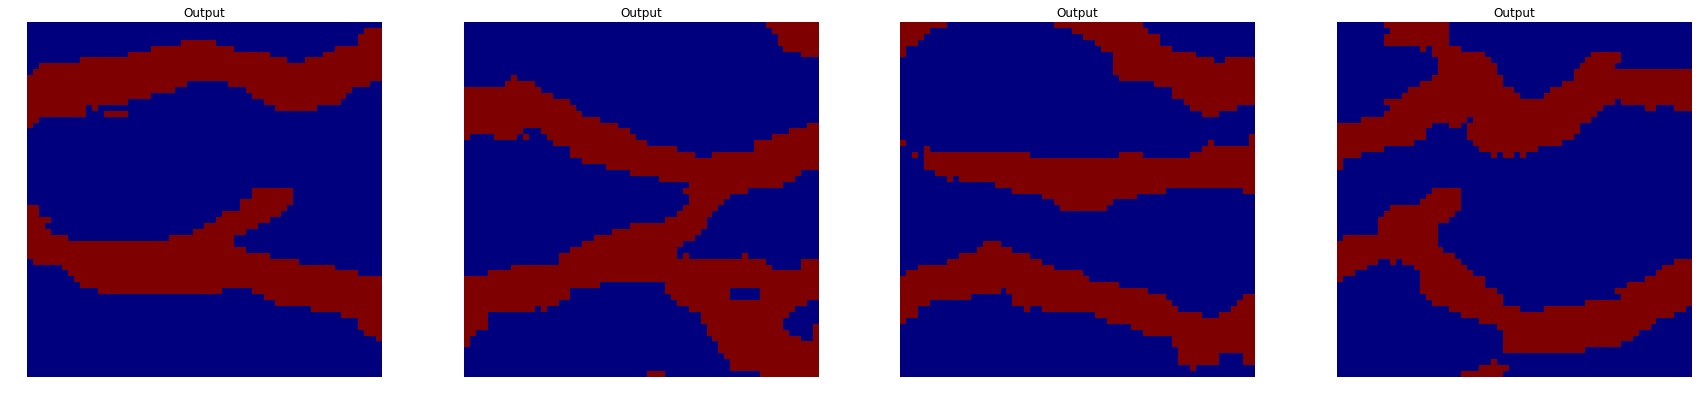

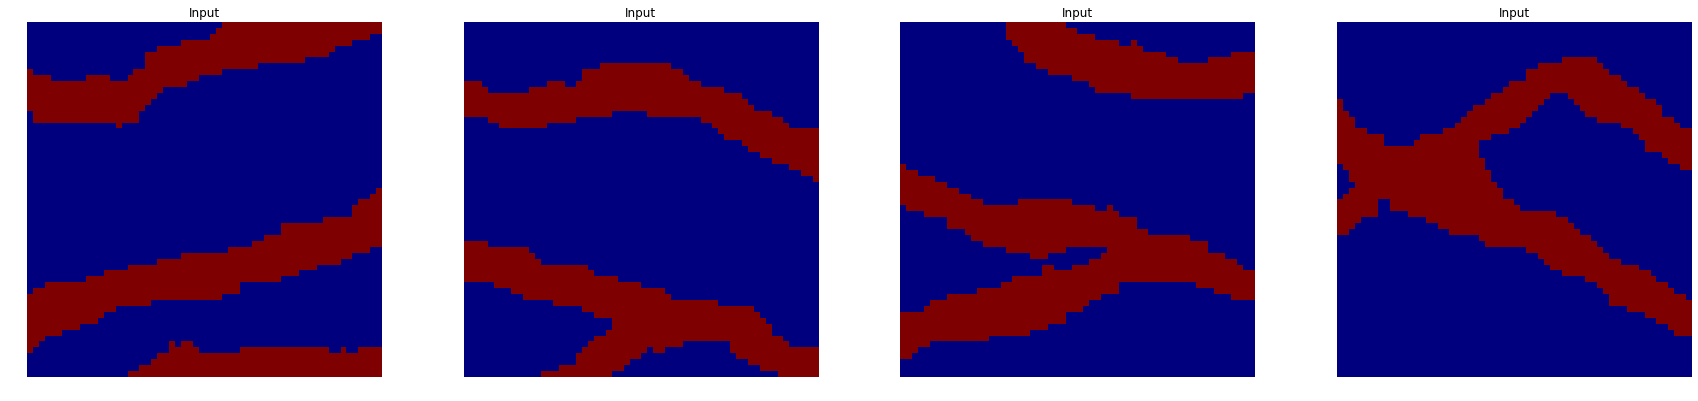

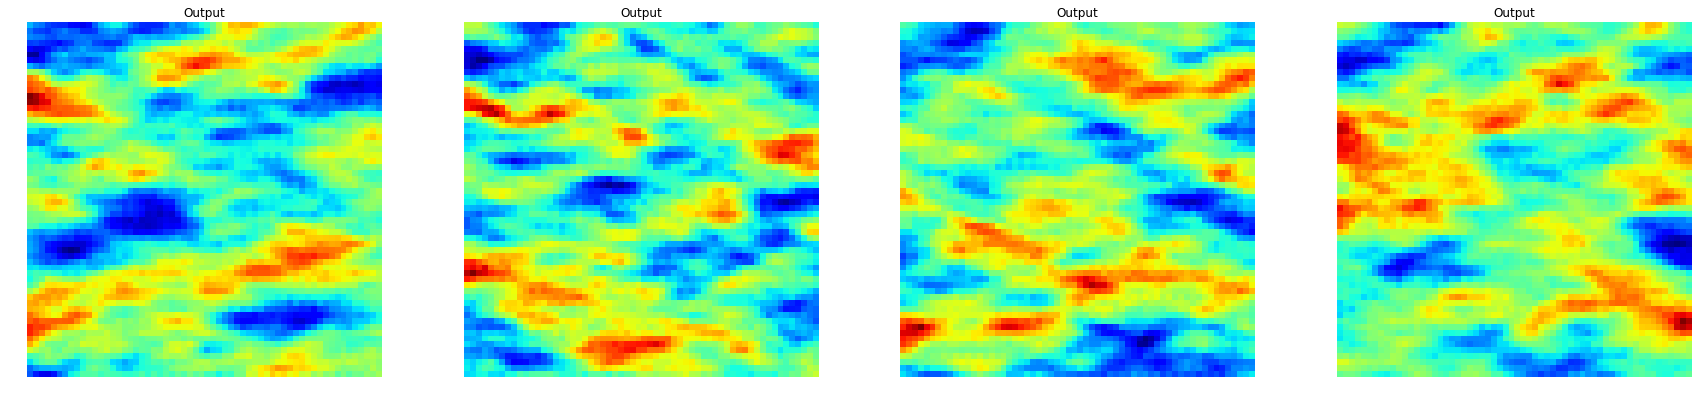

Epoch: [21] [2500/2500] time: 11237.4574, d_loss_pca: 0.51652074, d_loss_bin: 0.08007043, g_loss_pca: 1.64129770, g_loss_bin: 7.95347166
Cycle losses --> 0.2084284 0.11620415
Accuracy:   0.97125936
Epoch: [22] [2500/2500] time: 11770.6178, d_loss_pca: 0.49884501, d_loss_bin: 0.07929213, g_loss_pca: 1.71375585, g_loss_bin: 8.29000664
Cycle losses --> 0.20671631 0.1152543
Accuracy:   0.973444


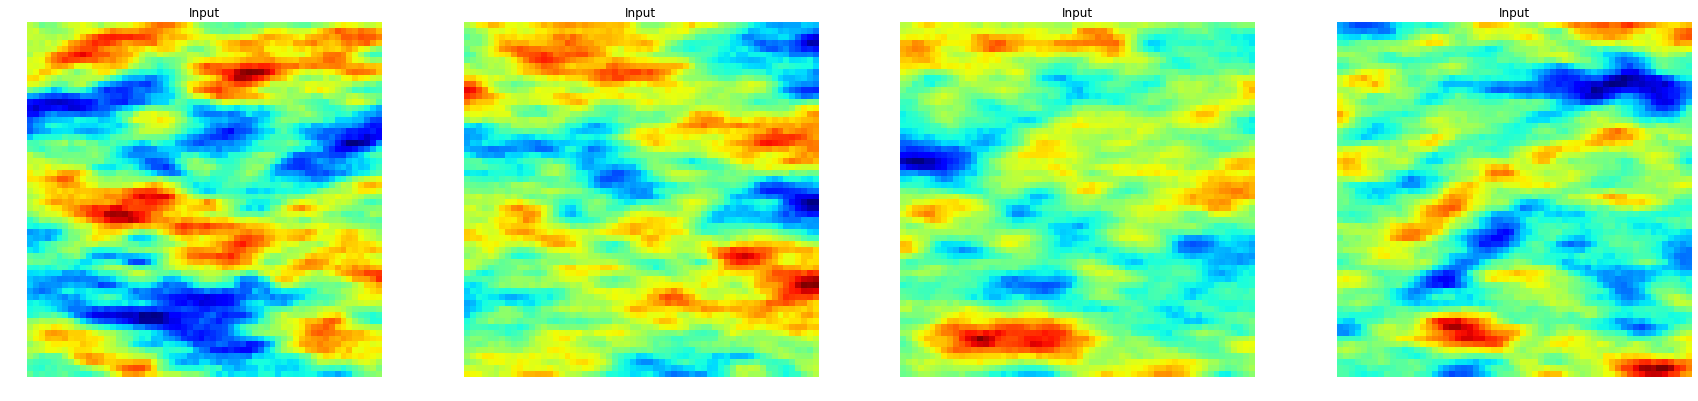

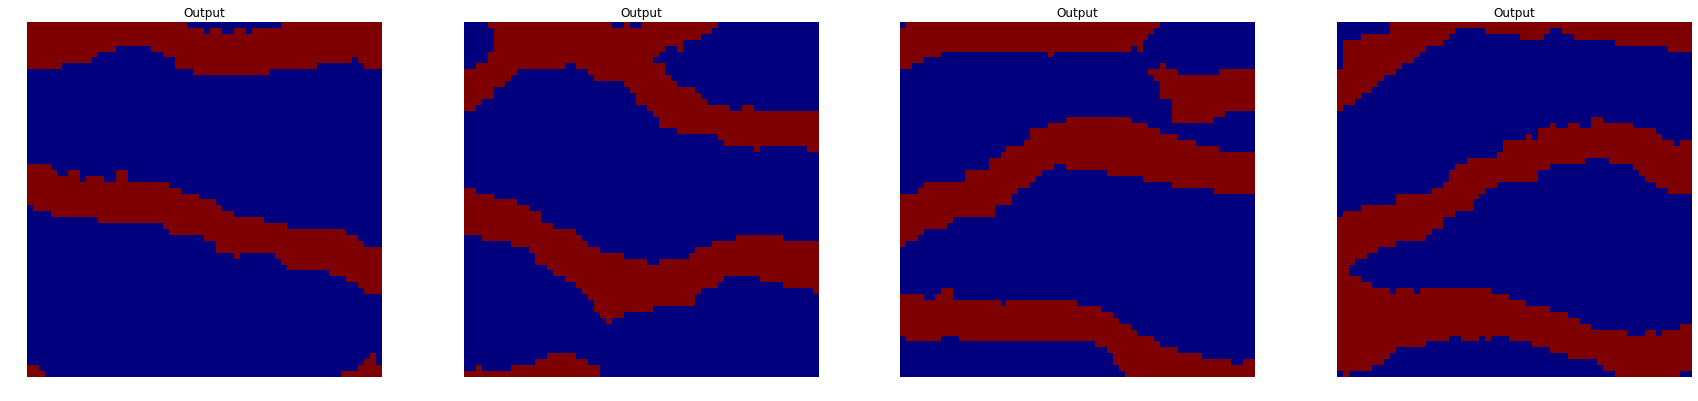

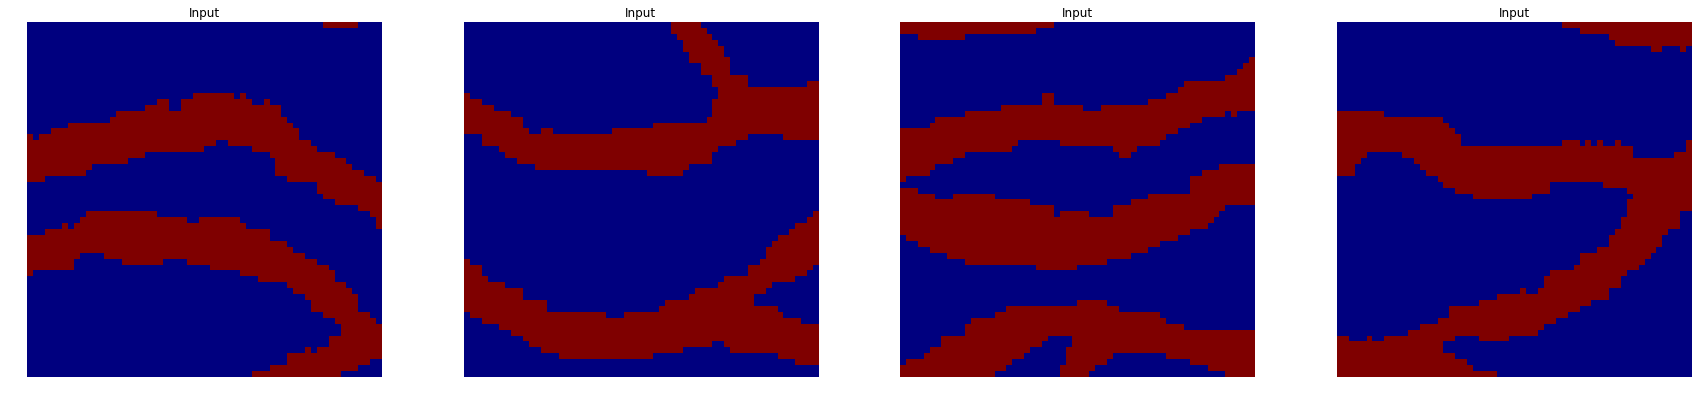

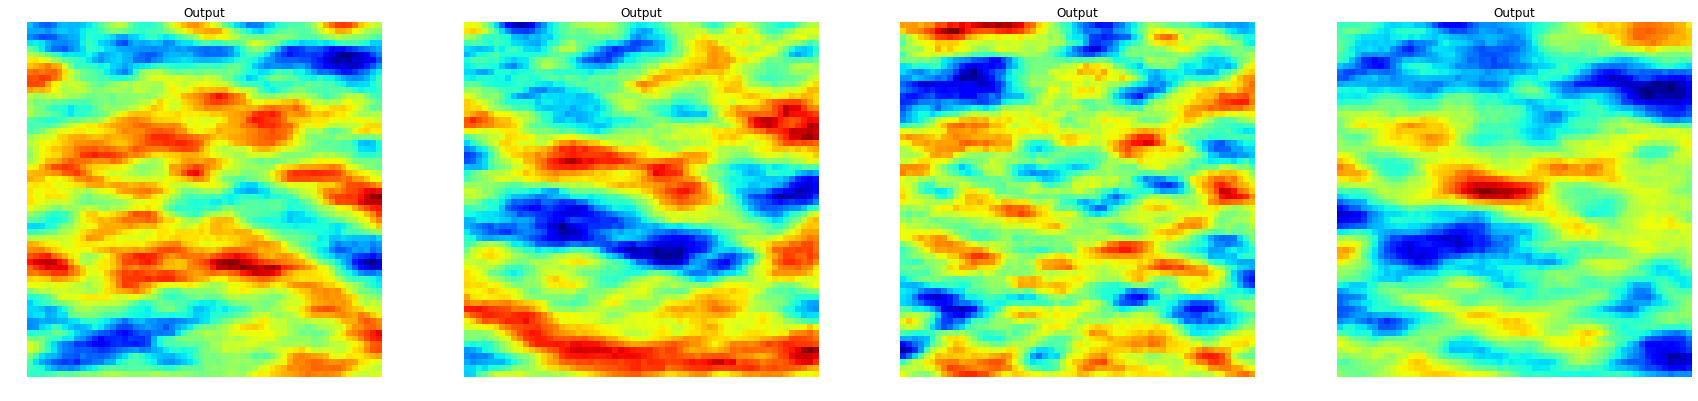

Epoch: [23] [2500/2500] time: 12307.6810, d_loss_pca: 0.47582731, d_loss_bin: 0.07789981, g_loss_pca: 1.80393314, g_loss_bin: 8.43617821
Cycle losses --> 0.21052222 0.11364155
Accuracy:   0.96746814
Epoch: [24] [2500/2500] time: 12840.2183, d_loss_pca: 0.46061903, d_loss_bin: 0.07213631, g_loss_pca: 1.85827267, g_loss_bin: 8.86106491
Cycle losses --> 0.20980217 0.12398369
Accuracy:   0.9730593


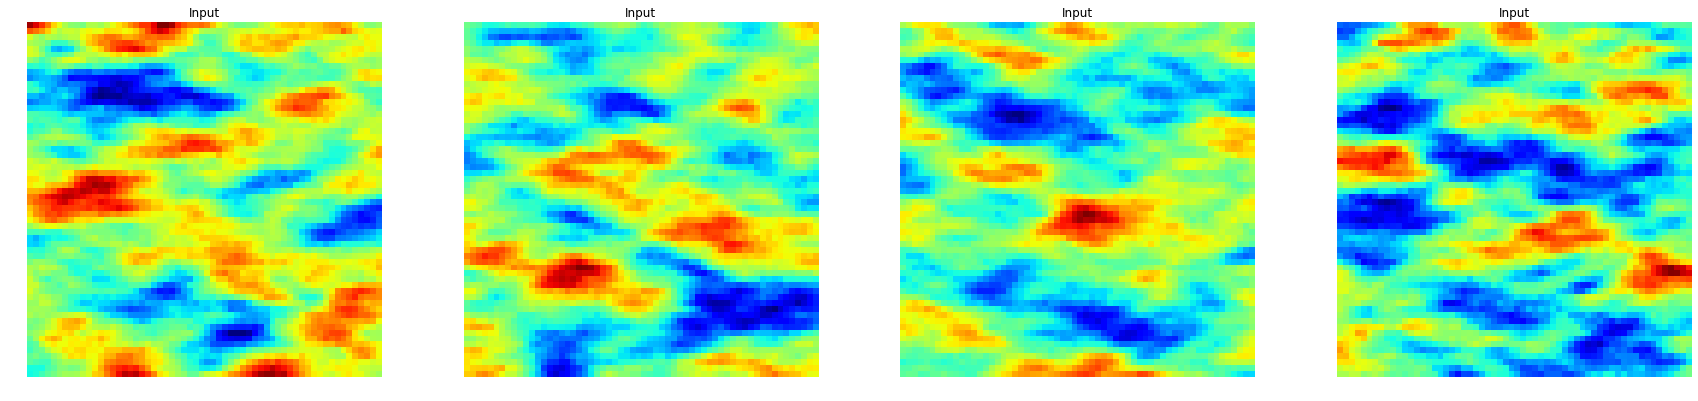

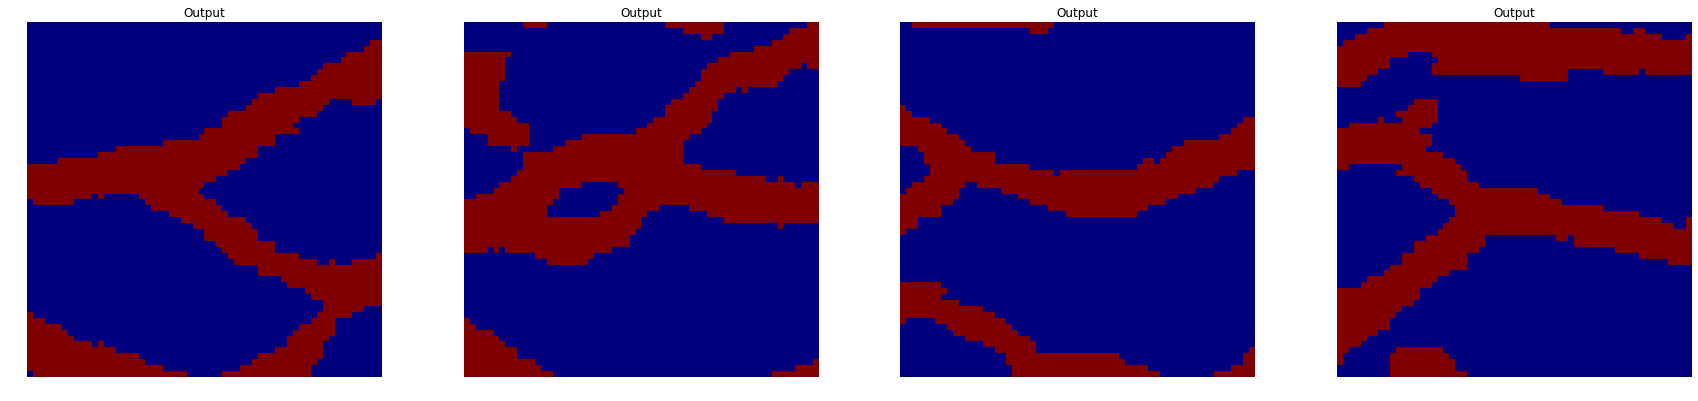

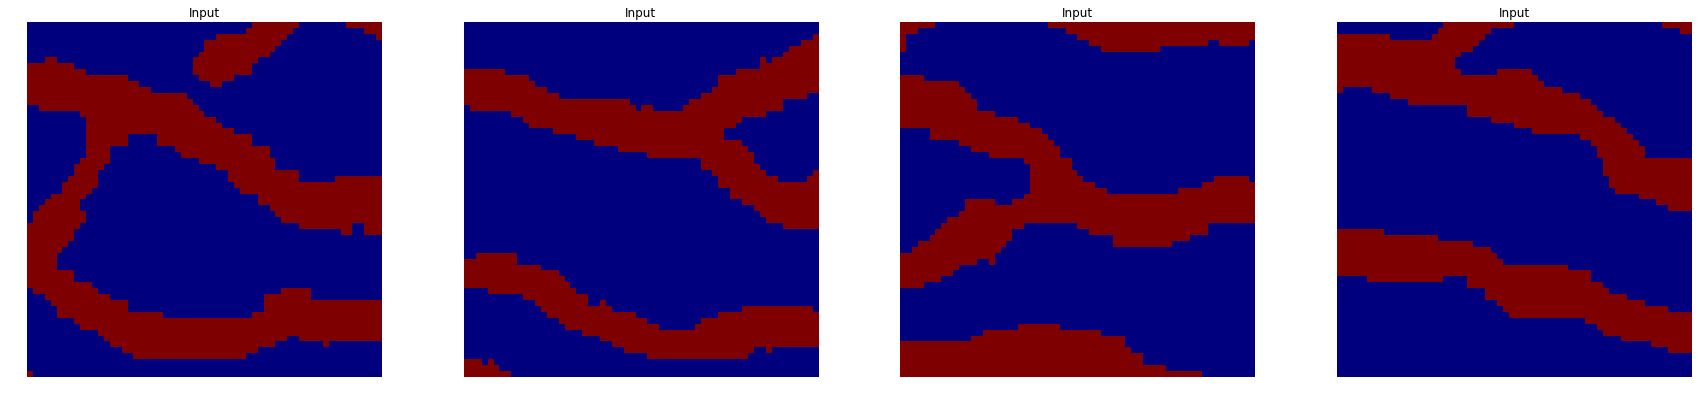

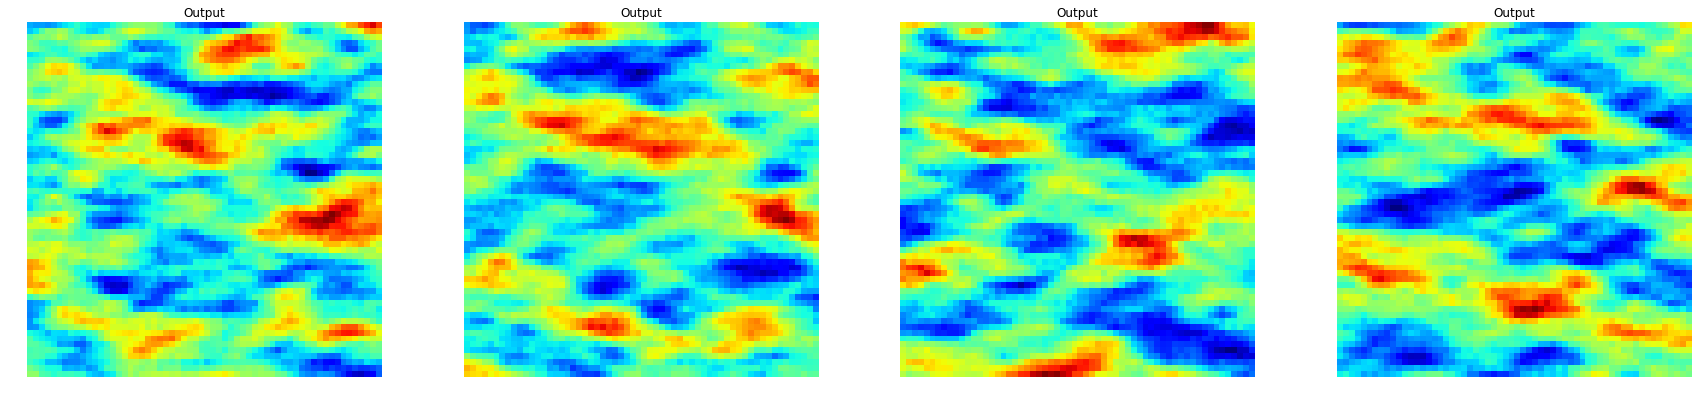

Epoch: [25] [2500/2500] time: 13377.1938, d_loss_pca: 0.45013353, d_loss_bin: 0.07863693, g_loss_pca: 1.91088128, g_loss_bin: 8.56450844
Cycle losses --> 0.22010918 0.13942303
Accuracy:   0.97346234


In [7]:
model = CycleGAN_MPS(summary = True, input_shape = (n_rows, n_cols, n_chns),batch_size=2,epsilon=0.5)
model.train(x_train , epochs=num_epochs)